In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import glob
import cv2
from sklearn.model_selection import train_test_split
from keras.layers import Dropout, Dense
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential, load_model
from keras.applications import VGG16
from sklearn.metrics import accuracy_score, confusion_matrix

# FER data set preprocessing starts

Angry

In [2]:
human_angry = glob.glob("C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9DR42)/Desktop/BE PROJECT/data/angry/*")
print("Number of images in Angry emotion = "+str(len(human_angry)))
# human_angry=>>/content/drive/MyDrive/Colab Notebooks/CK+48/anger/S055_004_00000026.png

Number of images in Angry emotion = 1600


In [3]:
human_angry_folderName = [str(os.path.split(i)[0])+"/" for i in human_angry]
human_angry_imageName = [str(os.path.split(i)[1]) for i in human_angry]
human_angry_emotion = [["angry"]*len(human_angry)][0]
human_angry_label = [1]*len(human_angry)

# print(human_angry_imageName[0])
# print(human_angry_emotion)
len(human_angry_folderName), len(human_angry_imageName), len(human_angry_emotion), len(human_angry_label)


(1600, 1600, 1600, 1600)

In [4]:
df_angry = pd.DataFrame()
df_angry["folderName"] = human_angry_folderName
df_angry["imageName"] = human_angry_imageName
df_angry["Emotion"] = human_angry_emotion
df_angry["Labels"] = human_angry_label
df_angry.head()

,folderName,imageName,Emotion,Labels
0,C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9...,AF01ANHL.JPG,angry,1
1,C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9...,AF01ANS.JPG,angry,1
2,C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9...,AF02ANHL.JPG,angry,1
3,C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9...,AF02ANHR.JPG,angry,1
4,C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9...,AF02ANS.JPG,angry,1


# **disgust**


In [5]:
human_disgust = glob.glob("C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9DR42)/Desktop/BE PROJECT/data/disgust/*")
print("Number of images in Disgust emotion = "+str(len(human_disgust)))

Number of images in Disgust emotion = 1600


In [6]:
human_disgust_folderName = [str(os.path.split(i)[0])+"/" for i in human_disgust]
human_disgust_imageName = [str(os.path.split(i)[1]) for i in human_disgust]
human_disgust_emotion = [["disgust"]*len(human_disgust)][0]
human_disgust_label = [2]*len(human_disgust)

len(human_disgust_folderName), len(human_disgust_imageName), len(human_disgust_emotion), len(human_disgust_label)

(1600, 1600, 1600, 1600)

In [7]:
df_disgust = pd.DataFrame()
df_disgust["folderName"] = human_disgust_folderName
df_disgust["imageName"] = human_disgust_imageName
df_disgust["Emotion"] = human_disgust_emotion
df_disgust["Labels"] = human_disgust_label
df_disgust.head()

,folderName,imageName,Emotion,Labels
0,C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9...,AF01DIHL.JPG,disgust,2
1,C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9...,AF01DIHR.JPG,disgust,2
2,C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9...,AF01DIS.JPG,disgust,2
3,C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9...,AF02DIHL.JPG,disgust,2
4,C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9...,AF02DIHR.JPG,disgust,2


#**Fear**

In [8]:
human_fear = glob.glob("C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9DR42)/Desktop/BE PROJECT/data/fear/*")
print("Number of images in Fear emotion = "+str(len(human_fear)))

Number of images in Fear emotion = 1600


In [9]:
human_fear_folderName = [str(os.path.split(i)[0])+"/" for i in human_fear]
human_fear_imageName = [str(os.path.split(i)[1]) for i in human_fear]
human_fear_emotion = [["Fear"]*len(human_fear)][0]
human_fear_label = [3]*len(human_fear)

len(human_fear_folderName), len(human_fear_imageName), len(human_fear_emotion), len(human_fear_label)

(1600, 1600, 1600, 1600)

In [10]:
df_fear = pd.DataFrame()
df_fear["folderName"] = human_fear_folderName
df_fear["imageName"] = human_fear_imageName
df_fear["Emotion"] = human_fear_emotion
df_fear["Labels"] = human_fear_label
df_fear.head()

,folderName,imageName,Emotion,Labels
0,C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9...,AF01AFHL.JPG,Fear,3
1,C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9...,AF01AFHR.JPG,Fear,3
2,C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9...,AF01AFS.JPG,Fear,3
3,C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9...,AF02AFHL.JPG,Fear,3
4,C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9...,AF02AFHR.JPG,Fear,3


# **Happy**

In [11]:
human_happy = glob.glob("C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9DR42)/Desktop/BE PROJECT/data/happy/*")
print("Number of images in Happy emotion = "+str(len(human_happy)))

Number of images in Happy emotion = 1600


In [12]:
human_happy_folderName = [str(os.path.split(i)[0])+"/" for i in human_happy]
human_happy_imageName = [str(os.path.split(i)[1]) for i in human_happy]
human_happy_emotion = [["happy"]*len(human_happy)][0]
human_happy_label = [4]*len(human_happy)
len(human_happy_folderName), len(human_happy_imageName), len(human_happy_emotion), len(human_happy_label)

(1600, 1600, 1600, 1600)

In [13]:
df_happy = pd.DataFrame()
df_happy["folderName"] = human_happy_folderName
df_happy["imageName"] = human_happy_imageName
df_happy["Emotion"] = human_happy_emotion
df_happy["Labels"] = human_happy_label
df_happy.head()

,folderName,imageName,Emotion,Labels
0,C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9...,AF01HAHL.JPG,happy,4
1,C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9...,AF01HAHR.JPG,happy,4
2,C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9...,AF01HAS.JPG,happy,4
3,C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9...,AF02HAHL.JPG,happy,4
4,C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9...,AF02HAHR.JPG,happy,4


# **sadness**

In [14]:

human_sad = glob.glob("C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9DR42)/Desktop/BE PROJECT/data/sad/*")
print("Number of images in Sad emotion = "+str(len(human_sad)))

Number of images in Sad emotion = 1600


In [15]:
human_sad_folderName = [str(os.path.split(i)[0])+"/" for i in human_sad]
human_sad_imageName = [str(os.path.split(i)[1]) for i in human_sad]
human_sad_emotion = [["sad"]*len(human_sad)][0]
human_sad_label = [5]*len(human_sad)

len(human_sad_folderName), len(human_sad_imageName), len(human_sad_emotion), len(human_sad_label)

(1600, 1600, 1600, 1600)

In [16]:

df_sad = pd.DataFrame()
df_sad["folderName"] = human_sad_folderName
df_sad["imageName"] = human_sad_imageName
df_sad["Emotion"] = human_sad_emotion
df_sad["Labels"] = human_sad_label
df_sad.head()

,folderName,imageName,Emotion,Labels
0,C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9...,AF01SAHL.JPG,sad,5
1,C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9...,AF01SAHR.JPG,sad,5
2,C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9...,AF01SAS.JPG,sad,5
3,C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9...,AF02SAS.JPG,sad,5
4,C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9...,AF03SAHR.JPG,sad,5


# **neutral**

In [17]:
human_neutral = glob.glob("C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9DR42)/Desktop/BE PROJECT/data/neutral/*")
print("Number of images in Sad emotion = "+str(len(human_neutral)))

Number of images in Sad emotion = 1600


In [18]:
human_neutral_folderName = [str(os.path.split(i)[0])+"/" for i in human_neutral]
human_neutral_imageName = [str(os.path.split(i)[1]) for i in human_neutral]
human_neutral_emotion = [["neutral"]*len(human_neutral)][0]
human_neutral_label = [7]*len(human_neutral)

len(human_neutral_folderName), len(human_neutral_imageName), len(human_neutral_emotion), len(human_neutral_label)

(1600, 1600, 1600, 1600)

In [19]:
df_neutral = pd.DataFrame()
df_neutral["folderName"] = human_neutral_folderName
df_neutral["imageName"] = human_neutral_imageName
df_neutral["Emotion"] = human_neutral_emotion
df_neutral["Labels"] = human_neutral_label
df_neutral.head()

,folderName,imageName,Emotion,Labels
0,C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9...,AF01NEHL.JPG,neutral,7
1,C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9...,AF01NEHR.JPG,neutral,7
2,C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9...,AF01NES.JPG,neutral,7
3,C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9...,AF02NEHL.JPG,neutral,7
4,C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9...,AF02NEHR.JPG,neutral,7


# **Surprise**

In [20]:
human_surprise = glob.glob("C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9DR42)/Desktop/BE PROJECT/data/surprise/*")
print("Number of images in Surprise emotion = "+str(len(human_surprise)))

Number of images in Surprise emotion = 1600


In [21]:
human_surprise_folderName = [str(os.path.split(i)[0])+"/" for i in human_surprise]
human_surprise_imageName = [str(os.path.split(i)[1]) for i in human_surprise]
human_surprise_emotion = [["surprise"]*len(human_surprise)][0]
human_surprise_label = [6]*len(human_surprise)

len(human_surprise_folderName), len(human_surprise_imageName), len(human_surprise_emotion), len(human_surprise_label)

(1600, 1600, 1600, 1600)

In [22]:
df_surprise = pd.DataFrame()
df_surprise["folderName"] = human_surprise_folderName
df_surprise["imageName"] = human_surprise_imageName
df_surprise["Emotion"] = human_surprise_emotion
df_surprise["Labels"] = human_surprise_label
df_surprise.head()

,folderName,imageName,Emotion,Labels
0,C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9...,AF01SUHL.JPG,surprise,6
1,C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9...,AF01SUHR.JPG,surprise,6
2,C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9...,AF01SUS.JPG,surprise,6
3,C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9...,AF02SUHL.JPG,surprise,6
4,C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9...,AF02SUS.JPG,surprise,6


In [23]:
length = df_angry.shape[0] + df_disgust.shape[0] + df_fear.shape[0] + df_happy.shape[0] + df_sad.shape[0] + df_surprise.shape[0] + df_neutral.shape[0]
print("Total number of images in all the emotions = "+str(length))

Total number of images in all the emotions = 11200


# **Concatenating data frames**


In [24]:
frames = [df_angry, df_disgust, df_fear, df_happy, df_sad, df_surprise, df_neutral]
Final_human = pd.concat(frames)
Final_human.shape

(11200, 4)

In [25]:
Final_human.reset_index(inplace = True, drop = True)
Final_human = Final_human.sample(frac = 1.0)   #shuffling the dataframe
Final_human.reset_index(inplace = True, drop = True)
Final_human.head()

,folderName,imageName,Emotion,Labels
0,C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9...,aia_surprise_393.png,surprise,6
1,C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9...,AF22AFS.JPG,Fear,3
2,C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9...,aia_disgust_27.png,disgust,2
3,C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9...,imtest193.png,neutral,7
4,C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9...,bonnie_disgust_134.png,disgust,2


# **2. Train, CV and Test Split for fer Dataset of Human Images**

In [26]:
df_FERdata_train_data, df_FERdata_test = train_test_split(Final_human, stratify=Final_human["Labels"], test_size = 0.132100)
df_FERdata_train, df_FERdata_cv = train_test_split(df_FERdata_train_data, stratify=df_FERdata_train_data["Labels"], test_size = 0.09870)
df_FERdata_train.shape, df_FERdata_cv.shape, df_FERdata_test.shape

((8760, 4), (960, 4), (1480, 4))

In [27]:
df_FERdata_train.reset_index(inplace = True, drop = True)
df_FERdata_train.to_pickle("C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9DR42)/Desktop/project/data/df_FERdata_train.pkl")

df_FERdata_cv.reset_index(inplace = True, drop = True)
df_FERdata_cv.to_pickle("C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9DR42)/Desktop/project/data/df_FERdata_cv.pkl")

df_FERdata_test.reset_index(inplace = True, drop = True)
df_FERdata_test.to_pickle("C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9DR42)/Desktop/project/data/df_FERdata_test.pkl")

In [28]:
df_FERdata_train = pd.read_pickle("C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9DR42)/Desktop/project/data/df_FERdata_train.pkl")
df_FERdata_train.head()


,folderName,imageName,Emotion,Labels
0,C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9...,ray_anger_290.png,angry,1
1,C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9...,bonnie_sadness_109.png,sad,5
2,C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9...,AF24DIS.JPG,disgust,2
3,C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9...,bonnie_anger_150.png,angry,1
4,C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9...,bonnie_surprise_182.png,surprise,6


In [29]:
df_FERdata_train.shape


(8760, 4)

In [30]:
df_FERdata_cv = pd.read_pickle("C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9DR42)/Desktop/project/data/df_FERdata_cv.pkl")
df_FERdata_cv.head()

,folderName,imageName,Emotion,Labels
0,C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9...,AF27HAHL.JPG,happy,4
1,C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9...,bonnie_disgust_38.png,disgust,2
2,C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9...,imtest6.png,surprise,6
3,C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9...,aia_joy_318.png,happy,4
4,C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9...,bonnie_anger_87.png,angry,1


In [31]:
df_FERdata_cv.shape

(960, 4)

In [32]:
df_FERdata_test = pd.read_pickle("C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9DR42)/Desktop/project/data/df_FERdata_test.pkl")
df_FERdata_test.head()

,folderName,imageName,Emotion,Labels
0,C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9...,ray_neutral_88.png,neutral,7
1,C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9...,aia_fear_99.png,Fear,3
2,C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9...,aia_neutral_331.png,neutral,7
3,C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9...,ray_anger_131.png,angry,1
4,C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9...,bonnie_joy_37.png,happy,4


In [33]:
df_FERdata_test.shape


(1480, 4)

#**3. Analysing Data of FERDdata Images**
#Distribution of class labels in Train, CV and Test


In [34]:
df_FERtemp_train = df_FERdata_train.sort_values(by = "Labels", inplace = False)
df_FERtemp_cv = df_FERdata_cv.sort_values(by = "Labels", inplace = False)
df_FERtemp_test = df_FERdata_test.sort_values(by = "Labels", inplace = False)

TrainData_distribution = df_FERdata_train["Emotion"].value_counts().sort_index()
CVData_distribution = df_FERdata_cv["Emotion"].value_counts().sort_index()
TestData_distribution = df_FERdata_test["Emotion"].value_counts().sort_index()

TrainData_distribution_sorted = sorted(TrainData_distribution.items(), key = lambda d: d[1], reverse = True)
CVData_distribution_sorted = sorted(CVData_distribution.items(), key = lambda d: d[1], reverse = True)
TestData_distribution_sorted = sorted(TestData_distribution.items(), key = lambda d: d[1], reverse = True)


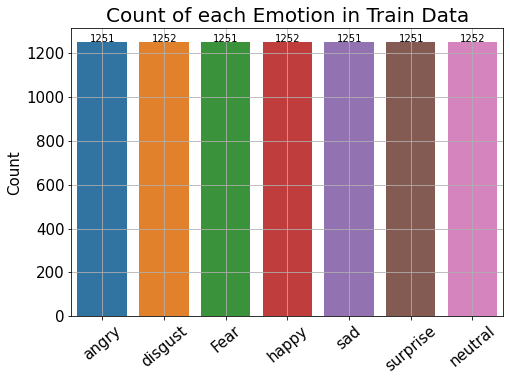

In [35]:
fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each Emotion in Train Data", fontsize = 20)
sns.countplot(x = "Emotion", data = df_FERtemp_train)
plt.grid()
for i in ax.patches:
    ax.text(x = i.get_x() + 0.2, y = i.get_height()+1.5, s = str(i.get_height()), fontsize = 10, color = "black")
plt.xlabel("")
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 40)
plt.show()

Number of training data points in class disgust = 1252(14.2922%)
Number of training data points in class happy = 1252(14.2922%)
Number of training data points in class neutral = 1252(14.2922%)
Number of training data points in class Fear = 1251(14.2808%)
Number of training data points in class angry = 1251(14.2808%)
Number of training data points in class sad = 1251(14.2808%)
Number of training data points in class surprise = 1251(14.2808%)
--------------------------------------------------------------------------------


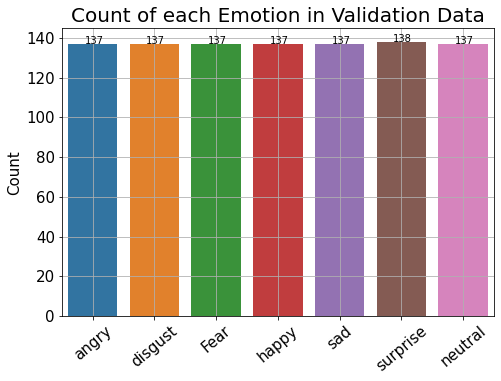

Number of training data points in class surprise = 138(14.375%)
Number of training data points in class Fear = 137(14.2708%)
Number of training data points in class angry = 137(14.2708%)
Number of training data points in class disgust = 137(14.2708%)
Number of training data points in class happy = 137(14.2708%)
Number of training data points in class neutral = 137(14.2708%)
Number of training data points in class sad = 137(14.2708%)
--------------------------------------------------------------------------------


In [36]:
for i in TrainData_distribution_sorted:
    print("Number of training data points in class "+str(i[0])+" = "+str(i[1])+ "("+str(np.round(((i[1]/df_FERtemp_train.shape[0])*100), 4))+"%)")

print("-"*80)

fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each Emotion in Validation Data", fontsize = 20)
sns.countplot(x = "Emotion", data = df_FERtemp_cv)
plt.grid()
for i in ax.patches:
    ax.text(x = i.get_x() + 0.27, y = i.get_height()+0.2, s = str(i.get_height()), fontsize = 10, color = "black")
plt.xlabel("")
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 40)
plt.show()

for i in CVData_distribution_sorted:
    print("Number of training data points in class "+str(i[0])+" = "+str(i[1])+ "("+str(np.round(((i[1]/df_FERtemp_cv.shape[0])*100), 4))+"%)")

print("-"*80)

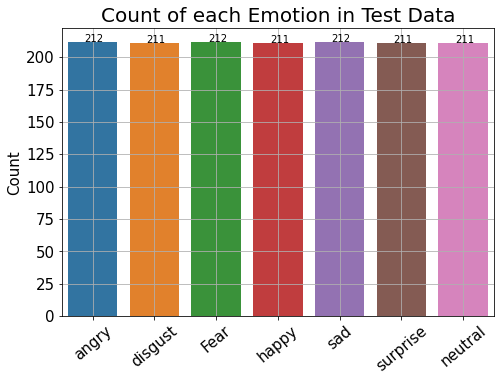

Number of training data points in class Fear = 212(14.3243%)
Number of training data points in class angry = 212(14.3243%)
Number of training data points in class sad = 212(14.3243%)
Number of training data points in class disgust = 211(14.2568%)
Number of training data points in class happy = 211(14.2568%)
Number of training data points in class neutral = 211(14.2568%)
Number of training data points in class surprise = 211(14.2568%)


In [37]:


fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each Emotion in Test Data", fontsize = 20)
sns.countplot(x = "Emotion", data = df_FERtemp_test)
plt.grid()
for i in ax.patches:
    ax.text(x = i.get_x() + 0.27, y = i.get_height()+0.2, s = str(i.get_height()), fontsize = 10, color = "black")
plt.xlabel("")
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 40)
plt.show()

for i in TestData_distribution_sorted:
    print("Number of training data points in class "+str(i[0])+" = "+str(i[1])+ "("+str(np.round(((i[1]/df_FERtemp_test.shape[0])*100), 4))+"%)")


#**4.Pre-Processing of FERData of Human Images**
#Converting all the images to grayscale and save them

In [38]:
def convt_to_gray(df):
    count = 0
    for i in range(len(df)):
        path1 = df["folderName"][i]
        path2 = df["imageName"][i]
        img = cv2.imread(os.path.join(path1, path2))
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        cv2.imwrite(os.path.join(path1, path2), gray)
        count += 1
    print("Total number of images converted and saved = "+str(count))

In [39]:
#detect the face in image using HAAR cascade then crop it then resize it and finally save it.
#face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/ColabNotebooks/FERdataset/haarcascade_frontalface_default.xml') 
#face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
#download this xml file from link: https://github.com/opencv/opencv/tree/master/data/haarcascades.

face_cascade = cv2.CascadeClassifier('C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9DR42)/Desktop/project/haarcascade_frontalface_default.xml')
def face_det_crop_resize(img_path):
    img = cv2.imread(img_path)
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 5)
    if len(faces)==1:
        for (x,y,w,h) in faces:
            face_clip = img[y:y+h, x:x+w]  #cropping the face in image
            cv2.imwrite(img_path, cv2.resize(face_clip, (350, 350)) )  #resizing image then saving itprint('here = ',img_path)
    else:
        #os.remove(img_path)
        print(img_path)
    
    
    

In [40]:
convt_to_gray(df_FERdata_train)

Total number of images converted and saved = 8760


In [41]:
convt_to_gray(df_FERdata_cv)

Total number of images converted and saved = 960


In [42]:
convt_to_gray(df_FERdata_test)

Total number of images converted and saved = 1480


In [43]:
for i, d in df_FERdata_train.iterrows():
    img_path = os.path.join(d["folderName"], d["imageName"])
    face_det_crop_resize(img_path)

In [44]:
for i, d in df_FERdata_cv.iterrows():
    img_path = os.path.join(d["folderName"], d["imageName"])
    face_det_crop_resize(img_path)

In [45]:
for i, d in df_FERdata_test.iterrows():
    img_path = os.path.join(d["folderName"], d["imageName"])
    face_det_crop_resize(img_path)

In [38]:
img = cv2.imread('C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9DR42)/Desktop/project/data/sad/imtest11.png')
img.shape

(350, 350, 3)

In [46]:
combined_train = df_FERdata_train

In [47]:
combined_train = df_FERdata_train.sample(frac = 1.0)  #shuffling the dataframe
combined_train.reset_index(inplace = True, drop = True)
combined_train.to_pickle("C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9DR42)/Desktop/project/data/combined_train.pkl")

# Creating bottleneck features from VGG-16 model. Here, we are using Transfer learning

In [53]:

#Train_Combined = pd.read_pickle("/content/drive/MyDrive/ColabNotebooks/combined_train.pkl")
Train_Combined = pd.read_pickle("C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9DR42)/Desktop/project/data/combined_train.pkl")
#CV_CK = pd.read_pickle("/content/drive/MyDrive/ColabNotebooks/CKdataset/df_CKdata_cv.pkl")
CV_FER = pd.read_pickle("C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9DR42)/Desktop/project/data/df_FERdata_cv.pkl")
#Test_CK = pd.read_pickle("/content/drive/MyDrive/ColabNotebooks/CKdataset/df_CKdata_test.pkl")
Test_FER = pd.read_pickle("C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9DR42)/Desktop/project/data/df_FERdata_test.pkl")

#Train_Combined.shape, CV_CK.shape, 
Train_Combined.shape, CV_FER.shape,Test_FER.shape

((8760, 4), (960, 4), (1480, 4))

In [54]:
TrainCombined_batch_pointer = 0
CVHumans_batch_pointer = 0
CVAnimated_batch_pointer = 0
TestHumans_batch_pointer = 0
TestAnimated_batch_pointer = 0

# Bottleneck features for CombinedTrain Data

In [55]:
TrainCombined_Labels = pd.get_dummies(Train_Combined["Labels"]).values #changed as_matrix to to_numpy
TrainCombined_Labels.shape

(8760, 7)

In [56]:
TrainCombined_Labels

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=uint8)

In [45]:
img = cv2.imread('C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9DR42)/Desktop/project/data/angry/AF01ANHL.jpg')
img.shape

(350, 350, 3)

In [46]:
def loadCombinedTrainBatch(batch_size):
    global TrainCombined_batch_pointer
    batch_images = []
    batch_labels = []
    for i in range(batch_size):
        path1 = Train_Combined.iloc[TrainCombined_batch_pointer + i]["folderName"]
        path2 = Train_Combined.iloc[TrainCombined_batch_pointer + i]["imageName"]
        read_image = cv2.imread(os.path.join(path1, path2))
        read_image_final = read_image/255.0  #here, we are normalizing the images
        batch_images.append(read_image_final)
        
        batch_labels.append(TrainCombined_Labels[TrainCombined_batch_pointer + i]) #appending corresponding labels
        
    TrainCombined_batch_pointer += batch_size
        
    return np.array(batch_images), np.array(batch_labels)


In [47]:
#creating bottleneck features for train data using VGG-16- Image-net model
model = VGG16(weights='imagenet', include_top=False)
SAVEDIR = "C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9DR42)/Desktop/project/Bottleneck_CombinedTrain/"                        #to change the path given
SAVEDIR_LABELS = "C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9DR42)/Desktop/project/CombinedTrain_Labels/"
batch_size = 10
for i in range(int(len(Train_Combined)/batch_size)):
    x, y = loadCombinedTrainBatch(batch_size)
    print("Batch {} loaded".format(i+1))
    
    np.save(os.path.join(SAVEDIR_LABELS, "bottleneck_labels_{}".format(i+1)), y)
    
    print("Creating bottleneck features for batch {}". format(i+1))
    #x = np.asarray(x, dtype=float)
    
    bottleneck_features = model.predict(x)
    np.save(os.path.join(SAVEDIR, "bottleneck_{}".format(i+1)), bottleneck_features)
    print("Bottleneck features for batch {} created and saved\n".format(i+1))

Batch 1 loaded
Creating bottleneck features for batch 1
Bottleneck features for batch 1 created and saved

Batch 2 loaded
Creating bottleneck features for batch 2
Bottleneck features for batch 2 created and saved

Batch 3 loaded
Creating bottleneck features for batch 3
Bottleneck features for batch 3 created and saved

Batch 4 loaded
Creating bottleneck features for batch 4
Bottleneck features for batch 4 created and saved

Batch 5 loaded
Creating bottleneck features for batch 5
Bottleneck features for batch 5 created and saved

Batch 6 loaded
Creating bottleneck features for batch 6
Bottleneck features for batch 6 created and saved

Batch 7 loaded
Creating bottleneck features for batch 7
Bottleneck features for batch 7 created and saved

Batch 8 loaded
Creating bottleneck features for batch 8
Bottleneck features for batch 8 created and saved

Batch 9 loaded
Creating bottleneck features for batch 9
Bottleneck features for batch 9 created and saved

Batch 10 loaded
Creating bottleneck f

In [48]:
b = np.load('C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9DR42)/Desktop/project/Bottleneck_CombinedTrain/bottleneck_1.npy')
b.shape

(10, 10, 10, 512)

## Bottleneck features for CV Human

In [57]:
CVHumans_Labels = pd.get_dummies(CV_FER["Labels"]).values
CVHumans_Labels.shape

(960, 7)

In [50]:
def loadCVHumanBatch(batch_size):
    global CVHumans_batch_pointer
    batch_images = []
    batch_labels = []
    for i in range(batch_size):
        path1 = CV_FER.iloc[CVHumans_batch_pointer + i]["folderName"]
        path2 = CV_FER.iloc[CVHumans_batch_pointer + i]["imageName"]
        read_image = cv2.imread(os.path.join(path1, path2))
        read_image_final = read_image/255.0  #here, we are normalizing the images
        batch_images.append(read_image_final)
        
        batch_labels.append(CVHumans_Labels[CVHumans_batch_pointer + i]) #appending corresponding labels
        
    CVHumans_batch_pointer += batch_size
    return np.array(batch_images), np.array(batch_labels)

In [51]:
#creating bottleneck features for CV Human data using VGG-16- Image-net model
model = VGG16(weights='imagenet', include_top=False)
SAVEDIR = "C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9DR42)/Desktop/project/Bottleneck_Features/Bottleneck_CVHumans/"
SAVEDIR_LABELS = "C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9DR42)/Desktop/project/Bottleneck_Features/CVHumans_Labels/"
batch_size = 10
for i in range(int(len(CV_FER)/batch_size)):
    x, y = loadCVHumanBatch(batch_size)
    print("Batch {} loaded".format(i+1))
    
    np.save(os.path.join(SAVEDIR_LABELS, "bottleneck_labels_{}".format(i+1)), y)
    
    print("Creating bottleneck features for batch {}". format(i+1))
    bottleneck_features = model.predict(x)
    np.save(os.path.join(SAVEDIR, "bottleneck_{}".format(i+1)), bottleneck_features)
    print("Bottleneck features for batch {} created and saved\n".format(i+1))


Batch 1 loaded
Creating bottleneck features for batch 1
Bottleneck features for batch 1 created and saved

Batch 2 loaded
Creating bottleneck features for batch 2
Bottleneck features for batch 2 created and saved

Batch 3 loaded
Creating bottleneck features for batch 3
Bottleneck features for batch 3 created and saved

Batch 4 loaded
Creating bottleneck features for batch 4
Bottleneck features for batch 4 created and saved

Batch 5 loaded
Creating bottleneck features for batch 5
Bottleneck features for batch 5 created and saved

Batch 6 loaded
Creating bottleneck features for batch 6
Bottleneck features for batch 6 created and saved

Batch 7 loaded
Creating bottleneck features for batch 7
Bottleneck features for batch 7 created and saved

Batch 8 loaded
Creating bottleneck features for batch 8
Bottleneck features for batch 8 created and saved

Batch 9 loaded
Creating bottleneck features for batch 9
Bottleneck features for batch 9 created and saved

Batch 10 loaded
Creating bottleneck f

## Bottleneck Features for Test Human Data

In [58]:
TestHuman_Labels = pd.get_dummies(Test_FER["Labels"]).values
TestHuman_Labels.shape

(1480, 7)

In [53]:
def loadTestHumansBatch(batch_size):
    global TestHumans_batch_pointer
    batch_images = []
    batch_labels = []
    for i in range(batch_size):
        path1 = Test_FER.iloc[TestHumans_batch_pointer + i]["folderName"]
        path2 = Test_FER.iloc[TestHumans_batch_pointer + i]["imageName"]
        read_image = cv2.imread(os.path.join(path1, path2))
        read_image_final = read_image/255.0  #here, we are normalizing the images
        batch_images.append(read_image_final)
        
        batch_labels.append(TestHuman_Labels[TestHumans_batch_pointer + i]) #appending corresponding labels
        
    TestHumans_batch_pointer += batch_size
        
    return np.array(batch_images), np.array(batch_labels)

In [54]:
#creating bottleneck features for Test Humans data using VGG-16- Image-net model
model = VGG16(weights='imagenet', include_top=False)
SAVEDIR = "C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9DR42)/Desktop/project/Bottleneck_Features/Bottleneck_TestHumans/"
SAVEDIR_LABELS = "C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9DR42)/Desktop/project/Bottleneck_Features/TestHumans_Labels/"
batch_size = 10
for i in range(int(len(Test_FER)/batch_size)):
    x, y = loadTestHumansBatch(batch_size)
    print("Batch {} loaded".format(i+1))
    
    np.save(os.path.join(SAVEDIR_LABELS, "bottleneck_labels_{}".format(i+1)), y)
    
    print("Creating bottleneck features for batch {}". format(i+1))
    bottleneck_features = model.predict(x)
    np.save(os.path.join(SAVEDIR, "bottleneck_{}".format(i+1)), bottleneck_features)
    print("Bottleneck features for batch {} created and saved\n".format(i+1))
'''
leftover_points = len(Test_FER) - TestHumans_batch_pointer
x, y = loadTestHumansBatch(leftover_points)
np.save(os.path.join(SAVEDIR_LABELS, "bottleneck_labels_{}".format(int(len(Test_FER)/batch_size) + 1)), y)
bottleneck_features = model.predict(x)
np.save(os.path.join(SAVEDIR, "bottleneck_{}".format(int(len(Test_FER)/batch_size) + 1)), bottleneck_features)
'''

Batch 1 loaded
Creating bottleneck features for batch 1
Bottleneck features for batch 1 created and saved

Batch 2 loaded
Creating bottleneck features for batch 2
Bottleneck features for batch 2 created and saved

Batch 3 loaded
Creating bottleneck features for batch 3
Bottleneck features for batch 3 created and saved

Batch 4 loaded
Creating bottleneck features for batch 4
Bottleneck features for batch 4 created and saved

Batch 5 loaded
Creating bottleneck features for batch 5
Bottleneck features for batch 5 created and saved

Batch 6 loaded
Creating bottleneck features for batch 6
Bottleneck features for batch 6 created and saved

Batch 7 loaded
Creating bottleneck features for batch 7
Bottleneck features for batch 7 created and saved

Batch 8 loaded
Creating bottleneck features for batch 8
Bottleneck features for batch 8 created and saved

Batch 9 loaded
Creating bottleneck features for batch 9
Bottleneck features for batch 9 created and saved

Batch 10 loaded
Creating bottleneck f

'\nleftover_points = len(Test_FER) - TestHumans_batch_pointer\nx, y = loadTestHumansBatch(leftover_points)\nnp.save(os.path.join(SAVEDIR_LABELS, "bottleneck_labels_{}".format(int(len(Test_FER)/batch_size) + 1)), y)\nbottleneck_features = model.predict(x)\nnp.save(os.path.join(SAVEDIR, "bottleneck_{}".format(int(len(Test_FER)/batch_size) + 1)), bottleneck_features)\n'

# Modelling & Training

In [55]:
b = np.load('C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9DR42)/Desktop/project/Bottleneck_CombinedTrain/bottleneck_1.npy')
b.shape

(10, 10, 10, 512)

In [56]:
c = np.load('C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9DR42)/Desktop/project/Bottleneck_CombinedTrain/bottleneck_1.npy')
c.shape

(10, 10, 10, 512)

In [59]:
no_of_classes = 7


In [60]:
#model architecture
def model(input_shape):
    model = Sequential()
        
    model.add(Dense(512, activation='relu', input_dim = input_shape))
    model.add(Dropout(0.2))
    
    model.add(Dense(256, activation='relu'))
    
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    
    model.add(Dense(64, activation='relu'))
    model.add(Dense(no_of_classes, activation='softmax')) 
    
    
    return model

In [61]:
#training the model
SAVEDIR_COMB_TRAIN = "C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9DR42)/Desktop/project/Bottleneck_CombinedTrain/"
SAVEDIR_COMB_TRAIN_LABELS = "C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9DR42)/Desktop/project/CombinedTrain_Labels/"

SAVEDIR_CV_HUMANS = "C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9DR42)/Desktop/project/Bottleneck_Features/Bottleneck_CVHumans/"
SAVEDIR_CV_HUMANS_LABELS = "C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9DR42)/Desktop/project/Bottleneck_Features/CVHumans_Labels/"

'''
SAVEDIR_CV_ANIME = "../Data/Bottleneck_Features/Bottleneck_CVAnimated/"
SAVEDIR_CV_ANIME_LABELS =  "../Data/Bottleneck_Features/CVAnimated_Labels/"
'''

SAVER = "C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9DR42)/Desktop/project/Model_Save/"

input_shape = 10*10*512   #this is the shape of bottleneck feature of each image which comes after passing the image through VGG-16

model = model(input_shape)
#model.load_weights(os.path.join(SAVER, "model.h5"))
model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics = ["accuracy"])

epochs = 20
batch_size = 10
step = 0
combTrain_bottleneck_files = int(len(Train_Combined) / batch_size)
CVHuman_bottleneck_files = int(len(CV_FER) / batch_size)
#CVAnime_bottleneck_files = int(len(CV_Animated) / batch_size)
epoch_number, CombTrain_loss, CombTrain_acc, CVHuman_loss, CVHuman_acc = [], [], [], [], []



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               26214912  
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 7)                

In [62]:
for epoch in range(epochs):
    avg_epoch_CombTr_loss, avg_epoch_CombTr_acc, avg_epoch_CVHum_loss, avg_epoch_CVHum_acc = 0, 0, 0, 0
    epoch_number.append(epoch + 1)
    
    for i in range(combTrain_bottleneck_files):
        
        step += 1
        
        #loading batch of train bottleneck features for training MLP.
        X_CombTrain_load = np.load(os.path.join(SAVEDIR_COMB_TRAIN, "bottleneck_{}.npy".format(i+1)))
        X_CombTrain = X_CombTrain_load.reshape(X_CombTrain_load.shape[0], X_CombTrain_load.shape[1]*X_CombTrain_load.shape[2]*X_CombTrain_load.shape[3])
        Y_CombTrain = np.load(os.path.join(SAVEDIR_COMB_TRAIN_LABELS, "bottleneck_labels_{}.npy".format(i+1)))
        
        #loading batch of Human CV bottleneck features for cross-validation.
        X_CVHuman_load = np.load(os.path.join(SAVEDIR_CV_HUMANS, "bottleneck_{}.npy".format((i % CVHuman_bottleneck_files) + 1)))
        X_CVHuman = X_CVHuman_load.reshape(X_CVHuman_load.shape[0], X_CVHuman_load.shape[1]*X_CVHuman_load.shape[2]*X_CVHuman_load.shape[3])
        Y_CVHuman = np.load(os.path.join(SAVEDIR_CV_HUMANS_LABELS, "bottleneck_labels_{}.npy".format((i % CVHuman_bottleneck_files) + 1)))
        
        '''
        #loading batch of animated CV bottleneck features for cross-validation.
        X_CVAnime_load = np.load(os.path.join(SAVEDIR_CV_ANIME, "bottleneck_{}.npy".format((i % CVAnime_bottleneck_files) + 1)))
        X_CVAnime = X_CVAnime_load.reshape(X_CVAnime_load.shape[0], X_CVAnime_load.shape[1]*X_CVAnime_load.shape[2]*X_CVAnime_load.shape[3])
        Y_CVAnime = np.load(os.path.join(SAVEDIR_CV_ANIME_LABELS, "bottleneck_labels_{}.npy".format((i % CVAnime_bottleneck_files) + 1)))
        '''

        CombTrain_Loss, CombTrain_Accuracy = model.train_on_batch(X_CombTrain, Y_CombTrain) #train the model on batch
        CVHuman_Loss, CVHuman_Accuracy = model.test_on_batch(X_CVHuman, Y_CVHuman) #cross validate the model on CV Human batch
        #CVAnime_Loss, CVAnime_Accuracy = model.test_on_batch(X_CVAnime, Y_CVAnime) #cross validate the model on CV Animated batch
        
        print("Epoch: {}, Step: {}, CombTr_Loss: {}, CombTr_Acc: {}, CVHum_Loss: {}, CVHum_Acc: {}".format(epoch+1, step, np.round(float(CombTrain_Loss), 2), np.round(float(CombTrain_Accuracy), 2), np.round(float(CVHuman_Loss), 2), np.round(float(CVHuman_Accuracy), 2)))
        
        avg_epoch_CombTr_loss += CombTrain_Loss / combTrain_bottleneck_files
        avg_epoch_CombTr_acc += CombTrain_Accuracy / combTrain_bottleneck_files
        avg_epoch_CVHum_loss += CVHuman_Loss / combTrain_bottleneck_files
        avg_epoch_CVHum_acc += CVHuman_Accuracy / combTrain_bottleneck_files
        #avg_epoch_CVAnime_loss += CVAnime_Loss / combTrain_bottleneck_files
        #avg_epoch_CVAnime_acc += CVAnime_Accuracy / combTrain_bottleneck_files
        
    print("Avg_CombTrain_Loss: {}, Avg_CombTrain_Acc: {}, Avg_CVHum_Loss: {}, Avg_CVHum_Acc: {}".format(np.round(float(avg_epoch_CombTr_loss), 2), np.round(float(avg_epoch_CombTr_acc), 2), np.round(float(avg_epoch_CVHum_loss), 2), np.round(float(avg_epoch_CVHum_acc), 2)))

    CombTrain_loss.append(avg_epoch_CombTr_loss)
    CombTrain_acc.append(avg_epoch_CombTr_acc)
    CVHuman_loss.append(avg_epoch_CVHum_loss)
    CVHuman_acc.append(avg_epoch_CVHum_acc)
    #CVAnime_loss.append(avg_epoch_CVAnime_loss)
    #CVAnime_acc.append(avg_epoch_CVAnime_acc)
    
    
    model.save(os.path.join(SAVER, "model.h5"))  #saving the model on each epoc
    model.save_weights(os.path.join(SAVER, "model_weights.h5")) #saving the weights of model on each epoch
    print("Model and weights saved at epoch {}".format(epoch + 1))
          
log_frame = pd.DataFrame(columns = ["Epoch", "Comb_Train_Loss", "Comb_Train_Accuracy", "CVHuman_Loss", "CVHuman_Accuracy"])
log_frame["Epoch"] = epoch_number
log_frame["Comb_Train_Loss"] = CombTrain_loss
log_frame["Comb_Train_Accuracy"] = CombTrain_acc
log_frame["CVHuman_Loss"] = CVHuman_loss
log_frame["CVHuman_Accuracy"] = CVHuman_acc
#log_frame["CVAnime_Loss"] = CVAnime_loss
#log_frame["CVAnime_Accuracy"] = CVAnime_acc
log_frame.to_csv("C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9DR42)/Desktop/project/Logs/Log.csv", index = False)

Epoch: 1, Step: 1, CombTr_Loss: 1.79, CombTr_Acc: 0.3, CVHum_Loss: 3.22, CVHum_Acc: 0.2
Epoch: 1, Step: 2, CombTr_Loss: 2.4, CombTr_Acc: 0.2, CVHum_Loss: 3.43, CVHum_Acc: 0.4
Epoch: 1, Step: 3, CombTr_Loss: 2.28, CombTr_Acc: 0.0, CVHum_Loss: 4.93, CVHum_Acc: 0.4
Epoch: 1, Step: 4, CombTr_Loss: 2.25, CombTr_Acc: 0.0, CVHum_Loss: 10.92, CVHum_Acc: 0.0
Epoch: 1, Step: 5, CombTr_Loss: 2.15, CombTr_Acc: 0.2, CVHum_Loss: 10.28, CVHum_Acc: 0.1
Epoch: 1, Step: 6, CombTr_Loss: 2.4, CombTr_Acc: 0.0, CVHum_Loss: 9.68, CVHum_Acc: 0.3
Epoch: 1, Step: 7, CombTr_Loss: 1.68, CombTr_Acc: 0.5, CVHum_Loss: 12.59, CVHum_Acc: 0.2
Epoch: 1, Step: 8, CombTr_Loss: 1.89, CombTr_Acc: 0.3, CVHum_Loss: 9.45, CVHum_Acc: 0.0
Epoch: 1, Step: 9, CombTr_Loss: 1.91, CombTr_Acc: 0.3, CVHum_Loss: 12.02, CVHum_Acc: 0.1
Epoch: 1, Step: 10, CombTr_Loss: 2.02, CombTr_Acc: 0.2, CVHum_Loss: 11.69, CVHum_Acc: 0.2
Epoch: 1, Step: 11, CombTr_Loss: 1.92, CombTr_Acc: 0.2, CVHum_Loss: 10.02, CVHum_Acc: 0.2
Epoch: 1, Step: 12, CombTr

Epoch: 1, Step: 95, CombTr_Loss: 1.21, CombTr_Acc: 0.5, CVHum_Loss: 4.82, CVHum_Acc: 0.3
Epoch: 1, Step: 96, CombTr_Loss: 1.21, CombTr_Acc: 0.6, CVHum_Loss: 5.33, CVHum_Acc: 0.2
Epoch: 1, Step: 97, CombTr_Loss: 1.05, CombTr_Acc: 0.5, CVHum_Loss: 5.22, CVHum_Acc: 0.1
Epoch: 1, Step: 98, CombTr_Loss: 1.84, CombTr_Acc: 0.3, CVHum_Loss: 3.23, CVHum_Acc: 0.4
Epoch: 1, Step: 99, CombTr_Loss: 1.46, CombTr_Acc: 0.5, CVHum_Loss: 3.26, CVHum_Acc: 0.3
Epoch: 1, Step: 100, CombTr_Loss: 1.23, CombTr_Acc: 0.6, CVHum_Loss: 6.05, CVHum_Acc: 0.1
Epoch: 1, Step: 101, CombTr_Loss: 1.65, CombTr_Acc: 0.3, CVHum_Loss: 3.24, CVHum_Acc: 0.4
Epoch: 1, Step: 102, CombTr_Loss: 1.66, CombTr_Acc: 0.3, CVHum_Loss: 4.02, CVHum_Acc: 0.1
Epoch: 1, Step: 103, CombTr_Loss: 1.08, CombTr_Acc: 0.6, CVHum_Loss: 4.73, CVHum_Acc: 0.3
Epoch: 1, Step: 104, CombTr_Loss: 1.32, CombTr_Acc: 0.5, CVHum_Loss: 3.75, CVHum_Acc: 0.1
Epoch: 1, Step: 105, CombTr_Loss: 1.12, CombTr_Acc: 0.6, CVHum_Loss: 3.18, CVHum_Acc: 0.3
Epoch: 1, Step:

Epoch: 1, Step: 187, CombTr_Loss: 0.75, CombTr_Acc: 0.8, CVHum_Loss: 0.8, CVHum_Acc: 0.6
Epoch: 1, Step: 188, CombTr_Loss: 0.91, CombTr_Acc: 0.6, CVHum_Loss: 1.28, CVHum_Acc: 0.5
Epoch: 1, Step: 189, CombTr_Loss: 0.8, CombTr_Acc: 0.7, CVHum_Loss: 0.92, CVHum_Acc: 0.6
Epoch: 1, Step: 190, CombTr_Loss: 0.68, CombTr_Acc: 0.7, CVHum_Loss: 0.67, CVHum_Acc: 0.7
Epoch: 1, Step: 191, CombTr_Loss: 0.71, CombTr_Acc: 0.8, CVHum_Loss: 0.76, CVHum_Acc: 0.6
Epoch: 1, Step: 192, CombTr_Loss: 1.14, CombTr_Acc: 0.6, CVHum_Loss: 0.92, CVHum_Acc: 0.6
Epoch: 1, Step: 193, CombTr_Loss: 0.65, CombTr_Acc: 0.9, CVHum_Loss: 0.65, CVHum_Acc: 0.8
Epoch: 1, Step: 194, CombTr_Loss: 1.0, CombTr_Acc: 0.5, CVHum_Loss: 0.59, CVHum_Acc: 0.8
Epoch: 1, Step: 195, CombTr_Loss: 0.82, CombTr_Acc: 0.7, CVHum_Loss: 0.35, CVHum_Acc: 0.8
Epoch: 1, Step: 196, CombTr_Loss: 0.72, CombTr_Acc: 0.7, CVHum_Loss: 0.84, CVHum_Acc: 0.7
Epoch: 1, Step: 197, CombTr_Loss: 0.67, CombTr_Acc: 0.7, CVHum_Loss: 0.83, CVHum_Acc: 0.7
Epoch: 1, Ste

Epoch: 1, Step: 279, CombTr_Loss: 0.62, CombTr_Acc: 0.8, CVHum_Loss: 1.53, CVHum_Acc: 0.4
Epoch: 1, Step: 280, CombTr_Loss: 0.25, CombTr_Acc: 0.9, CVHum_Loss: 0.45, CVHum_Acc: 0.8
Epoch: 1, Step: 281, CombTr_Loss: 1.01, CombTr_Acc: 0.7, CVHum_Loss: 1.2, CVHum_Acc: 0.5
Epoch: 1, Step: 282, CombTr_Loss: 0.44, CombTr_Acc: 0.8, CVHum_Loss: 0.73, CVHum_Acc: 0.7
Epoch: 1, Step: 283, CombTr_Loss: 0.56, CombTr_Acc: 0.8, CVHum_Loss: 0.57, CVHum_Acc: 0.8
Epoch: 1, Step: 284, CombTr_Loss: 0.93, CombTr_Acc: 0.6, CVHum_Loss: 0.81, CVHum_Acc: 0.7
Epoch: 1, Step: 285, CombTr_Loss: 0.84, CombTr_Acc: 0.7, CVHum_Loss: 1.09, CVHum_Acc: 0.6
Epoch: 1, Step: 286, CombTr_Loss: 0.76, CombTr_Acc: 0.8, CVHum_Loss: 0.71, CVHum_Acc: 0.7
Epoch: 1, Step: 287, CombTr_Loss: 0.91, CombTr_Acc: 0.8, CVHum_Loss: 0.39, CVHum_Acc: 0.8
Epoch: 1, Step: 288, CombTr_Loss: 0.68, CombTr_Acc: 0.7, CVHum_Loss: 0.94, CVHum_Acc: 0.7
Epoch: 1, Step: 289, CombTr_Loss: 0.84, CombTr_Acc: 0.7, CVHum_Loss: 0.72, CVHum_Acc: 0.8
Epoch: 1, S

Epoch: 1, Step: 371, CombTr_Loss: 0.75, CombTr_Acc: 0.7, CVHum_Loss: 0.54, CVHum_Acc: 0.8
Epoch: 1, Step: 372, CombTr_Loss: 0.5, CombTr_Acc: 0.7, CVHum_Loss: 1.02, CVHum_Acc: 0.4
Epoch: 1, Step: 373, CombTr_Loss: 0.69, CombTr_Acc: 0.7, CVHum_Loss: 0.28, CVHum_Acc: 0.9
Epoch: 1, Step: 374, CombTr_Loss: 0.42, CombTr_Acc: 0.8, CVHum_Loss: 0.64, CVHum_Acc: 0.7
Epoch: 1, Step: 375, CombTr_Loss: 0.51, CombTr_Acc: 0.8, CVHum_Loss: 1.04, CVHum_Acc: 0.6
Epoch: 1, Step: 376, CombTr_Loss: 0.79, CombTr_Acc: 0.8, CVHum_Loss: 0.24, CVHum_Acc: 0.9
Epoch: 1, Step: 377, CombTr_Loss: 0.71, CombTr_Acc: 0.7, CVHum_Loss: 0.66, CVHum_Acc: 0.8
Epoch: 1, Step: 378, CombTr_Loss: 0.53, CombTr_Acc: 0.7, CVHum_Loss: 0.59, CVHum_Acc: 0.8
Epoch: 1, Step: 379, CombTr_Loss: 0.8, CombTr_Acc: 0.6, CVHum_Loss: 0.48, CVHum_Acc: 0.8
Epoch: 1, Step: 380, CombTr_Loss: 0.62, CombTr_Acc: 0.7, CVHum_Loss: 0.86, CVHum_Acc: 0.7
Epoch: 1, Step: 381, CombTr_Loss: 0.46, CombTr_Acc: 0.8, CVHum_Loss: 0.85, CVHum_Acc: 0.7
Epoch: 1, St

Epoch: 1, Step: 464, CombTr_Loss: 0.86, CombTr_Acc: 0.7, CVHum_Loss: 0.37, CVHum_Acc: 0.9
Epoch: 1, Step: 465, CombTr_Loss: 0.73, CombTr_Acc: 0.7, CVHum_Loss: 0.53, CVHum_Acc: 0.7
Epoch: 1, Step: 466, CombTr_Loss: 0.35, CombTr_Acc: 0.8, CVHum_Loss: 0.37, CVHum_Acc: 0.8
Epoch: 1, Step: 467, CombTr_Loss: 0.26, CombTr_Acc: 0.9, CVHum_Loss: 0.35, CVHum_Acc: 0.9
Epoch: 1, Step: 468, CombTr_Loss: 0.64, CombTr_Acc: 0.8, CVHum_Loss: 1.28, CVHum_Acc: 0.5
Epoch: 1, Step: 469, CombTr_Loss: 0.59, CombTr_Acc: 0.8, CVHum_Loss: 0.5, CVHum_Acc: 0.8
Epoch: 1, Step: 470, CombTr_Loss: 0.44, CombTr_Acc: 0.9, CVHum_Loss: 0.6, CVHum_Acc: 0.7
Epoch: 1, Step: 471, CombTr_Loss: 0.36, CombTr_Acc: 0.8, CVHum_Loss: 0.91, CVHum_Acc: 0.7
Epoch: 1, Step: 472, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.45, CVHum_Acc: 0.8
Epoch: 1, Step: 473, CombTr_Loss: 1.33, CombTr_Acc: 0.5, CVHum_Loss: 0.74, CVHum_Acc: 0.8
Epoch: 1, Step: 474, CombTr_Loss: 0.86, CombTr_Acc: 0.6, CVHum_Loss: 0.9, CVHum_Acc: 0.8
Epoch: 1, Ste

Epoch: 1, Step: 557, CombTr_Loss: 0.3, CombTr_Acc: 1.0, CVHum_Loss: 2.46, CVHum_Acc: 0.1
Epoch: 1, Step: 558, CombTr_Loss: 0.78, CombTr_Acc: 0.6, CVHum_Loss: 0.76, CVHum_Acc: 0.7
Epoch: 1, Step: 559, CombTr_Loss: 1.11, CombTr_Acc: 0.5, CVHum_Loss: 0.93, CVHum_Acc: 0.7
Epoch: 1, Step: 560, CombTr_Loss: 0.74, CombTr_Acc: 0.8, CVHum_Loss: 2.07, CVHum_Acc: 0.4
Epoch: 1, Step: 561, CombTr_Loss: 0.96, CombTr_Acc: 0.6, CVHum_Loss: 1.96, CVHum_Acc: 0.5
Epoch: 1, Step: 562, CombTr_Loss: 0.32, CombTr_Acc: 1.0, CVHum_Loss: 1.86, CVHum_Acc: 0.6
Epoch: 1, Step: 563, CombTr_Loss: 0.54, CombTr_Acc: 0.8, CVHum_Loss: 1.99, CVHum_Acc: 0.6
Epoch: 1, Step: 564, CombTr_Loss: 0.7, CombTr_Acc: 0.8, CVHum_Loss: 3.28, CVHum_Acc: 0.4
Epoch: 1, Step: 565, CombTr_Loss: 0.66, CombTr_Acc: 0.7, CVHum_Loss: 2.62, CVHum_Acc: 0.3
Epoch: 1, Step: 566, CombTr_Loss: 0.74, CombTr_Acc: 0.8, CVHum_Loss: 3.77, CVHum_Acc: 0.2
Epoch: 1, Step: 567, CombTr_Loss: 0.22, CombTr_Acc: 1.0, CVHum_Loss: 3.19, CVHum_Acc: 0.1
Epoch: 1, St

Epoch: 1, Step: 650, CombTr_Loss: 0.23, CombTr_Acc: 1.0, CVHum_Loss: 1.14, CVHum_Acc: 0.6
Epoch: 1, Step: 651, CombTr_Loss: 0.78, CombTr_Acc: 0.7, CVHum_Loss: 0.78, CVHum_Acc: 0.8
Epoch: 1, Step: 652, CombTr_Loss: 0.49, CombTr_Acc: 0.8, CVHum_Loss: 0.75, CVHum_Acc: 0.8
Epoch: 1, Step: 653, CombTr_Loss: 0.47, CombTr_Acc: 0.8, CVHum_Loss: 0.43, CVHum_Acc: 0.9
Epoch: 1, Step: 654, CombTr_Loss: 0.76, CombTr_Acc: 0.7, CVHum_Loss: 0.74, CVHum_Acc: 0.8
Epoch: 1, Step: 655, CombTr_Loss: 0.22, CombTr_Acc: 1.0, CVHum_Loss: 1.8, CVHum_Acc: 0.5
Epoch: 1, Step: 656, CombTr_Loss: 1.02, CombTr_Acc: 0.6, CVHum_Loss: 1.13, CVHum_Acc: 0.6
Epoch: 1, Step: 657, CombTr_Loss: 0.3, CombTr_Acc: 0.8, CVHum_Loss: 0.75, CVHum_Acc: 0.7
Epoch: 1, Step: 658, CombTr_Loss: 0.43, CombTr_Acc: 0.8, CVHum_Loss: 0.71, CVHum_Acc: 0.8
Epoch: 1, Step: 659, CombTr_Loss: 0.17, CombTr_Acc: 1.0, CVHum_Loss: 0.68, CVHum_Acc: 0.8
Epoch: 1, Step: 660, CombTr_Loss: 0.39, CombTr_Acc: 0.9, CVHum_Loss: 1.29, CVHum_Acc: 0.5
Epoch: 1, St

Epoch: 1, Step: 742, CombTr_Loss: 0.65, CombTr_Acc: 0.7, CVHum_Loss: 0.1, CVHum_Acc: 1.0
Epoch: 1, Step: 743, CombTr_Loss: 0.67, CombTr_Acc: 0.7, CVHum_Loss: 0.41, CVHum_Acc: 0.9
Epoch: 1, Step: 744, CombTr_Loss: 0.71, CombTr_Acc: 0.6, CVHum_Loss: 0.93, CVHum_Acc: 0.7
Epoch: 1, Step: 745, CombTr_Loss: 0.62, CombTr_Acc: 0.7, CVHum_Loss: 0.46, CVHum_Acc: 0.8
Epoch: 1, Step: 746, CombTr_Loss: 0.17, CombTr_Acc: 0.9, CVHum_Loss: 0.48, CVHum_Acc: 0.8
Epoch: 1, Step: 747, CombTr_Loss: 0.51, CombTr_Acc: 0.8, CVHum_Loss: 0.32, CVHum_Acc: 0.9
Epoch: 1, Step: 748, CombTr_Loss: 0.76, CombTr_Acc: 0.7, CVHum_Loss: 0.36, CVHum_Acc: 0.9
Epoch: 1, Step: 749, CombTr_Loss: 0.77, CombTr_Acc: 0.8, CVHum_Loss: 0.48, CVHum_Acc: 0.8
Epoch: 1, Step: 750, CombTr_Loss: 0.54, CombTr_Acc: 0.8, CVHum_Loss: 0.47, CVHum_Acc: 0.8
Epoch: 1, Step: 751, CombTr_Loss: 0.54, CombTr_Acc: 0.9, CVHum_Loss: 0.85, CVHum_Acc: 0.7
Epoch: 1, Step: 752, CombTr_Loss: 0.22, CombTr_Acc: 1.0, CVHum_Loss: 0.57, CVHum_Acc: 0.8
Epoch: 1, S

Epoch: 1, Step: 834, CombTr_Loss: 0.19, CombTr_Acc: 0.9, CVHum_Loss: 0.52, CVHum_Acc: 0.8
Epoch: 1, Step: 835, CombTr_Loss: 0.41, CombTr_Acc: 1.0, CVHum_Loss: 0.49, CVHum_Acc: 0.8
Epoch: 1, Step: 836, CombTr_Loss: 0.27, CombTr_Acc: 0.9, CVHum_Loss: 0.72, CVHum_Acc: 0.7
Epoch: 1, Step: 837, CombTr_Loss: 0.62, CombTr_Acc: 0.8, CVHum_Loss: 0.43, CVHum_Acc: 0.8
Epoch: 1, Step: 838, CombTr_Loss: 0.71, CombTr_Acc: 0.7, CVHum_Loss: 0.22, CVHum_Acc: 1.0
Epoch: 1, Step: 839, CombTr_Loss: 0.36, CombTr_Acc: 0.9, CVHum_Loss: 0.51, CVHum_Acc: 0.9
Epoch: 1, Step: 840, CombTr_Loss: 0.35, CombTr_Acc: 0.8, CVHum_Loss: 1.24, CVHum_Acc: 0.4
Epoch: 1, Step: 841, CombTr_Loss: 0.68, CombTr_Acc: 0.7, CVHum_Loss: 0.35, CVHum_Acc: 0.8
Epoch: 1, Step: 842, CombTr_Loss: 0.79, CombTr_Acc: 0.6, CVHum_Loss: 0.36, CVHum_Acc: 0.9
Epoch: 1, Step: 843, CombTr_Loss: 0.33, CombTr_Acc: 0.9, CVHum_Loss: 0.53, CVHum_Acc: 0.8
Epoch: 1, Step: 844, CombTr_Loss: 0.83, CombTr_Acc: 0.7, CVHum_Loss: 0.41, CVHum_Acc: 0.8
Epoch: 1, 

Epoch: 2, Step: 924, CombTr_Loss: 0.9, CombTr_Acc: 0.6, CVHum_Loss: 1.75, CVHum_Acc: 0.4
Epoch: 2, Step: 925, CombTr_Loss: 0.81, CombTr_Acc: 0.7, CVHum_Loss: 0.95, CVHum_Acc: 0.7
Epoch: 2, Step: 926, CombTr_Loss: 0.23, CombTr_Acc: 0.9, CVHum_Loss: 0.48, CVHum_Acc: 0.8
Epoch: 2, Step: 927, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 0.76, CVHum_Acc: 0.6
Epoch: 2, Step: 928, CombTr_Loss: 0.45, CombTr_Acc: 0.9, CVHum_Loss: 1.3, CVHum_Acc: 0.6
Epoch: 2, Step: 929, CombTr_Loss: 0.82, CombTr_Acc: 0.7, CVHum_Loss: 0.76, CVHum_Acc: 0.7
Epoch: 2, Step: 930, CombTr_Loss: 0.29, CombTr_Acc: 1.0, CVHum_Loss: 1.13, CVHum_Acc: 0.8
Epoch: 2, Step: 931, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 0.44, CVHum_Acc: 0.8
Epoch: 2, Step: 932, CombTr_Loss: 1.12, CombTr_Acc: 0.5, CVHum_Loss: 1.15, CVHum_Acc: 0.5
Epoch: 2, Step: 933, CombTr_Loss: 0.73, CombTr_Acc: 0.7, CVHum_Loss: 0.68, CVHum_Acc: 0.6
Epoch: 2, Step: 934, CombTr_Loss: 0.38, CombTr_Acc: 0.9, CVHum_Loss: 0.64, CVHum_Acc: 0.7
Epoch: 2, St

Epoch: 2, Step: 1017, CombTr_Loss: 0.5, CombTr_Acc: 0.7, CVHum_Loss: 0.74, CVHum_Acc: 0.6
Epoch: 2, Step: 1018, CombTr_Loss: 0.61, CombTr_Acc: 0.8, CVHum_Loss: 0.29, CVHum_Acc: 0.9
Epoch: 2, Step: 1019, CombTr_Loss: 0.69, CombTr_Acc: 0.7, CVHum_Loss: 0.25, CVHum_Acc: 0.9
Epoch: 2, Step: 1020, CombTr_Loss: 0.58, CombTr_Acc: 0.8, CVHum_Loss: 1.4, CVHum_Acc: 0.4
Epoch: 2, Step: 1021, CombTr_Loss: 0.3, CombTr_Acc: 0.9, CVHum_Loss: 0.04, CVHum_Acc: 1.0
Epoch: 2, Step: 1022, CombTr_Loss: 0.68, CombTr_Acc: 0.8, CVHum_Loss: 0.14, CVHum_Acc: 1.0
Epoch: 2, Step: 1023, CombTr_Loss: 0.6, CombTr_Acc: 0.8, CVHum_Loss: 0.17, CVHum_Acc: 0.9
Epoch: 2, Step: 1024, CombTr_Loss: 0.87, CombTr_Acc: 0.6, CVHum_Loss: 0.84, CVHum_Acc: 0.6
Epoch: 2, Step: 1025, CombTr_Loss: 0.17, CombTr_Acc: 0.9, CVHum_Loss: 0.29, CVHum_Acc: 0.9
Epoch: 2, Step: 1026, CombTr_Loss: 0.2, CombTr_Acc: 0.9, CVHum_Loss: 0.22, CVHum_Acc: 0.9
Epoch: 2, Step: 1027, CombTr_Loss: 0.28, CombTr_Acc: 0.9, CVHum_Loss: 0.61, CVHum_Acc: 0.8
Epoc

Epoch: 2, Step: 1109, CombTr_Loss: 0.69, CombTr_Acc: 0.7, CVHum_Loss: 0.99, CVHum_Acc: 0.6
Epoch: 2, Step: 1110, CombTr_Loss: 0.18, CombTr_Acc: 1.0, CVHum_Loss: 0.89, CVHum_Acc: 0.6
Epoch: 2, Step: 1111, CombTr_Loss: 0.19, CombTr_Acc: 1.0, CVHum_Loss: 0.81, CVHum_Acc: 0.7
Epoch: 2, Step: 1112, CombTr_Loss: 0.46, CombTr_Acc: 0.8, CVHum_Loss: 0.12, CVHum_Acc: 1.0
Epoch: 2, Step: 1113, CombTr_Loss: 0.83, CombTr_Acc: 0.7, CVHum_Loss: 0.76, CVHum_Acc: 0.8
Epoch: 2, Step: 1114, CombTr_Loss: 0.35, CombTr_Acc: 0.8, CVHum_Loss: 0.38, CVHum_Acc: 0.9
Epoch: 2, Step: 1115, CombTr_Loss: 0.39, CombTr_Acc: 1.0, CVHum_Loss: 0.29, CVHum_Acc: 0.9
Epoch: 2, Step: 1116, CombTr_Loss: 0.39, CombTr_Acc: 0.8, CVHum_Loss: 1.13, CVHum_Acc: 0.7
Epoch: 2, Step: 1117, CombTr_Loss: 0.53, CombTr_Acc: 0.8, CVHum_Loss: 0.04, CVHum_Acc: 1.0
Epoch: 2, Step: 1118, CombTr_Loss: 0.15, CombTr_Acc: 1.0, CVHum_Loss: 0.37, CVHum_Acc: 0.9
Epoch: 2, Step: 1119, CombTr_Loss: 0.54, CombTr_Acc: 0.8, CVHum_Loss: 0.21, CVHum_Acc: 0.9

Epoch: 2, Step: 1201, CombTr_Loss: 1.13, CombTr_Acc: 0.7, CVHum_Loss: 0.54, CVHum_Acc: 0.8
Epoch: 2, Step: 1202, CombTr_Loss: 0.36, CombTr_Acc: 0.8, CVHum_Loss: 0.74, CVHum_Acc: 0.7
Epoch: 2, Step: 1203, CombTr_Loss: 0.14, CombTr_Acc: 1.0, CVHum_Loss: 0.18, CVHum_Acc: 0.9
Epoch: 2, Step: 1204, CombTr_Loss: 0.21, CombTr_Acc: 0.9, CVHum_Loss: 0.9, CVHum_Acc: 0.7
Epoch: 2, Step: 1205, CombTr_Loss: 0.48, CombTr_Acc: 0.7, CVHum_Loss: 0.99, CVHum_Acc: 0.7
Epoch: 2, Step: 1206, CombTr_Loss: 0.23, CombTr_Acc: 0.9, CVHum_Loss: 0.76, CVHum_Acc: 0.7
Epoch: 2, Step: 1207, CombTr_Loss: 0.51, CombTr_Acc: 0.8, CVHum_Loss: 0.61, CVHum_Acc: 0.8
Epoch: 2, Step: 1208, CombTr_Loss: 0.44, CombTr_Acc: 0.9, CVHum_Loss: 0.1, CVHum_Acc: 1.0
Epoch: 2, Step: 1209, CombTr_Loss: 0.44, CombTr_Acc: 0.8, CVHum_Loss: 0.61, CVHum_Acc: 0.8
Epoch: 2, Step: 1210, CombTr_Loss: 0.6, CombTr_Acc: 0.8, CVHum_Loss: 0.31, CVHum_Acc: 0.9
Epoch: 2, Step: 1211, CombTr_Loss: 0.86, CombTr_Acc: 0.7, CVHum_Loss: 0.17, CVHum_Acc: 1.0
Ep

Epoch: 2, Step: 1292, CombTr_Loss: 0.19, CombTr_Acc: 0.9, CVHum_Loss: 0.53, CVHum_Acc: 0.8
Epoch: 2, Step: 1293, CombTr_Loss: 0.76, CombTr_Acc: 0.7, CVHum_Loss: 0.36, CVHum_Acc: 0.8
Epoch: 2, Step: 1294, CombTr_Loss: 0.28, CombTr_Acc: 0.9, CVHum_Loss: 0.37, CVHum_Acc: 0.9
Epoch: 2, Step: 1295, CombTr_Loss: 0.26, CombTr_Acc: 0.9, CVHum_Loss: 0.85, CVHum_Acc: 0.8
Epoch: 2, Step: 1296, CombTr_Loss: 0.54, CombTr_Acc: 0.8, CVHum_Loss: 1.04, CVHum_Acc: 0.6
Epoch: 2, Step: 1297, CombTr_Loss: 0.34, CombTr_Acc: 0.9, CVHum_Loss: 0.79, CVHum_Acc: 0.8
Epoch: 2, Step: 1298, CombTr_Loss: 0.68, CombTr_Acc: 0.8, CVHum_Loss: 0.59, CVHum_Acc: 0.8
Epoch: 2, Step: 1299, CombTr_Loss: 0.33, CombTr_Acc: 0.9, CVHum_Loss: 2.1, CVHum_Acc: 0.5
Epoch: 2, Step: 1300, CombTr_Loss: 0.3, CombTr_Acc: 0.9, CVHum_Loss: 0.84, CVHum_Acc: 0.7
Epoch: 2, Step: 1301, CombTr_Loss: 0.54, CombTr_Acc: 0.8, CVHum_Loss: 2.06, CVHum_Acc: 0.3
Epoch: 2, Step: 1302, CombTr_Loss: 0.96, CombTr_Acc: 0.6, CVHum_Loss: 1.01, CVHum_Acc: 0.7
E

Epoch: 2, Step: 1384, CombTr_Loss: 0.34, CombTr_Acc: 0.8, CVHum_Loss: 0.65, CVHum_Acc: 0.6
Epoch: 2, Step: 1385, CombTr_Loss: 0.5, CombTr_Acc: 0.8, CVHum_Loss: 0.47, CVHum_Acc: 0.9
Epoch: 2, Step: 1386, CombTr_Loss: 0.63, CombTr_Acc: 0.8, CVHum_Loss: 0.01, CVHum_Acc: 1.0
Epoch: 2, Step: 1387, CombTr_Loss: 0.48, CombTr_Acc: 0.8, CVHum_Loss: 0.36, CVHum_Acc: 0.9
Epoch: 2, Step: 1388, CombTr_Loss: 0.26, CombTr_Acc: 0.9, CVHum_Loss: 0.9, CVHum_Acc: 0.8
Epoch: 2, Step: 1389, CombTr_Loss: 0.57, CombTr_Acc: 0.7, CVHum_Loss: 0.09, CVHum_Acc: 1.0
Epoch: 2, Step: 1390, CombTr_Loss: 0.42, CombTr_Acc: 0.8, CVHum_Loss: 0.42, CVHum_Acc: 0.8
Epoch: 2, Step: 1391, CombTr_Loss: 0.83, CombTr_Acc: 0.6, CVHum_Loss: 0.25, CVHum_Acc: 0.9
Epoch: 2, Step: 1392, CombTr_Loss: 0.48, CombTr_Acc: 0.9, CVHum_Loss: 1.09, CVHum_Acc: 0.5
Epoch: 2, Step: 1393, CombTr_Loss: 0.19, CombTr_Acc: 1.0, CVHum_Loss: 0.39, CVHum_Acc: 0.8
Epoch: 2, Step: 1394, CombTr_Loss: 0.62, CombTr_Acc: 0.7, CVHum_Loss: 0.87, CVHum_Acc: 0.7
E

Epoch: 2, Step: 1476, CombTr_Loss: 0.39, CombTr_Acc: 0.9, CVHum_Loss: 0.5, CVHum_Acc: 0.8
Epoch: 2, Step: 1477, CombTr_Loss: 0.46, CombTr_Acc: 0.8, CVHum_Loss: 0.33, CVHum_Acc: 0.8
Epoch: 2, Step: 1478, CombTr_Loss: 0.99, CombTr_Acc: 0.6, CVHum_Loss: 0.55, CVHum_Acc: 0.7
Epoch: 2, Step: 1479, CombTr_Loss: 0.66, CombTr_Acc: 0.7, CVHum_Loss: 0.32, CVHum_Acc: 0.9
Epoch: 2, Step: 1480, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 1.01, CVHum_Acc: 0.7
Epoch: 2, Step: 1481, CombTr_Loss: 0.32, CombTr_Acc: 0.9, CVHum_Loss: 0.52, CVHum_Acc: 0.8
Epoch: 2, Step: 1482, CombTr_Loss: 0.29, CombTr_Acc: 0.9, CVHum_Loss: 0.14, CVHum_Acc: 0.9
Epoch: 2, Step: 1483, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.46, CVHum_Acc: 0.8
Epoch: 2, Step: 1484, CombTr_Loss: 0.49, CombTr_Acc: 0.8, CVHum_Loss: 1.02, CVHum_Acc: 0.7
Epoch: 2, Step: 1485, CombTr_Loss: 0.43, CombTr_Acc: 0.8, CVHum_Loss: 0.29, CVHum_Acc: 0.9
Epoch: 2, Step: 1486, CombTr_Loss: 1.09, CombTr_Acc: 0.5, CVHum_Loss: 0.34, CVHum_Acc: 1.0


Epoch: 2, Step: 1567, CombTr_Loss: 0.38, CombTr_Acc: 0.8, CVHum_Loss: 1.35, CVHum_Acc: 0.5
Epoch: 2, Step: 1568, CombTr_Loss: 0.18, CombTr_Acc: 1.0, CVHum_Loss: 1.33, CVHum_Acc: 0.5
Epoch: 2, Step: 1569, CombTr_Loss: 0.09, CombTr_Acc: 1.0, CVHum_Loss: 1.01, CVHum_Acc: 0.7
Epoch: 2, Step: 1570, CombTr_Loss: 0.68, CombTr_Acc: 0.7, CVHum_Loss: 0.87, CVHum_Acc: 0.6
Epoch: 2, Step: 1571, CombTr_Loss: 1.49, CombTr_Acc: 0.4, CVHum_Loss: 0.09, CVHum_Acc: 1.0
Epoch: 2, Step: 1572, CombTr_Loss: 0.67, CombTr_Acc: 0.7, CVHum_Loss: 0.52, CVHum_Acc: 0.8
Epoch: 2, Step: 1573, CombTr_Loss: 0.35, CombTr_Acc: 0.9, CVHum_Loss: 0.88, CVHum_Acc: 0.7
Epoch: 2, Step: 1574, CombTr_Loss: 0.66, CombTr_Acc: 0.6, CVHum_Loss: 0.79, CVHum_Acc: 0.7
Epoch: 2, Step: 1575, CombTr_Loss: 0.25, CombTr_Acc: 1.0, CVHum_Loss: 0.47, CVHum_Acc: 0.9
Epoch: 2, Step: 1576, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.86, CVHum_Acc: 0.6
Epoch: 2, Step: 1577, CombTr_Loss: 0.09, CombTr_Acc: 1.0, CVHum_Loss: 0.93, CVHum_Acc: 0.6

Epoch: 2, Step: 1659, CombTr_Loss: 0.18, CombTr_Acc: 0.9, CVHum_Loss: 0.56, CVHum_Acc: 0.8
Epoch: 2, Step: 1660, CombTr_Loss: 0.46, CombTr_Acc: 0.9, CVHum_Loss: 0.5, CVHum_Acc: 0.8
Epoch: 2, Step: 1661, CombTr_Loss: 0.6, CombTr_Acc: 0.7, CVHum_Loss: 0.38, CVHum_Acc: 0.9
Epoch: 2, Step: 1662, CombTr_Loss: 0.46, CombTr_Acc: 0.8, CVHum_Loss: 0.01, CVHum_Acc: 1.0
Epoch: 2, Step: 1663, CombTr_Loss: 0.41, CombTr_Acc: 0.9, CVHum_Loss: 0.73, CVHum_Acc: 0.6
Epoch: 2, Step: 1664, CombTr_Loss: 0.46, CombTr_Acc: 0.8, CVHum_Loss: 0.71, CVHum_Acc: 0.7
Epoch: 2, Step: 1665, CombTr_Loss: 0.52, CombTr_Acc: 0.8, CVHum_Loss: 0.54, CVHum_Acc: 0.8
Epoch: 2, Step: 1666, CombTr_Loss: 0.09, CombTr_Acc: 1.0, CVHum_Loss: 0.31, CVHum_Acc: 0.9
Epoch: 2, Step: 1667, CombTr_Loss: 0.63, CombTr_Acc: 0.7, CVHum_Loss: 0.24, CVHum_Acc: 0.9
Epoch: 2, Step: 1668, CombTr_Loss: 0.4, CombTr_Acc: 0.9, CVHum_Loss: 0.5, CVHum_Acc: 0.8
Epoch: 2, Step: 1669, CombTr_Loss: 0.63, CombTr_Acc: 0.8, CVHum_Loss: 0.56, CVHum_Acc: 0.8
Epo

Epoch: 2, Step: 1751, CombTr_Loss: 0.28, CombTr_Acc: 0.9, CVHum_Loss: 0.64, CVHum_Acc: 0.8
Epoch: 2, Step: 1752, CombTr_Loss: 0.71, CombTr_Acc: 0.8, CVHum_Loss: 0.69, CVHum_Acc: 0.7
Avg_CombTrain_Loss: 0.5, Avg_CombTrain_Acc: 0.81, Avg_CVHum_Loss: 0.67, Avg_CVHum_Acc: 0.77
Model and weights saved at epoch 2
Epoch: 3, Step: 1753, CombTr_Loss: 0.15, CombTr_Acc: 1.0, CVHum_Loss: 0.65, CVHum_Acc: 0.8
Epoch: 3, Step: 1754, CombTr_Loss: 0.46, CombTr_Acc: 0.9, CVHum_Loss: 0.32, CVHum_Acc: 0.9
Epoch: 3, Step: 1755, CombTr_Loss: 0.49, CombTr_Acc: 0.7, CVHum_Loss: 0.52, CVHum_Acc: 0.8
Epoch: 3, Step: 1756, CombTr_Loss: 0.85, CombTr_Acc: 0.6, CVHum_Loss: 0.71, CVHum_Acc: 0.7
Epoch: 3, Step: 1757, CombTr_Loss: 0.41, CombTr_Acc: 0.9, CVHum_Loss: 0.61, CVHum_Acc: 0.7
Epoch: 3, Step: 1758, CombTr_Loss: 0.71, CombTr_Acc: 0.7, CVHum_Loss: 0.37, CVHum_Acc: 0.9
Epoch: 3, Step: 1759, CombTr_Loss: 0.41, CombTr_Acc: 0.8, CVHum_Loss: 0.91, CVHum_Acc: 0.6
Epoch: 3, Step: 1760, CombTr_Loss: 0.72, CombTr_Acc: 0

Epoch: 3, Step: 1840, CombTr_Loss: 0.27, CombTr_Acc: 0.9, CVHum_Loss: 0.2, CVHum_Acc: 0.9
Epoch: 3, Step: 1841, CombTr_Loss: 0.18, CombTr_Acc: 1.0, CVHum_Loss: 2.0, CVHum_Acc: 0.7
Epoch: 3, Step: 1842, CombTr_Loss: 0.57, CombTr_Acc: 0.7, CVHum_Loss: 0.31, CVHum_Acc: 0.9
Epoch: 3, Step: 1843, CombTr_Loss: 0.44, CombTr_Acc: 0.8, CVHum_Loss: 1.44, CVHum_Acc: 0.6
Epoch: 3, Step: 1844, CombTr_Loss: 0.27, CombTr_Acc: 0.9, CVHum_Loss: 0.92, CVHum_Acc: 0.7
Epoch: 3, Step: 1845, CombTr_Loss: 0.48, CombTr_Acc: 0.9, CVHum_Loss: 0.91, CVHum_Acc: 0.7
Epoch: 3, Step: 1846, CombTr_Loss: 0.76, CombTr_Acc: 0.8, CVHum_Loss: 0.93, CVHum_Acc: 0.7
Epoch: 3, Step: 1847, CombTr_Loss: 0.69, CombTr_Acc: 0.7, CVHum_Loss: 0.64, CVHum_Acc: 0.7
Epoch: 3, Step: 1848, CombTr_Loss: 1.05, CombTr_Acc: 0.5, CVHum_Loss: 0.76, CVHum_Acc: 0.7
Epoch: 3, Step: 1849, CombTr_Loss: 0.33, CombTr_Acc: 0.9, CVHum_Loss: 0.66, CVHum_Acc: 0.8
Epoch: 3, Step: 1850, CombTr_Loss: 1.21, CombTr_Acc: 0.6, CVHum_Loss: 0.66, CVHum_Acc: 0.7
E

Epoch: 3, Step: 1932, CombTr_Loss: 0.34, CombTr_Acc: 0.8, CVHum_Loss: 0.68, CVHum_Acc: 0.8
Epoch: 3, Step: 1933, CombTr_Loss: 0.12, CombTr_Acc: 1.0, CVHum_Loss: 0.21, CVHum_Acc: 1.0
Epoch: 3, Step: 1934, CombTr_Loss: 0.47, CombTr_Acc: 0.8, CVHum_Loss: 0.43, CVHum_Acc: 0.8
Epoch: 3, Step: 1935, CombTr_Loss: 0.36, CombTr_Acc: 0.8, CVHum_Loss: 0.55, CVHum_Acc: 0.8
Epoch: 3, Step: 1936, CombTr_Loss: 0.18, CombTr_Acc: 0.9, CVHum_Loss: 0.25, CVHum_Acc: 0.9
Epoch: 3, Step: 1937, CombTr_Loss: 0.49, CombTr_Acc: 0.7, CVHum_Loss: 0.79, CVHum_Acc: 0.7
Epoch: 3, Step: 1938, CombTr_Loss: 0.61, CombTr_Acc: 0.7, CVHum_Loss: 1.19, CVHum_Acc: 0.7
Epoch: 3, Step: 1939, CombTr_Loss: 0.45, CombTr_Acc: 0.9, CVHum_Loss: 0.77, CVHum_Acc: 0.6
Epoch: 3, Step: 1940, CombTr_Loss: 0.61, CombTr_Acc: 0.7, CVHum_Loss: 0.52, CVHum_Acc: 0.7
Epoch: 3, Step: 1941, CombTr_Loss: 0.43, CombTr_Acc: 0.8, CVHum_Loss: 1.06, CVHum_Acc: 0.6
Epoch: 3, Step: 1942, CombTr_Loss: 0.55, CombTr_Acc: 0.8, CVHum_Loss: 0.56, CVHum_Acc: 0.8

Epoch: 3, Step: 2024, CombTr_Loss: 0.54, CombTr_Acc: 0.7, CVHum_Loss: 0.37, CVHum_Acc: 0.8
Epoch: 3, Step: 2025, CombTr_Loss: 0.76, CombTr_Acc: 0.7, CVHum_Loss: 0.43, CVHum_Acc: 0.8
Epoch: 3, Step: 2026, CombTr_Loss: 0.48, CombTr_Acc: 0.8, CVHum_Loss: 0.3, CVHum_Acc: 0.9
Epoch: 3, Step: 2027, CombTr_Loss: 0.24, CombTr_Acc: 1.0, CVHum_Loss: 0.39, CVHum_Acc: 0.9
Epoch: 3, Step: 2028, CombTr_Loss: 0.41, CombTr_Acc: 0.8, CVHum_Loss: 0.75, CVHum_Acc: 0.7
Epoch: 3, Step: 2029, CombTr_Loss: 0.39, CombTr_Acc: 0.8, CVHum_Loss: 0.16, CVHum_Acc: 0.9
Epoch: 3, Step: 2030, CombTr_Loss: 0.4, CombTr_Acc: 0.8, CVHum_Loss: 0.57, CVHum_Acc: 0.8
Epoch: 3, Step: 2031, CombTr_Loss: 0.46, CombTr_Acc: 0.8, CVHum_Loss: 0.45, CVHum_Acc: 0.7
Epoch: 3, Step: 2032, CombTr_Loss: 0.18, CombTr_Acc: 0.9, CVHum_Loss: 0.3, CVHum_Acc: 0.9
Epoch: 3, Step: 2033, CombTr_Loss: 0.54, CombTr_Acc: 0.9, CVHum_Loss: 0.32, CVHum_Acc: 0.9
Epoch: 3, Step: 2034, CombTr_Loss: 0.54, CombTr_Acc: 0.8, CVHum_Loss: 0.4, CVHum_Acc: 0.9
Epo

Epoch: 3, Step: 2115, CombTr_Loss: 0.3, CombTr_Acc: 0.9, CVHum_Loss: 0.34, CVHum_Acc: 0.8
Epoch: 3, Step: 2116, CombTr_Loss: 0.54, CombTr_Acc: 0.7, CVHum_Loss: 0.25, CVHum_Acc: 0.9
Epoch: 3, Step: 2117, CombTr_Loss: 0.28, CombTr_Acc: 0.9, CVHum_Loss: 0.22, CVHum_Acc: 0.9
Epoch: 3, Step: 2118, CombTr_Loss: 0.37, CombTr_Acc: 0.9, CVHum_Loss: 0.43, CVHum_Acc: 0.8
Epoch: 3, Step: 2119, CombTr_Loss: 0.37, CombTr_Acc: 0.9, CVHum_Loss: 1.04, CVHum_Acc: 0.5
Epoch: 3, Step: 2120, CombTr_Loss: 0.68, CombTr_Acc: 0.8, CVHum_Loss: 0.37, CVHum_Acc: 0.9
Epoch: 3, Step: 2121, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 0.47, CVHum_Acc: 0.8
Epoch: 3, Step: 2122, CombTr_Loss: 0.55, CombTr_Acc: 0.8, CVHum_Loss: 0.11, CVHum_Acc: 1.0
Epoch: 3, Step: 2123, CombTr_Loss: 0.67, CombTr_Acc: 0.7, CVHum_Loss: 0.54, CVHum_Acc: 0.7
Epoch: 3, Step: 2124, CombTr_Loss: 0.33, CombTr_Acc: 0.8, CVHum_Loss: 0.52, CVHum_Acc: 0.8
Epoch: 3, Step: 2125, CombTr_Loss: 0.48, CombTr_Acc: 0.7, CVHum_Loss: 0.27, CVHum_Acc: 0.8


Epoch: 3, Step: 2207, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 0.76, CVHum_Acc: 0.7
Epoch: 3, Step: 2208, CombTr_Loss: 0.77, CombTr_Acc: 0.8, CVHum_Loss: 0.99, CVHum_Acc: 0.8
Epoch: 3, Step: 2209, CombTr_Loss: 0.34, CombTr_Acc: 0.8, CVHum_Loss: 0.35, CVHum_Acc: 0.8
Epoch: 3, Step: 2210, CombTr_Loss: 0.42, CombTr_Acc: 0.9, CVHum_Loss: 0.25, CVHum_Acc: 0.9
Epoch: 3, Step: 2211, CombTr_Loss: 0.95, CombTr_Acc: 0.5, CVHum_Loss: 0.49, CVHum_Acc: 0.7
Epoch: 3, Step: 2212, CombTr_Loss: 0.35, CombTr_Acc: 0.8, CVHum_Loss: 0.23, CVHum_Acc: 0.9
Epoch: 3, Step: 2213, CombTr_Loss: 0.88, CombTr_Acc: 0.8, CVHum_Loss: 0.26, CVHum_Acc: 0.9
Epoch: 3, Step: 2214, CombTr_Loss: 0.29, CombTr_Acc: 0.9, CVHum_Loss: 0.18, CVHum_Acc: 0.9
Epoch: 3, Step: 2215, CombTr_Loss: 0.22, CombTr_Acc: 0.9, CVHum_Loss: 0.65, CVHum_Acc: 0.7
Epoch: 3, Step: 2216, CombTr_Loss: 0.83, CombTr_Acc: 0.7, CVHum_Loss: 0.38, CVHum_Acc: 0.9
Epoch: 3, Step: 2217, CombTr_Loss: 0.53, CombTr_Acc: 0.8, CVHum_Loss: 0.73, CVHum_Acc: 0.8

Epoch: 3, Step: 2299, CombTr_Loss: 0.35, CombTr_Acc: 0.9, CVHum_Loss: 0.44, CVHum_Acc: 0.9
Epoch: 3, Step: 2300, CombTr_Loss: 0.78, CombTr_Acc: 0.7, CVHum_Loss: 0.7, CVHum_Acc: 0.5
Epoch: 3, Step: 2301, CombTr_Loss: 0.21, CombTr_Acc: 0.9, CVHum_Loss: 0.35, CVHum_Acc: 0.9
Epoch: 3, Step: 2302, CombTr_Loss: 0.36, CombTr_Acc: 0.8, CVHum_Loss: 0.39, CVHum_Acc: 0.9
Epoch: 3, Step: 2303, CombTr_Loss: 0.41, CombTr_Acc: 0.9, CVHum_Loss: 0.71, CVHum_Acc: 0.7
Epoch: 3, Step: 2304, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.0, CVHum_Acc: 0.5
Epoch: 3, Step: 2305, CombTr_Loss: 0.33, CombTr_Acc: 0.8, CVHum_Loss: 0.34, CVHum_Acc: 0.9
Epoch: 3, Step: 2306, CombTr_Loss: 0.87, CombTr_Acc: 0.7, CVHum_Loss: 0.22, CVHum_Acc: 1.0
Epoch: 3, Step: 2307, CombTr_Loss: 0.29, CombTr_Acc: 0.9, CVHum_Loss: 0.29, CVHum_Acc: 0.9
Epoch: 3, Step: 2308, CombTr_Loss: 0.18, CombTr_Acc: 0.9, CVHum_Loss: 0.25, CVHum_Acc: 0.9
Epoch: 3, Step: 2309, CombTr_Loss: 0.19, CombTr_Acc: 1.0, CVHum_Loss: 0.16, CVHum_Acc: 0.9
E

Epoch: 3, Step: 2391, CombTr_Loss: 0.5, CombTr_Acc: 0.7, CVHum_Loss: 0.38, CVHum_Acc: 0.8
Epoch: 3, Step: 2392, CombTr_Loss: 0.28, CombTr_Acc: 0.9, CVHum_Loss: 0.17, CVHum_Acc: 0.9
Epoch: 3, Step: 2393, CombTr_Loss: 0.1, CombTr_Acc: 1.0, CVHum_Loss: 0.25, CVHum_Acc: 0.9
Epoch: 3, Step: 2394, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 0.41, CVHum_Acc: 0.8
Epoch: 3, Step: 2395, CombTr_Loss: 0.48, CombTr_Acc: 0.9, CVHum_Loss: 0.35, CVHum_Acc: 0.9
Epoch: 3, Step: 2396, CombTr_Loss: 0.36, CombTr_Acc: 1.0, CVHum_Loss: 0.55, CVHum_Acc: 0.7
Epoch: 3, Step: 2397, CombTr_Loss: 0.42, CombTr_Acc: 0.8, CVHum_Loss: 0.23, CVHum_Acc: 0.9
Epoch: 3, Step: 2398, CombTr_Loss: 0.82, CombTr_Acc: 0.7, CVHum_Loss: 0.43, CVHum_Acc: 0.9
Epoch: 3, Step: 2399, CombTr_Loss: 0.3, CombTr_Acc: 0.9, CVHum_Loss: 0.16, CVHum_Acc: 1.0
Epoch: 3, Step: 2400, CombTr_Loss: 0.45, CombTr_Acc: 0.8, CVHum_Loss: 0.97, CVHum_Acc: 0.5
Epoch: 3, Step: 2401, CombTr_Loss: 0.53, CombTr_Acc: 0.7, CVHum_Loss: 0.28, CVHum_Acc: 0.9
Ep

Epoch: 3, Step: 2483, CombTr_Loss: 0.16, CombTr_Acc: 1.0, CVHum_Loss: 0.31, CVHum_Acc: 0.8
Epoch: 3, Step: 2484, CombTr_Loss: 0.5, CombTr_Acc: 0.8, CVHum_Loss: 0.0, CVHum_Acc: 1.0
Epoch: 3, Step: 2485, CombTr_Loss: 0.12, CombTr_Acc: 1.0, CVHum_Loss: 0.57, CVHum_Acc: 0.7
Epoch: 3, Step: 2486, CombTr_Loss: 0.75, CombTr_Acc: 0.8, CVHum_Loss: 0.09, CVHum_Acc: 1.0
Epoch: 3, Step: 2487, CombTr_Loss: 0.18, CombTr_Acc: 0.9, CVHum_Loss: 0.2, CVHum_Acc: 0.9
Epoch: 3, Step: 2488, CombTr_Loss: 0.53, CombTr_Acc: 0.8, CVHum_Loss: 0.04, CVHum_Acc: 1.0
Epoch: 3, Step: 2489, CombTr_Loss: 0.54, CombTr_Acc: 0.7, CVHum_Loss: 0.29, CVHum_Acc: 0.9
Epoch: 3, Step: 2490, CombTr_Loss: 0.44, CombTr_Acc: 0.8, CVHum_Loss: 0.43, CVHum_Acc: 0.9
Epoch: 3, Step: 2491, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 1.09, CVHum_Acc: 0.7
Epoch: 3, Step: 2492, CombTr_Loss: 0.57, CombTr_Acc: 0.8, CVHum_Loss: 0.78, CVHum_Acc: 0.7
Epoch: 3, Step: 2493, CombTr_Loss: 0.93, CombTr_Acc: 0.7, CVHum_Loss: 0.48, CVHum_Acc: 0.8
Ep

Epoch: 3, Step: 2575, CombTr_Loss: 0.56, CombTr_Acc: 0.7, CVHum_Loss: 0.34, CVHum_Acc: 0.9
Epoch: 3, Step: 2576, CombTr_Loss: 0.11, CombTr_Acc: 1.0, CVHum_Loss: 0.87, CVHum_Acc: 0.7
Epoch: 3, Step: 2577, CombTr_Loss: 0.41, CombTr_Acc: 0.8, CVHum_Loss: 0.26, CVHum_Acc: 1.0
Epoch: 3, Step: 2578, CombTr_Loss: 0.26, CombTr_Acc: 0.9, CVHum_Loss: 0.06, CVHum_Acc: 1.0
Epoch: 3, Step: 2579, CombTr_Loss: 0.19, CombTr_Acc: 0.9, CVHum_Loss: 0.39, CVHum_Acc: 0.8
Epoch: 3, Step: 2580, CombTr_Loss: 0.26, CombTr_Acc: 0.9, CVHum_Loss: 0.09, CVHum_Acc: 0.9
Epoch: 3, Step: 2581, CombTr_Loss: 0.39, CombTr_Acc: 0.9, CVHum_Loss: 0.66, CVHum_Acc: 0.8
Epoch: 3, Step: 2582, CombTr_Loss: 0.46, CombTr_Acc: 0.7, CVHum_Loss: 0.17, CVHum_Acc: 0.9
Epoch: 3, Step: 2583, CombTr_Loss: 0.41, CombTr_Acc: 0.9, CVHum_Loss: 0.23, CVHum_Acc: 0.9
Epoch: 3, Step: 2584, CombTr_Loss: 0.32, CombTr_Acc: 0.9, CVHum_Loss: 0.15, CVHum_Acc: 0.9
Epoch: 3, Step: 2585, CombTr_Loss: 0.44, CombTr_Acc: 0.9, CVHum_Loss: 0.27, CVHum_Acc: 0.9

Epoch: 4, Step: 2664, CombTr_Loss: 0.57, CombTr_Acc: 0.8, CVHum_Loss: 0.55, CVHum_Acc: 0.9
Epoch: 4, Step: 2665, CombTr_Loss: 0.71, CombTr_Acc: 0.9, CVHum_Loss: 0.41, CVHum_Acc: 0.9
Epoch: 4, Step: 2666, CombTr_Loss: 0.21, CombTr_Acc: 0.9, CVHum_Loss: 0.64, CVHum_Acc: 0.7
Epoch: 4, Step: 2667, CombTr_Loss: 0.42, CombTr_Acc: 0.8, CVHum_Loss: 0.13, CVHum_Acc: 1.0
Epoch: 4, Step: 2668, CombTr_Loss: 0.09, CombTr_Acc: 1.0, CVHum_Loss: 0.9, CVHum_Acc: 0.6
Epoch: 4, Step: 2669, CombTr_Loss: 0.2, CombTr_Acc: 0.9, CVHum_Loss: 0.96, CVHum_Acc: 0.7
Epoch: 4, Step: 2670, CombTr_Loss: 0.52, CombTr_Acc: 0.8, CVHum_Loss: 1.03, CVHum_Acc: 0.5
Epoch: 4, Step: 2671, CombTr_Loss: 0.72, CombTr_Acc: 0.7, CVHum_Loss: 0.55, CVHum_Acc: 0.8
Epoch: 4, Step: 2672, CombTr_Loss: 0.45, CombTr_Acc: 0.9, CVHum_Loss: 0.15, CVHum_Acc: 0.9
Epoch: 4, Step: 2673, CombTr_Loss: 0.37, CombTr_Acc: 0.8, CVHum_Loss: 1.09, CVHum_Acc: 0.5
Epoch: 4, Step: 2674, CombTr_Loss: 0.26, CombTr_Acc: 1.0, CVHum_Loss: 0.29, CVHum_Acc: 0.8
E

Epoch: 4, Step: 2756, CombTr_Loss: 0.66, CombTr_Acc: 0.8, CVHum_Loss: 0.46, CVHum_Acc: 0.8
Epoch: 4, Step: 2757, CombTr_Loss: 0.5, CombTr_Acc: 0.9, CVHum_Loss: 0.12, CVHum_Acc: 1.0
Epoch: 4, Step: 2758, CombTr_Loss: 0.3, CombTr_Acc: 0.9, CVHum_Loss: 0.48, CVHum_Acc: 0.8
Epoch: 4, Step: 2759, CombTr_Loss: 0.77, CombTr_Acc: 0.6, CVHum_Loss: 0.14, CVHum_Acc: 1.0
Epoch: 4, Step: 2760, CombTr_Loss: 0.47, CombTr_Acc: 0.9, CVHum_Loss: 0.91, CVHum_Acc: 0.6
Epoch: 4, Step: 2761, CombTr_Loss: 0.21, CombTr_Acc: 1.0, CVHum_Loss: 0.34, CVHum_Acc: 0.8
Epoch: 4, Step: 2762, CombTr_Loss: 0.58, CombTr_Acc: 0.7, CVHum_Loss: 0.84, CVHum_Acc: 0.7
Epoch: 4, Step: 2763, CombTr_Loss: 0.37, CombTr_Acc: 0.9, CVHum_Loss: 0.18, CVHum_Acc: 0.9
Epoch: 4, Step: 2764, CombTr_Loss: 0.3, CombTr_Acc: 1.0, CVHum_Loss: 0.96, CVHum_Acc: 0.6
Epoch: 4, Step: 2765, CombTr_Loss: 0.38, CombTr_Acc: 0.8, CVHum_Loss: 0.97, CVHum_Acc: 0.5
Epoch: 4, Step: 2766, CombTr_Loss: 0.32, CombTr_Acc: 0.9, CVHum_Loss: 1.06, CVHum_Acc: 0.6
Ep

Epoch: 4, Step: 2848, CombTr_Loss: 0.46, CombTr_Acc: 0.7, CVHum_Loss: 0.95, CVHum_Acc: 0.5
Epoch: 4, Step: 2849, CombTr_Loss: 0.42, CombTr_Acc: 0.8, CVHum_Loss: 0.61, CVHum_Acc: 0.9
Epoch: 4, Step: 2850, CombTr_Loss: 0.18, CombTr_Acc: 0.9, CVHum_Loss: 0.16, CVHum_Acc: 1.0
Epoch: 4, Step: 2851, CombTr_Loss: 0.71, CombTr_Acc: 0.7, CVHum_Loss: 0.42, CVHum_Acc: 0.9
Epoch: 4, Step: 2852, CombTr_Loss: 0.5, CombTr_Acc: 0.8, CVHum_Loss: 0.56, CVHum_Acc: 0.8
Epoch: 4, Step: 2853, CombTr_Loss: 0.73, CombTr_Acc: 0.7, CVHum_Loss: 0.21, CVHum_Acc: 1.0
Epoch: 4, Step: 2854, CombTr_Loss: 0.53, CombTr_Acc: 0.8, CVHum_Loss: 0.5, CVHum_Acc: 0.8
Epoch: 4, Step: 2855, CombTr_Loss: 0.76, CombTr_Acc: 0.7, CVHum_Loss: 0.38, CVHum_Acc: 0.8
Epoch: 4, Step: 2856, CombTr_Loss: 0.48, CombTr_Acc: 0.8, CVHum_Loss: 0.65, CVHum_Acc: 0.7
Epoch: 4, Step: 2857, CombTr_Loss: 0.51, CombTr_Acc: 0.8, CVHum_Loss: 0.53, CVHum_Acc: 0.8
Epoch: 4, Step: 2858, CombTr_Loss: 0.61, CombTr_Acc: 0.8, CVHum_Loss: 0.57, CVHum_Acc: 0.7
E

Epoch: 4, Step: 2940, CombTr_Loss: 1.06, CombTr_Acc: 0.7, CVHum_Loss: 0.36, CVHum_Acc: 0.8
Epoch: 4, Step: 2941, CombTr_Loss: 0.42, CombTr_Acc: 0.8, CVHum_Loss: 0.37, CVHum_Acc: 0.8
Epoch: 4, Step: 2942, CombTr_Loss: 0.62, CombTr_Acc: 0.7, CVHum_Loss: 0.58, CVHum_Acc: 0.7
Epoch: 4, Step: 2943, CombTr_Loss: 0.32, CombTr_Acc: 0.9, CVHum_Loss: 0.38, CVHum_Acc: 0.8
Epoch: 4, Step: 2944, CombTr_Loss: 0.66, CombTr_Acc: 0.8, CVHum_Loss: 0.63, CVHum_Acc: 0.8
Epoch: 4, Step: 2945, CombTr_Loss: 0.34, CombTr_Acc: 0.9, CVHum_Loss: 0.58, CVHum_Acc: 0.9
Epoch: 4, Step: 2946, CombTr_Loss: 0.56, CombTr_Acc: 0.7, CVHum_Loss: 0.0, CVHum_Acc: 1.0
Epoch: 4, Step: 2947, CombTr_Loss: 0.24, CombTr_Acc: 1.0, CVHum_Loss: 0.57, CVHum_Acc: 0.7
Epoch: 4, Step: 2948, CombTr_Loss: 0.8, CombTr_Acc: 0.7, CVHum_Loss: 0.46, CVHum_Acc: 0.8
Epoch: 4, Step: 2949, CombTr_Loss: 0.38, CombTr_Acc: 0.9, CVHum_Loss: 0.14, CVHum_Acc: 0.9
Epoch: 4, Step: 2950, CombTr_Loss: 0.37, CombTr_Acc: 0.9, CVHum_Loss: 0.57, CVHum_Acc: 0.7
E

Epoch: 4, Step: 3032, CombTr_Loss: 0.54, CombTr_Acc: 0.7, CVHum_Loss: 0.6, CVHum_Acc: 0.7
Epoch: 4, Step: 3033, CombTr_Loss: 0.41, CombTr_Acc: 0.9, CVHum_Loss: 0.53, CVHum_Acc: 0.7
Epoch: 4, Step: 3034, CombTr_Loss: 0.63, CombTr_Acc: 0.7, CVHum_Loss: 0.78, CVHum_Acc: 0.7
Epoch: 4, Step: 3035, CombTr_Loss: 0.46, CombTr_Acc: 0.8, CVHum_Loss: 0.07, CVHum_Acc: 1.0
Epoch: 4, Step: 3036, CombTr_Loss: 0.16, CombTr_Acc: 0.9, CVHum_Loss: 0.33, CVHum_Acc: 0.8
Epoch: 4, Step: 3037, CombTr_Loss: 0.57, CombTr_Acc: 0.8, CVHum_Loss: 0.31, CVHum_Acc: 0.8
Epoch: 4, Step: 3038, CombTr_Loss: 0.22, CombTr_Acc: 0.9, CVHum_Loss: 0.39, CVHum_Acc: 0.8
Epoch: 4, Step: 3039, CombTr_Loss: 0.99, CombTr_Acc: 0.5, CVHum_Loss: 0.31, CVHum_Acc: 0.9
Epoch: 4, Step: 3040, CombTr_Loss: 0.55, CombTr_Acc: 0.8, CVHum_Loss: 0.82, CVHum_Acc: 0.7
Epoch: 4, Step: 3041, CombTr_Loss: 0.72, CombTr_Acc: 0.6, CVHum_Loss: 0.65, CVHum_Acc: 0.8
Epoch: 4, Step: 3042, CombTr_Loss: 0.27, CombTr_Acc: 0.9, CVHum_Loss: 0.38, CVHum_Acc: 0.9


Epoch: 4, Step: 3124, CombTr_Loss: 0.65, CombTr_Acc: 0.7, CVHum_Loss: 0.43, CVHum_Acc: 0.8
Epoch: 4, Step: 3125, CombTr_Loss: 0.42, CombTr_Acc: 0.8, CVHum_Loss: 0.41, CVHum_Acc: 0.9
Epoch: 4, Step: 3126, CombTr_Loss: 0.21, CombTr_Acc: 0.9, CVHum_Loss: 0.0, CVHum_Acc: 1.0
Epoch: 4, Step: 3127, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.11, CVHum_Acc: 0.6
Epoch: 4, Step: 3128, CombTr_Loss: 0.34, CombTr_Acc: 0.9, CVHum_Loss: 0.4, CVHum_Acc: 0.8
Epoch: 4, Step: 3129, CombTr_Loss: 1.39, CombTr_Acc: 0.6, CVHum_Loss: 0.54, CVHum_Acc: 0.8
Epoch: 4, Step: 3130, CombTr_Loss: 0.43, CombTr_Acc: 0.8, CVHum_Loss: 0.58, CVHum_Acc: 0.8
Epoch: 4, Step: 3131, CombTr_Loss: 0.3, CombTr_Acc: 0.9, CVHum_Loss: 0.07, CVHum_Acc: 1.0
Epoch: 4, Step: 3132, CombTr_Loss: 0.26, CombTr_Acc: 0.9, CVHum_Loss: 0.17, CVHum_Acc: 1.0
Epoch: 4, Step: 3133, CombTr_Loss: 0.75, CombTr_Acc: 0.8, CVHum_Loss: 0.53, CVHum_Acc: 0.8
Epoch: 4, Step: 3134, CombTr_Loss: 0.18, CombTr_Acc: 1.0, CVHum_Loss: 0.5, CVHum_Acc: 0.8
Epoc

Epoch: 4, Step: 3216, CombTr_Loss: 0.12, CombTr_Acc: 1.0, CVHum_Loss: 0.46, CVHum_Acc: 0.8
Epoch: 4, Step: 3217, CombTr_Loss: 0.25, CombTr_Acc: 0.9, CVHum_Loss: 0.26, CVHum_Acc: 0.9
Epoch: 4, Step: 3218, CombTr_Loss: 0.41, CombTr_Acc: 0.8, CVHum_Loss: 0.52, CVHum_Acc: 0.8
Epoch: 4, Step: 3219, CombTr_Loss: 0.89, CombTr_Acc: 0.8, CVHum_Loss: 0.54, CVHum_Acc: 0.8
Epoch: 4, Step: 3220, CombTr_Loss: 0.25, CombTr_Acc: 0.9, CVHum_Loss: 0.55, CVHum_Acc: 0.7
Epoch: 4, Step: 3221, CombTr_Loss: 0.35, CombTr_Acc: 0.9, CVHum_Loss: 0.32, CVHum_Acc: 1.0
Epoch: 4, Step: 3222, CombTr_Loss: 0.46, CombTr_Acc: 0.8, CVHum_Loss: 0.07, CVHum_Acc: 1.0
Epoch: 4, Step: 3223, CombTr_Loss: 0.47, CombTr_Acc: 0.9, CVHum_Loss: 0.52, CVHum_Acc: 0.8
Epoch: 4, Step: 3224, CombTr_Loss: 0.38, CombTr_Acc: 0.9, CVHum_Loss: 0.62, CVHum_Acc: 0.8
Epoch: 4, Step: 3225, CombTr_Loss: 0.32, CombTr_Acc: 0.9, CVHum_Loss: 0.62, CVHum_Acc: 0.8
Epoch: 4, Step: 3226, CombTr_Loss: 0.22, CombTr_Acc: 0.9, CVHum_Loss: 0.45, CVHum_Acc: 0.8

Epoch: 4, Step: 3307, CombTr_Loss: 0.1, CombTr_Acc: 1.0, CVHum_Loss: 0.58, CVHum_Acc: 0.8
Epoch: 4, Step: 3308, CombTr_Loss: 0.52, CombTr_Acc: 0.9, CVHum_Loss: 0.66, CVHum_Acc: 0.8
Epoch: 4, Step: 3309, CombTr_Loss: 0.12, CombTr_Acc: 1.0, CVHum_Loss: 0.81, CVHum_Acc: 0.7
Epoch: 4, Step: 3310, CombTr_Loss: 0.18, CombTr_Acc: 1.0, CVHum_Loss: 0.81, CVHum_Acc: 0.7
Epoch: 4, Step: 3311, CombTr_Loss: 0.68, CombTr_Acc: 0.7, CVHum_Loss: 0.52, CVHum_Acc: 0.8
Epoch: 4, Step: 3312, CombTr_Loss: 0.38, CombTr_Acc: 0.8, CVHum_Loss: 1.02, CVHum_Acc: 0.7
Epoch: 4, Step: 3313, CombTr_Loss: 0.3, CombTr_Acc: 0.8, CVHum_Loss: 0.23, CVHum_Acc: 0.9
Epoch: 4, Step: 3314, CombTr_Loss: 0.55, CombTr_Acc: 0.7, CVHum_Loss: 0.77, CVHum_Acc: 0.8
Epoch: 4, Step: 3315, CombTr_Loss: 0.49, CombTr_Acc: 0.9, CVHum_Loss: 0.72, CVHum_Acc: 0.7
Epoch: 4, Step: 3316, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 0.35, CVHum_Acc: 0.8
Epoch: 4, Step: 3317, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 0.41, CVHum_Acc: 0.8
E

Epoch: 4, Step: 3399, CombTr_Loss: 0.45, CombTr_Acc: 0.8, CVHum_Loss: 0.42, CVHum_Acc: 0.8
Epoch: 4, Step: 3400, CombTr_Loss: 0.34, CombTr_Acc: 0.8, CVHum_Loss: 0.75, CVHum_Acc: 0.7
Epoch: 4, Step: 3401, CombTr_Loss: 0.48, CombTr_Acc: 0.8, CVHum_Loss: 0.56, CVHum_Acc: 0.7
Epoch: 4, Step: 3402, CombTr_Loss: 0.33, CombTr_Acc: 0.9, CVHum_Loss: 0.09, CVHum_Acc: 1.0
Epoch: 4, Step: 3403, CombTr_Loss: 0.45, CombTr_Acc: 0.8, CVHum_Loss: 0.56, CVHum_Acc: 0.9
Epoch: 4, Step: 3404, CombTr_Loss: 0.11, CombTr_Acc: 0.9, CVHum_Loss: 0.57, CVHum_Acc: 0.8
Epoch: 4, Step: 3405, CombTr_Loss: 0.47, CombTr_Acc: 0.8, CVHum_Loss: 0.64, CVHum_Acc: 0.8
Epoch: 4, Step: 3406, CombTr_Loss: 0.13, CombTr_Acc: 1.0, CVHum_Loss: 0.43, CVHum_Acc: 0.8
Epoch: 4, Step: 3407, CombTr_Loss: 0.12, CombTr_Acc: 0.9, CVHum_Loss: 0.53, CVHum_Acc: 0.8
Epoch: 4, Step: 3408, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 0.89, CVHum_Acc: 0.8
Epoch: 4, Step: 3409, CombTr_Loss: 0.15, CombTr_Acc: 0.9, CVHum_Loss: 0.23, CVHum_Acc: 1.0

Epoch: 4, Step: 3491, CombTr_Loss: 0.59, CombTr_Acc: 0.8, CVHum_Loss: 0.14, CVHum_Acc: 1.0
Epoch: 4, Step: 3492, CombTr_Loss: 0.36, CombTr_Acc: 0.9, CVHum_Loss: 0.6, CVHum_Acc: 0.8
Epoch: 4, Step: 3493, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 0.41, CVHum_Acc: 0.8
Epoch: 4, Step: 3494, CombTr_Loss: 0.31, CombTr_Acc: 0.9, CVHum_Loss: 0.28, CVHum_Acc: 0.9
Epoch: 4, Step: 3495, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.37, CVHum_Acc: 0.8
Epoch: 4, Step: 3496, CombTr_Loss: 0.44, CombTr_Acc: 0.9, CVHum_Loss: 0.76, CVHum_Acc: 0.6
Epoch: 4, Step: 3497, CombTr_Loss: 0.25, CombTr_Acc: 0.9, CVHum_Loss: 0.54, CVHum_Acc: 0.8
Epoch: 4, Step: 3498, CombTr_Loss: 0.52, CombTr_Acc: 0.8, CVHum_Loss: 0.19, CVHum_Acc: 1.0
Epoch: 4, Step: 3499, CombTr_Loss: 0.45, CombTr_Acc: 0.8, CVHum_Loss: 0.76, CVHum_Acc: 0.6
Epoch: 4, Step: 3500, CombTr_Loss: 0.13, CombTr_Acc: 1.0, CVHum_Loss: 0.62, CVHum_Acc: 0.8
Epoch: 4, Step: 3501, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 0.47, CVHum_Acc: 0.8


Epoch: 5, Step: 3580, CombTr_Loss: 0.63, CombTr_Acc: 0.6, CVHum_Loss: 0.13, CVHum_Acc: 0.9
Epoch: 5, Step: 3581, CombTr_Loss: 0.47, CombTr_Acc: 0.8, CVHum_Loss: 0.18, CVHum_Acc: 0.9
Epoch: 5, Step: 3582, CombTr_Loss: 0.13, CombTr_Acc: 1.0, CVHum_Loss: 0.27, CVHum_Acc: 1.0
Epoch: 5, Step: 3583, CombTr_Loss: 0.15, CombTr_Acc: 1.0, CVHum_Loss: 0.61, CVHum_Acc: 0.8
Epoch: 5, Step: 3584, CombTr_Loss: 0.61, CombTr_Acc: 0.9, CVHum_Loss: 0.36, CVHum_Acc: 0.8
Epoch: 5, Step: 3585, CombTr_Loss: 0.57, CombTr_Acc: 0.7, CVHum_Loss: 0.36, CVHum_Acc: 0.8
Epoch: 5, Step: 3586, CombTr_Loss: 0.35, CombTr_Acc: 0.9, CVHum_Loss: 0.1, CVHum_Acc: 0.9
Epoch: 5, Step: 3587, CombTr_Loss: 0.47, CombTr_Acc: 0.8, CVHum_Loss: 0.36, CVHum_Acc: 0.8
Epoch: 5, Step: 3588, CombTr_Loss: 0.09, CombTr_Acc: 1.0, CVHum_Loss: 0.52, CVHum_Acc: 0.8
Epoch: 5, Step: 3589, CombTr_Loss: 0.39, CombTr_Acc: 0.8, CVHum_Loss: 0.16, CVHum_Acc: 0.9
Epoch: 5, Step: 3590, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 0.56, CVHum_Acc: 0.7


Epoch: 5, Step: 3672, CombTr_Loss: 0.53, CombTr_Acc: 0.8, CVHum_Loss: 0.77, CVHum_Acc: 0.7
Epoch: 5, Step: 3673, CombTr_Loss: 1.3, CombTr_Acc: 0.7, CVHum_Loss: 0.35, CVHum_Acc: 0.8
Epoch: 5, Step: 3674, CombTr_Loss: 0.44, CombTr_Acc: 0.8, CVHum_Loss: 0.16, CVHum_Acc: 0.9
Epoch: 5, Step: 3675, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.19, CVHum_Acc: 0.9
Epoch: 5, Step: 3676, CombTr_Loss: 0.55, CombTr_Acc: 0.8, CVHum_Loss: 0.14, CVHum_Acc: 0.9
Epoch: 5, Step: 3677, CombTr_Loss: 0.2, CombTr_Acc: 0.9, CVHum_Loss: 0.22, CVHum_Acc: 1.0
Epoch: 5, Step: 3678, CombTr_Loss: 0.28, CombTr_Acc: 0.9, CVHum_Loss: 0.28, CVHum_Acc: 0.9
Epoch: 5, Step: 3679, CombTr_Loss: 0.16, CombTr_Acc: 1.0, CVHum_Loss: 0.55, CVHum_Acc: 0.8
Epoch: 5, Step: 3680, CombTr_Loss: 0.42, CombTr_Acc: 0.9, CVHum_Loss: 0.36, CVHum_Acc: 0.9
Epoch: 5, Step: 3681, CombTr_Loss: 0.55, CombTr_Acc: 0.8, CVHum_Loss: 0.46, CVHum_Acc: 0.8
Epoch: 5, Step: 3682, CombTr_Loss: 0.52, CombTr_Acc: 0.8, CVHum_Loss: 0.21, CVHum_Acc: 0.9
E

Epoch: 5, Step: 3764, CombTr_Loss: 0.79, CombTr_Acc: 0.7, CVHum_Loss: 0.31, CVHum_Acc: 0.9
Epoch: 5, Step: 3765, CombTr_Loss: 0.47, CombTr_Acc: 0.8, CVHum_Loss: 0.17, CVHum_Acc: 0.9
Epoch: 5, Step: 3766, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.26, CVHum_Acc: 0.9
Epoch: 5, Step: 3767, CombTr_Loss: 0.79, CombTr_Acc: 0.7, CVHum_Loss: 0.41, CVHum_Acc: 0.9
Epoch: 5, Step: 3768, CombTr_Loss: 0.36, CombTr_Acc: 0.8, CVHum_Loss: 0.83, CVHum_Acc: 0.8
Epoch: 5, Step: 3769, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.35, CVHum_Acc: 0.8
Epoch: 5, Step: 3770, CombTr_Loss: 0.31, CombTr_Acc: 0.9, CVHum_Loss: 0.22, CVHum_Acc: 0.9
Epoch: 5, Step: 3771, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 0.32, CVHum_Acc: 0.9
Epoch: 5, Step: 3772, CombTr_Loss: 0.43, CombTr_Acc: 0.8, CVHum_Loss: 0.13, CVHum_Acc: 1.0
Epoch: 5, Step: 3773, CombTr_Loss: 0.45, CombTr_Acc: 0.8, CVHum_Loss: 0.19, CVHum_Acc: 1.0
Epoch: 5, Step: 3774, CombTr_Loss: 0.8, CombTr_Acc: 0.8, CVHum_Loss: 0.3, CVHum_Acc: 0.9
Ep

Epoch: 5, Step: 3856, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 0.23, CVHum_Acc: 0.9
Epoch: 5, Step: 3857, CombTr_Loss: 0.64, CombTr_Acc: 0.8, CVHum_Loss: 0.28, CVHum_Acc: 1.0
Epoch: 5, Step: 3858, CombTr_Loss: 0.25, CombTr_Acc: 0.9, CVHum_Loss: 0.42, CVHum_Acc: 0.9
Epoch: 5, Step: 3859, CombTr_Loss: 0.26, CombTr_Acc: 0.9, CVHum_Loss: 0.35, CVHum_Acc: 1.0
Epoch: 5, Step: 3860, CombTr_Loss: 0.55, CombTr_Acc: 0.8, CVHum_Loss: 0.56, CVHum_Acc: 0.9
Epoch: 5, Step: 3861, CombTr_Loss: 1.26, CombTr_Acc: 0.8, CVHum_Loss: 0.24, CVHum_Acc: 0.9
Epoch: 5, Step: 3862, CombTr_Loss: 0.91, CombTr_Acc: 0.5, CVHum_Loss: 0.29, CVHum_Acc: 0.9
Epoch: 5, Step: 3863, CombTr_Loss: 0.27, CombTr_Acc: 0.9, CVHum_Loss: 0.03, CVHum_Acc: 1.0
Epoch: 5, Step: 3864, CombTr_Loss: 0.2, CombTr_Acc: 0.9, CVHum_Loss: 0.85, CVHum_Acc: 0.7
Epoch: 5, Step: 3865, CombTr_Loss: 0.14, CombTr_Acc: 1.0, CVHum_Loss: 0.33, CVHum_Acc: 0.8
Epoch: 5, Step: 3866, CombTr_Loss: 0.62, CombTr_Acc: 0.8, CVHum_Loss: 0.2, CVHum_Acc: 0.9
E

Epoch: 5, Step: 3948, CombTr_Loss: 0.25, CombTr_Acc: 1.0, CVHum_Loss: 0.0, CVHum_Acc: 1.0
Epoch: 5, Step: 3949, CombTr_Loss: 0.3, CombTr_Acc: 1.0, CVHum_Loss: 0.71, CVHum_Acc: 0.7
Epoch: 5, Step: 3950, CombTr_Loss: 0.14, CombTr_Acc: 1.0, CVHum_Loss: 0.14, CVHum_Acc: 0.9
Epoch: 5, Step: 3951, CombTr_Loss: 0.44, CombTr_Acc: 0.8, CVHum_Loss: 0.16, CVHum_Acc: 0.9
Epoch: 5, Step: 3952, CombTr_Loss: 1.06, CombTr_Acc: 0.7, CVHum_Loss: 0.11, CVHum_Acc: 0.9
Epoch: 5, Step: 3953, CombTr_Loss: 0.69, CombTr_Acc: 0.7, CVHum_Loss: 0.24, CVHum_Acc: 0.9
Epoch: 5, Step: 3954, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 0.39, CVHum_Acc: 0.9
Epoch: 5, Step: 3955, CombTr_Loss: 0.28, CombTr_Acc: 0.9, CVHum_Loss: 0.39, CVHum_Acc: 0.8
Epoch: 5, Step: 3956, CombTr_Loss: 0.21, CombTr_Acc: 0.9, CVHum_Loss: 0.19, CVHum_Acc: 0.9
Epoch: 5, Step: 3957, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 0.18, CVHum_Acc: 0.9
Epoch: 5, Step: 3958, CombTr_Loss: 0.29, CombTr_Acc: 0.9, CVHum_Loss: 0.16, CVHum_Acc: 1.0
E

Epoch: 5, Step: 4040, CombTr_Loss: 0.28, CombTr_Acc: 0.9, CVHum_Loss: 1.2, CVHum_Acc: 0.8
Epoch: 5, Step: 4041, CombTr_Loss: 0.68, CombTr_Acc: 0.6, CVHum_Loss: 0.31, CVHum_Acc: 0.9
Epoch: 5, Step: 4042, CombTr_Loss: 0.39, CombTr_Acc: 0.8, CVHum_Loss: 0.15, CVHum_Acc: 1.0
Epoch: 5, Step: 4043, CombTr_Loss: 0.53, CombTr_Acc: 0.7, CVHum_Loss: 0.34, CVHum_Acc: 0.8
Epoch: 5, Step: 4044, CombTr_Loss: 0.18, CombTr_Acc: 0.9, CVHum_Loss: 0.18, CVHum_Acc: 0.9
Epoch: 5, Step: 4045, CombTr_Loss: 0.41, CombTr_Acc: 0.8, CVHum_Loss: 0.69, CVHum_Acc: 0.7
Epoch: 5, Step: 4046, CombTr_Loss: 0.33, CombTr_Acc: 0.8, CVHum_Loss: 0.02, CVHum_Acc: 1.0
Epoch: 5, Step: 4047, CombTr_Loss: 0.32, CombTr_Acc: 0.8, CVHum_Loss: 0.16, CVHum_Acc: 0.9
Epoch: 5, Step: 4048, CombTr_Loss: 0.5, CombTr_Acc: 0.7, CVHum_Loss: 0.03, CVHum_Acc: 1.0
Epoch: 5, Step: 4049, CombTr_Loss: 0.67, CombTr_Acc: 0.8, CVHum_Loss: 0.33, CVHum_Acc: 0.9
Epoch: 5, Step: 4050, CombTr_Loss: 0.68, CombTr_Acc: 0.7, CVHum_Loss: 0.33, CVHum_Acc: 0.9
E

Epoch: 5, Step: 4131, CombTr_Loss: 0.49, CombTr_Acc: 0.8, CVHum_Loss: 0.97, CVHum_Acc: 0.7
Epoch: 5, Step: 4132, CombTr_Loss: 1.32, CombTr_Acc: 0.7, CVHum_Loss: 1.24, CVHum_Acc: 0.5
Epoch: 5, Step: 4133, CombTr_Loss: 0.18, CombTr_Acc: 0.9, CVHum_Loss: 1.82, CVHum_Acc: 0.5
Epoch: 5, Step: 4134, CombTr_Loss: 0.61, CombTr_Acc: 0.8, CVHum_Loss: 0.89, CVHum_Acc: 0.6
Epoch: 5, Step: 4135, CombTr_Loss: 0.89, CombTr_Acc: 0.7, CVHum_Loss: 0.94, CVHum_Acc: 0.7
Epoch: 5, Step: 4136, CombTr_Loss: 0.47, CombTr_Acc: 0.8, CVHum_Loss: 1.15, CVHum_Acc: 0.6
Epoch: 5, Step: 4137, CombTr_Loss: 0.11, CombTr_Acc: 1.0, CVHum_Loss: 0.57, CVHum_Acc: 0.8
Epoch: 5, Step: 4138, CombTr_Loss: 0.22, CombTr_Acc: 0.9, CVHum_Loss: 0.5, CVHum_Acc: 0.9
Epoch: 5, Step: 4139, CombTr_Loss: 0.97, CombTr_Acc: 0.8, CVHum_Loss: 0.79, CVHum_Acc: 0.8
Epoch: 5, Step: 4140, CombTr_Loss: 1.15, CombTr_Acc: 0.7, CVHum_Loss: 0.2, CVHum_Acc: 1.0
Epoch: 5, Step: 4141, CombTr_Loss: 0.46, CombTr_Acc: 0.7, CVHum_Loss: 0.96, CVHum_Acc: 0.6
E

Epoch: 5, Step: 4223, CombTr_Loss: 0.46, CombTr_Acc: 0.8, CVHum_Loss: 0.22, CVHum_Acc: 0.9
Epoch: 5, Step: 4224, CombTr_Loss: 0.51, CombTr_Acc: 0.8, CVHum_Loss: 1.12, CVHum_Acc: 0.5
Epoch: 5, Step: 4225, CombTr_Loss: 0.32, CombTr_Acc: 0.9, CVHum_Loss: 0.04, CVHum_Acc: 1.0
Epoch: 5, Step: 4226, CombTr_Loss: 0.34, CombTr_Acc: 0.8, CVHum_Loss: 0.09, CVHum_Acc: 1.0
Epoch: 5, Step: 4227, CombTr_Loss: 0.38, CombTr_Acc: 0.9, CVHum_Loss: 0.14, CVHum_Acc: 0.9
Epoch: 5, Step: 4228, CombTr_Loss: 0.3, CombTr_Acc: 1.0, CVHum_Loss: 0.5, CVHum_Acc: 0.8
Epoch: 5, Step: 4229, CombTr_Loss: 0.33, CombTr_Acc: 0.9, CVHum_Loss: 0.25, CVHum_Acc: 0.9
Epoch: 5, Step: 4230, CombTr_Loss: 0.46, CombTr_Acc: 0.8, CVHum_Loss: 0.38, CVHum_Acc: 0.8
Epoch: 5, Step: 4231, CombTr_Loss: 0.53, CombTr_Acc: 0.8, CVHum_Loss: 0.21, CVHum_Acc: 0.9
Epoch: 5, Step: 4232, CombTr_Loss: 0.32, CombTr_Acc: 0.9, CVHum_Loss: 0.66, CVHum_Acc: 0.9
Epoch: 5, Step: 4233, CombTr_Loss: 0.17, CombTr_Acc: 0.9, CVHum_Loss: 0.18, CVHum_Acc: 0.9
E

Epoch: 5, Step: 4315, CombTr_Loss: 0.16, CombTr_Acc: 1.0, CVHum_Loss: 0.63, CVHum_Acc: 0.8
Epoch: 5, Step: 4316, CombTr_Loss: 0.4, CombTr_Acc: 0.9, CVHum_Loss: 0.13, CVHum_Acc: 0.9
Epoch: 5, Step: 4317, CombTr_Loss: 0.3, CombTr_Acc: 1.0, CVHum_Loss: 0.69, CVHum_Acc: 0.8
Epoch: 5, Step: 4318, CombTr_Loss: 1.15, CombTr_Acc: 0.8, CVHum_Loss: 0.23, CVHum_Acc: 0.9
Epoch: 5, Step: 4319, CombTr_Loss: 0.71, CombTr_Acc: 0.8, CVHum_Loss: 0.24, CVHum_Acc: 0.9
Epoch: 5, Step: 4320, CombTr_Loss: 0.66, CombTr_Acc: 0.7, CVHum_Loss: 1.08, CVHum_Acc: 0.4
Epoch: 5, Step: 4321, CombTr_Loss: 0.19, CombTr_Acc: 0.9, CVHum_Loss: 0.12, CVHum_Acc: 0.9
Epoch: 5, Step: 4322, CombTr_Loss: 0.47, CombTr_Acc: 0.7, CVHum_Loss: 0.02, CVHum_Acc: 1.0
Epoch: 5, Step: 4323, CombTr_Loss: 0.81, CombTr_Acc: 0.7, CVHum_Loss: 0.17, CVHum_Acc: 0.9
Epoch: 5, Step: 4324, CombTr_Loss: 0.33, CombTr_Acc: 0.9, CVHum_Loss: 0.43, CVHum_Acc: 0.8
Epoch: 5, Step: 4325, CombTr_Loss: 0.56, CombTr_Acc: 0.8, CVHum_Loss: 0.29, CVHum_Acc: 0.8
E

Epoch: 6, Step: 4404, CombTr_Loss: 0.51, CombTr_Acc: 0.8, CVHum_Loss: 0.21, CVHum_Acc: 0.9
Epoch: 6, Step: 4405, CombTr_Loss: 0.23, CombTr_Acc: 0.9, CVHum_Loss: 0.42, CVHum_Acc: 0.8
Epoch: 6, Step: 4406, CombTr_Loss: 0.68, CombTr_Acc: 0.7, CVHum_Loss: 0.58, CVHum_Acc: 0.8
Epoch: 6, Step: 4407, CombTr_Loss: 0.64, CombTr_Acc: 0.7, CVHum_Loss: 0.28, CVHum_Acc: 0.9
Epoch: 6, Step: 4408, CombTr_Loss: 0.29, CombTr_Acc: 0.9, CVHum_Loss: 0.84, CVHum_Acc: 0.7
Epoch: 6, Step: 4409, CombTr_Loss: 1.78, CombTr_Acc: 0.5, CVHum_Loss: 0.55, CVHum_Acc: 0.8
Epoch: 6, Step: 4410, CombTr_Loss: 0.71, CombTr_Acc: 0.7, CVHum_Loss: 0.04, CVHum_Acc: 1.0
Epoch: 6, Step: 4411, CombTr_Loss: 0.43, CombTr_Acc: 0.8, CVHum_Loss: 0.48, CVHum_Acc: 0.8
Epoch: 6, Step: 4412, CombTr_Loss: 0.51, CombTr_Acc: 0.8, CVHum_Loss: 0.66, CVHum_Acc: 0.8
Epoch: 6, Step: 4413, CombTr_Loss: 0.35, CombTr_Acc: 0.9, CVHum_Loss: 0.19, CVHum_Acc: 1.0
Epoch: 6, Step: 4414, CombTr_Loss: 0.31, CombTr_Acc: 0.9, CVHum_Loss: 0.47, CVHum_Acc: 0.8

Epoch: 6, Step: 4496, CombTr_Loss: 0.36, CombTr_Acc: 0.8, CVHum_Loss: 0.73, CVHum_Acc: 0.7
Epoch: 6, Step: 4497, CombTr_Loss: 0.47, CombTr_Acc: 0.9, CVHum_Loss: 0.58, CVHum_Acc: 0.7
Epoch: 6, Step: 4498, CombTr_Loss: 0.11, CombTr_Acc: 1.0, CVHum_Loss: 0.54, CVHum_Acc: 0.7
Epoch: 6, Step: 4499, CombTr_Loss: 0.19, CombTr_Acc: 0.9, CVHum_Loss: 0.02, CVHum_Acc: 1.0
Epoch: 6, Step: 4500, CombTr_Loss: 0.32, CombTr_Acc: 0.8, CVHum_Loss: 0.32, CVHum_Acc: 0.8
Epoch: 6, Step: 4501, CombTr_Loss: 0.87, CombTr_Acc: 0.9, CVHum_Loss: 0.49, CVHum_Acc: 0.8
Epoch: 6, Step: 4502, CombTr_Loss: 0.43, CombTr_Acc: 0.8, CVHum_Loss: 0.72, CVHum_Acc: 0.7
Epoch: 6, Step: 4503, CombTr_Loss: 0.26, CombTr_Acc: 0.9, CVHum_Loss: 0.26, CVHum_Acc: 0.9
Epoch: 6, Step: 4504, CombTr_Loss: 0.5, CombTr_Acc: 0.8, CVHum_Loss: 0.51, CVHum_Acc: 0.9
Epoch: 6, Step: 4505, CombTr_Loss: 0.37, CombTr_Acc: 0.9, CVHum_Loss: 0.77, CVHum_Acc: 0.6
Epoch: 6, Step: 4506, CombTr_Loss: 0.19, CombTr_Acc: 0.9, CVHum_Loss: 0.05, CVHum_Acc: 1.0


Epoch: 6, Step: 4588, CombTr_Loss: 0.29, CombTr_Acc: 0.9, CVHum_Loss: 0.35, CVHum_Acc: 0.9
Epoch: 6, Step: 4589, CombTr_Loss: 0.52, CombTr_Acc: 0.7, CVHum_Loss: 0.36, CVHum_Acc: 0.8
Epoch: 6, Step: 4590, CombTr_Loss: 0.43, CombTr_Acc: 0.8, CVHum_Loss: 0.1, CVHum_Acc: 1.0
Epoch: 6, Step: 4591, CombTr_Loss: 0.55, CombTr_Acc: 0.9, CVHum_Loss: 0.39, CVHum_Acc: 1.0
Epoch: 6, Step: 4592, CombTr_Loss: 1.21, CombTr_Acc: 0.5, CVHum_Loss: 0.6, CVHum_Acc: 0.7
Epoch: 6, Step: 4593, CombTr_Loss: 0.47, CombTr_Acc: 0.7, CVHum_Loss: 0.59, CVHum_Acc: 0.8
Epoch: 6, Step: 4594, CombTr_Loss: 0.48, CombTr_Acc: 0.8, CVHum_Loss: 0.54, CVHum_Acc: 0.8
Epoch: 6, Step: 4595, CombTr_Loss: 0.89, CombTr_Acc: 0.6, CVHum_Loss: 0.02, CVHum_Acc: 1.0
Epoch: 6, Step: 4596, CombTr_Loss: 0.26, CombTr_Acc: 0.9, CVHum_Loss: 0.24, CVHum_Acc: 1.0
Epoch: 6, Step: 4597, CombTr_Loss: 0.18, CombTr_Acc: 0.9, CVHum_Loss: 0.24, CVHum_Acc: 0.9
Epoch: 6, Step: 4598, CombTr_Loss: 0.51, CombTr_Acc: 0.8, CVHum_Loss: 0.28, CVHum_Acc: 0.9
E

Epoch: 6, Step: 4680, CombTr_Loss: 0.35, CombTr_Acc: 0.9, CVHum_Loss: 0.8, CVHum_Acc: 0.7
Epoch: 6, Step: 4681, CombTr_Loss: 0.51, CombTr_Acc: 0.8, CVHum_Loss: 0.13, CVHum_Acc: 1.0
Epoch: 6, Step: 4682, CombTr_Loss: 0.49, CombTr_Acc: 0.8, CVHum_Loss: 0.7, CVHum_Acc: 0.7
Epoch: 6, Step: 4683, CombTr_Loss: 0.25, CombTr_Acc: 0.9, CVHum_Loss: 0.54, CVHum_Acc: 0.9
Epoch: 6, Step: 4684, CombTr_Loss: 0.34, CombTr_Acc: 0.9, CVHum_Loss: 0.4, CVHum_Acc: 0.9
Epoch: 6, Step: 4685, CombTr_Loss: 0.67, CombTr_Acc: 0.7, CVHum_Loss: 0.29, CVHum_Acc: 0.9
Epoch: 6, Step: 4686, CombTr_Loss: 0.5, CombTr_Acc: 0.8, CVHum_Loss: 0.02, CVHum_Acc: 1.0
Epoch: 6, Step: 4687, CombTr_Loss: 0.17, CombTr_Acc: 1.0, CVHum_Loss: 0.83, CVHum_Acc: 0.6
Epoch: 6, Step: 4688, CombTr_Loss: 0.18, CombTr_Acc: 0.9, CVHum_Loss: 0.71, CVHum_Acc: 0.7
Epoch: 6, Step: 4689, CombTr_Loss: 0.73, CombTr_Acc: 0.7, CVHum_Loss: 0.36, CVHum_Acc: 0.9
Epoch: 6, Step: 4690, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 0.24, CVHum_Acc: 1.0
Epo

Epoch: 6, Step: 4772, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 0.6, CVHum_Acc: 0.8
Epoch: 6, Step: 4773, CombTr_Loss: 0.27, CombTr_Acc: 0.9, CVHum_Loss: 0.43, CVHum_Acc: 0.8
Epoch: 6, Step: 4774, CombTr_Loss: 0.55, CombTr_Acc: 0.7, CVHum_Loss: 0.65, CVHum_Acc: 0.7
Epoch: 6, Step: 4775, CombTr_Loss: 0.2, CombTr_Acc: 0.9, CVHum_Loss: 0.55, CVHum_Acc: 0.8
Epoch: 6, Step: 4776, CombTr_Loss: 0.32, CombTr_Acc: 0.9, CVHum_Loss: 0.9, CVHum_Acc: 0.8
Epoch: 6, Step: 4777, CombTr_Loss: 0.19, CombTr_Acc: 0.9, CVHum_Loss: 0.18, CVHum_Acc: 1.0
Epoch: 6, Step: 4778, CombTr_Loss: 1.01, CombTr_Acc: 0.6, CVHum_Loss: 0.5, CVHum_Acc: 0.7
Epoch: 6, Step: 4779, CombTr_Loss: 0.12, CombTr_Acc: 1.0, CVHum_Loss: 0.55, CVHum_Acc: 0.8
Epoch: 6, Step: 4780, CombTr_Loss: 0.26, CombTr_Acc: 0.9, CVHum_Loss: 0.4, CVHum_Acc: 0.8
Epoch: 6, Step: 4781, CombTr_Loss: 0.38, CombTr_Acc: 0.8, CVHum_Loss: 0.44, CVHum_Acc: 0.8
Epoch: 6, Step: 4782, CombTr_Loss: 0.19, CombTr_Acc: 0.9, CVHum_Loss: 0.03, CVHum_Acc: 1.0
Epoc

Epoch: 6, Step: 4864, CombTr_Loss: 0.32, CombTr_Acc: 0.8, CVHum_Loss: 0.47, CVHum_Acc: 0.7
Epoch: 6, Step: 4865, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 0.55, CVHum_Acc: 0.7
Epoch: 6, Step: 4866, CombTr_Loss: 0.28, CombTr_Acc: 0.9, CVHum_Loss: 0.04, CVHum_Acc: 1.0
Epoch: 6, Step: 4867, CombTr_Loss: 0.49, CombTr_Acc: 0.9, CVHum_Loss: 0.77, CVHum_Acc: 0.6
Epoch: 6, Step: 4868, CombTr_Loss: 0.15, CombTr_Acc: 0.9, CVHum_Loss: 0.59, CVHum_Acc: 0.8
Epoch: 6, Step: 4869, CombTr_Loss: 0.37, CombTr_Acc: 0.8, CVHum_Loss: 0.36, CVHum_Acc: 0.9
Epoch: 6, Step: 4870, CombTr_Loss: 0.26, CombTr_Acc: 0.9, CVHum_Loss: 0.33, CVHum_Acc: 0.8
Epoch: 6, Step: 4871, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.52, CVHum_Acc: 0.8
Epoch: 6, Step: 4872, CombTr_Loss: 0.66, CombTr_Acc: 0.7, CVHum_Loss: 0.97, CVHum_Acc: 0.8
Epoch: 6, Step: 4873, CombTr_Loss: 0.12, CombTr_Acc: 1.0, CVHum_Loss: 0.09, CVHum_Acc: 1.0
Epoch: 6, Step: 4874, CombTr_Loss: 0.53, CombTr_Acc: 0.8, CVHum_Loss: 0.51, CVHum_Acc: 0.8

Epoch: 6, Step: 4956, CombTr_Loss: 0.58, CombTr_Acc: 0.7, CVHum_Loss: 0.45, CVHum_Acc: 0.7
Epoch: 6, Step: 4957, CombTr_Loss: 1.14, CombTr_Acc: 0.5, CVHum_Loss: 0.33, CVHum_Acc: 0.9
Epoch: 6, Step: 4958, CombTr_Loss: 0.4, CombTr_Acc: 0.8, CVHum_Loss: 0.22, CVHum_Acc: 0.9
Epoch: 6, Step: 4959, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 0.28, CVHum_Acc: 1.0
Epoch: 6, Step: 4960, CombTr_Loss: 0.75, CombTr_Acc: 0.7, CVHum_Loss: 0.61, CVHum_Acc: 0.7
Epoch: 6, Step: 4961, CombTr_Loss: 0.56, CombTr_Acc: 0.8, CVHum_Loss: 0.57, CVHum_Acc: 0.7
Epoch: 6, Step: 4962, CombTr_Loss: 0.9, CombTr_Acc: 0.7, CVHum_Loss: 0.15, CVHum_Acc: 1.0
Epoch: 6, Step: 4963, CombTr_Loss: 0.5, CombTr_Acc: 0.8, CVHum_Loss: 0.69, CVHum_Acc: 0.8
Epoch: 6, Step: 4964, CombTr_Loss: 0.3, CombTr_Acc: 0.9, CVHum_Loss: 0.92, CVHum_Acc: 0.7
Epoch: 6, Step: 4965, CombTr_Loss: 0.12, CombTr_Acc: 1.0, CVHum_Loss: 0.45, CVHum_Acc: 0.9
Epoch: 6, Step: 4966, CombTr_Loss: 0.76, CombTr_Acc: 0.7, CVHum_Loss: 0.57, CVHum_Acc: 0.8
Epo

Epoch: 6, Step: 5048, CombTr_Loss: 0.9, CombTr_Acc: 0.6, CVHum_Loss: 0.35, CVHum_Acc: 0.9
Epoch: 6, Step: 5049, CombTr_Loss: 0.33, CombTr_Acc: 0.8, CVHum_Loss: 0.52, CVHum_Acc: 0.8
Epoch: 6, Step: 5050, CombTr_Loss: 0.46, CombTr_Acc: 0.7, CVHum_Loss: 0.26, CVHum_Acc: 0.9
Epoch: 6, Step: 5051, CombTr_Loss: 0.3, CombTr_Acc: 0.8, CVHum_Loss: 0.04, CVHum_Acc: 1.0
Epoch: 6, Step: 5052, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 0.45, CVHum_Acc: 0.8
Epoch: 6, Step: 5053, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 0.35, CVHum_Acc: 0.9
Epoch: 6, Step: 5054, CombTr_Loss: 0.28, CombTr_Acc: 0.9, CVHum_Loss: 0.26, CVHum_Acc: 0.9
Epoch: 6, Step: 5055, CombTr_Loss: 0.16, CombTr_Acc: 0.9, CVHum_Loss: 0.26, CVHum_Acc: 0.9
Epoch: 6, Step: 5056, CombTr_Loss: 0.4, CombTr_Acc: 0.8, CVHum_Loss: 0.59, CVHum_Acc: 0.7
Epoch: 6, Step: 5057, CombTr_Loss: 0.4, CombTr_Acc: 0.9, CVHum_Loss: 0.86, CVHum_Acc: 0.7
Epoch: 6, Step: 5058, CombTr_Loss: 0.22, CombTr_Acc: 0.9, CVHum_Loss: 0.11, CVHum_Acc: 1.0
Epo

Epoch: 6, Step: 5140, CombTr_Loss: 0.15, CombTr_Acc: 1.0, CVHum_Loss: 0.73, CVHum_Acc: 0.7
Epoch: 6, Step: 5141, CombTr_Loss: 0.18, CombTr_Acc: 0.9, CVHum_Loss: 1.08, CVHum_Acc: 0.5
Epoch: 6, Step: 5142, CombTr_Loss: 0.87, CombTr_Acc: 0.6, CVHum_Loss: 0.43, CVHum_Acc: 0.7
Epoch: 6, Step: 5143, CombTr_Loss: 0.85, CombTr_Acc: 0.8, CVHum_Loss: 0.55, CVHum_Acc: 0.7
Epoch: 6, Step: 5144, CombTr_Loss: 0.5, CombTr_Acc: 0.8, CVHum_Loss: 0.99, CVHum_Acc: 0.6
Epoch: 6, Step: 5145, CombTr_Loss: 0.59, CombTr_Acc: 0.7, CVHum_Loss: 0.69, CVHum_Acc: 0.7
Epoch: 6, Step: 5146, CombTr_Loss: 0.94, CombTr_Acc: 0.6, CVHum_Loss: 0.42, CVHum_Acc: 0.8
Epoch: 6, Step: 5147, CombTr_Loss: 0.52, CombTr_Acc: 0.8, CVHum_Loss: 0.92, CVHum_Acc: 0.7
Epoch: 6, Step: 5148, CombTr_Loss: 0.25, CombTr_Acc: 0.9, CVHum_Loss: 0.72, CVHum_Acc: 0.7
Epoch: 6, Step: 5149, CombTr_Loss: 0.6, CombTr_Acc: 0.8, CVHum_Loss: 0.3, CVHum_Acc: 0.9
Epoch: 6, Step: 5150, CombTr_Loss: 0.35, CombTr_Acc: 0.9, CVHum_Loss: 0.64, CVHum_Acc: 0.8
Ep

Epoch: 6, Step: 5232, CombTr_Loss: 0.37, CombTr_Acc: 0.8, CVHum_Loss: 0.42, CVHum_Acc: 0.9
Epoch: 6, Step: 5233, CombTr_Loss: 0.32, CombTr_Acc: 0.9, CVHum_Loss: 0.32, CVHum_Acc: 0.8
Epoch: 6, Step: 5234, CombTr_Loss: 0.66, CombTr_Acc: 0.8, CVHum_Loss: 0.44, CVHum_Acc: 0.8
Epoch: 6, Step: 5235, CombTr_Loss: 0.74, CombTr_Acc: 0.6, CVHum_Loss: 0.7, CVHum_Acc: 0.8
Epoch: 6, Step: 5236, CombTr_Loss: 0.17, CombTr_Acc: 0.9, CVHum_Loss: 0.34, CVHum_Acc: 0.8
Epoch: 6, Step: 5237, CombTr_Loss: 0.54, CombTr_Acc: 0.9, CVHum_Loss: 0.62, CVHum_Acc: 0.6
Epoch: 6, Step: 5238, CombTr_Loss: 0.32, CombTr_Acc: 0.9, CVHum_Loss: 0.26, CVHum_Acc: 0.9
Epoch: 6, Step: 5239, CombTr_Loss: 0.59, CombTr_Acc: 0.9, CVHum_Loss: 0.49, CVHum_Acc: 0.7
Epoch: 6, Step: 5240, CombTr_Loss: 0.38, CombTr_Acc: 0.9, CVHum_Loss: 0.22, CVHum_Acc: 1.0
Epoch: 6, Step: 5241, CombTr_Loss: 0.48, CombTr_Acc: 0.7, CVHum_Loss: 0.62, CVHum_Acc: 0.7
Epoch: 6, Step: 5242, CombTr_Loss: 0.59, CombTr_Acc: 0.7, CVHum_Loss: 0.43, CVHum_Acc: 0.8


Epoch: 7, Step: 5322, CombTr_Loss: 0.23, CombTr_Acc: 1.0, CVHum_Loss: 0.31, CVHum_Acc: 0.8
Epoch: 7, Step: 5323, CombTr_Loss: 0.19, CombTr_Acc: 1.0, CVHum_Loss: 0.5, CVHum_Acc: 0.8
Epoch: 7, Step: 5324, CombTr_Loss: 0.39, CombTr_Acc: 0.9, CVHum_Loss: 0.52, CVHum_Acc: 0.8
Epoch: 7, Step: 5325, CombTr_Loss: 0.45, CombTr_Acc: 0.8, CVHum_Loss: 0.29, CVHum_Acc: 0.9
Epoch: 7, Step: 5326, CombTr_Loss: 0.53, CombTr_Acc: 0.8, CVHum_Loss: 0.24, CVHum_Acc: 0.9
Epoch: 7, Step: 5327, CombTr_Loss: 0.2, CombTr_Acc: 1.0, CVHum_Loss: 0.18, CVHum_Acc: 0.9
Epoch: 7, Step: 5328, CombTr_Loss: 0.96, CombTr_Acc: 0.5, CVHum_Loss: 1.33, CVHum_Acc: 0.5
Epoch: 7, Step: 5329, CombTr_Loss: 0.45, CombTr_Acc: 0.8, CVHum_Loss: 0.28, CVHum_Acc: 0.9
Epoch: 7, Step: 5330, CombTr_Loss: 0.67, CombTr_Acc: 0.6, CVHum_Loss: 0.28, CVHum_Acc: 0.9
Epoch: 7, Step: 5331, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.53, CVHum_Acc: 0.8
Epoch: 7, Step: 5332, CombTr_Loss: 0.63, CombTr_Acc: 0.7, CVHum_Loss: 0.34, CVHum_Acc: 0.8
E

Epoch: 7, Step: 5414, CombTr_Loss: 0.18, CombTr_Acc: 0.9, CVHum_Loss: 0.06, CVHum_Acc: 1.0
Epoch: 7, Step: 5415, CombTr_Loss: 0.28, CombTr_Acc: 0.9, CVHum_Loss: 0.31, CVHum_Acc: 0.8
Epoch: 7, Step: 5416, CombTr_Loss: 0.27, CombTr_Acc: 0.9, CVHum_Loss: 0.13, CVHum_Acc: 0.9
Epoch: 7, Step: 5417, CombTr_Loss: 0.31, CombTr_Acc: 0.8, CVHum_Loss: 0.27, CVHum_Acc: 0.8
Epoch: 7, Step: 5418, CombTr_Loss: 0.6, CombTr_Acc: 0.8, CVHum_Loss: 0.38, CVHum_Acc: 0.9
Epoch: 7, Step: 5419, CombTr_Loss: 0.42, CombTr_Acc: 0.8, CVHum_Loss: 0.47, CVHum_Acc: 0.8
Epoch: 7, Step: 5420, CombTr_Loss: 0.14, CombTr_Acc: 1.0, CVHum_Loss: 0.34, CVHum_Acc: 0.9
Epoch: 7, Step: 5421, CombTr_Loss: 0.16, CombTr_Acc: 0.9, CVHum_Loss: 0.21, CVHum_Acc: 0.9
Epoch: 7, Step: 5422, CombTr_Loss: 0.27, CombTr_Acc: 0.9, CVHum_Loss: 0.43, CVHum_Acc: 0.9
Epoch: 7, Step: 5423, CombTr_Loss: 0.52, CombTr_Acc: 0.9, CVHum_Loss: 0.29, CVHum_Acc: 0.9
Epoch: 7, Step: 5424, CombTr_Loss: 0.32, CombTr_Acc: 0.9, CVHum_Loss: 1.01, CVHum_Acc: 0.6


Epoch: 7, Step: 5506, CombTr_Loss: 0.58, CombTr_Acc: 0.7, CVHum_Loss: 0.28, CVHum_Acc: 0.9
Epoch: 7, Step: 5507, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.18, CVHum_Acc: 0.9
Epoch: 7, Step: 5508, CombTr_Loss: 0.59, CombTr_Acc: 0.7, CVHum_Loss: 0.01, CVHum_Acc: 1.0
Epoch: 7, Step: 5509, CombTr_Loss: 0.55, CombTr_Acc: 0.9, CVHum_Loss: 0.59, CVHum_Acc: 0.7
Epoch: 7, Step: 5510, CombTr_Loss: 0.73, CombTr_Acc: 0.7, CVHum_Loss: 0.11, CVHum_Acc: 1.0
Epoch: 7, Step: 5511, CombTr_Loss: 0.57, CombTr_Acc: 0.7, CVHum_Loss: 0.22, CVHum_Acc: 0.9
Epoch: 7, Step: 5512, CombTr_Loss: 0.51, CombTr_Acc: 0.9, CVHum_Loss: 0.09, CVHum_Acc: 1.0
Epoch: 7, Step: 5513, CombTr_Loss: 0.33, CombTr_Acc: 0.9, CVHum_Loss: 0.31, CVHum_Acc: 0.9
Epoch: 7, Step: 5514, CombTr_Loss: 0.58, CombTr_Acc: 0.8, CVHum_Loss: 0.12, CVHum_Acc: 1.0
Epoch: 7, Step: 5515, CombTr_Loss: 0.6, CombTr_Acc: 0.8, CVHum_Loss: 0.31, CVHum_Acc: 0.9
Epoch: 7, Step: 5516, CombTr_Loss: 0.89, CombTr_Acc: 0.7, CVHum_Loss: 0.32, CVHum_Acc: 0.9


Epoch: 7, Step: 5598, CombTr_Loss: 0.39, CombTr_Acc: 0.9, CVHum_Loss: 0.27, CVHum_Acc: 0.8
Epoch: 7, Step: 5599, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.34, CVHum_Acc: 0.9
Epoch: 7, Step: 5600, CombTr_Loss: 0.28, CombTr_Acc: 0.9, CVHum_Loss: 0.57, CVHum_Acc: 0.7
Epoch: 7, Step: 5601, CombTr_Loss: 0.58, CombTr_Acc: 0.8, CVHum_Loss: 0.21, CVHum_Acc: 0.9
Epoch: 7, Step: 5602, CombTr_Loss: 0.93, CombTr_Acc: 0.6, CVHum_Loss: 0.1, CVHum_Acc: 1.0
Epoch: 7, Step: 5603, CombTr_Loss: 0.35, CombTr_Acc: 0.9, CVHum_Loss: 0.16, CVHum_Acc: 1.0
Epoch: 7, Step: 5604, CombTr_Loss: 0.48, CombTr_Acc: 0.8, CVHum_Loss: 0.0, CVHum_Acc: 1.0
Epoch: 7, Step: 5605, CombTr_Loss: 0.94, CombTr_Acc: 0.6, CVHum_Loss: 0.56, CVHum_Acc: 0.8
Epoch: 7, Step: 5606, CombTr_Loss: 0.18, CombTr_Acc: 1.0, CVHum_Loss: 0.21, CVHum_Acc: 0.9
Epoch: 7, Step: 5607, CombTr_Loss: 0.36, CombTr_Acc: 0.8, CVHum_Loss: 0.37, CVHum_Acc: 0.9
Epoch: 7, Step: 5608, CombTr_Loss: 0.25, CombTr_Acc: 0.9, CVHum_Loss: 0.12, CVHum_Acc: 0.9
E

Epoch: 7, Step: 5690, CombTr_Loss: 0.67, CombTr_Acc: 0.8, CVHum_Loss: 0.01, CVHum_Acc: 1.0
Epoch: 7, Step: 5691, CombTr_Loss: 0.26, CombTr_Acc: 0.9, CVHum_Loss: 0.15, CVHum_Acc: 0.9
Epoch: 7, Step: 5692, CombTr_Loss: 0.51, CombTr_Acc: 0.8, CVHum_Loss: 0.65, CVHum_Acc: 0.7
Epoch: 7, Step: 5693, CombTr_Loss: 1.01, CombTr_Acc: 0.6, CVHum_Loss: 0.23, CVHum_Acc: 0.9
Epoch: 7, Step: 5694, CombTr_Loss: 0.29, CombTr_Acc: 0.9, CVHum_Loss: 0.48, CVHum_Acc: 0.8
Epoch: 7, Step: 5695, CombTr_Loss: 0.86, CombTr_Acc: 0.6, CVHum_Loss: 0.31, CVHum_Acc: 0.9
Epoch: 7, Step: 5696, CombTr_Loss: 0.29, CombTr_Acc: 0.9, CVHum_Loss: 0.77, CVHum_Acc: 0.7
Epoch: 7, Step: 5697, CombTr_Loss: 0.21, CombTr_Acc: 0.9, CVHum_Loss: 0.23, CVHum_Acc: 0.9
Epoch: 7, Step: 5698, CombTr_Loss: 0.12, CombTr_Acc: 0.9, CVHum_Loss: 0.05, CVHum_Acc: 1.0
Epoch: 7, Step: 5699, CombTr_Loss: 0.17, CombTr_Acc: 0.9, CVHum_Loss: 0.24, CVHum_Acc: 0.9
Epoch: 7, Step: 5700, CombTr_Loss: 0.39, CombTr_Acc: 0.9, CVHum_Loss: 0.0, CVHum_Acc: 1.0


Epoch: 7, Step: 5782, CombTr_Loss: 0.45, CombTr_Acc: 0.8, CVHum_Loss: 0.34, CVHum_Acc: 0.9
Epoch: 7, Step: 5783, CombTr_Loss: 0.2, CombTr_Acc: 0.9, CVHum_Loss: 0.22, CVHum_Acc: 0.9
Epoch: 7, Step: 5784, CombTr_Loss: 0.37, CombTr_Acc: 0.9, CVHum_Loss: 1.4, CVHum_Acc: 0.4
Epoch: 7, Step: 5785, CombTr_Loss: 0.65, CombTr_Acc: 0.8, CVHum_Loss: 0.06, CVHum_Acc: 1.0
Epoch: 7, Step: 5786, CombTr_Loss: 0.42, CombTr_Acc: 0.8, CVHum_Loss: 0.15, CVHum_Acc: 0.9
Epoch: 7, Step: 5787, CombTr_Loss: 0.46, CombTr_Acc: 0.8, CVHum_Loss: 0.12, CVHum_Acc: 1.0
Epoch: 7, Step: 5788, CombTr_Loss: 0.47, CombTr_Acc: 0.8, CVHum_Loss: 0.56, CVHum_Acc: 0.8
Epoch: 7, Step: 5789, CombTr_Loss: 0.26, CombTr_Acc: 0.9, CVHum_Loss: 0.2, CVHum_Acc: 0.9
Epoch: 7, Step: 5790, CombTr_Loss: 0.5, CombTr_Acc: 0.8, CVHum_Loss: 0.52, CVHum_Acc: 0.7
Epoch: 7, Step: 5791, CombTr_Loss: 0.59, CombTr_Acc: 0.8, CVHum_Loss: 0.38, CVHum_Acc: 0.9
Epoch: 7, Step: 5792, CombTr_Loss: 0.25, CombTr_Acc: 0.9, CVHum_Loss: 0.58, CVHum_Acc: 0.9
Epo

Epoch: 7, Step: 5874, CombTr_Loss: 0.27, CombTr_Acc: 0.9, CVHum_Loss: 0.58, CVHum_Acc: 0.7
Epoch: 7, Step: 5875, CombTr_Loss: 0.1, CombTr_Acc: 1.0, CVHum_Loss: 0.72, CVHum_Acc: 0.6
Epoch: 7, Step: 5876, CombTr_Loss: 0.59, CombTr_Acc: 0.7, CVHum_Loss: 0.17, CVHum_Acc: 0.9
Epoch: 7, Step: 5877, CombTr_Loss: 0.5, CombTr_Acc: 0.7, CVHum_Loss: 0.7, CVHum_Acc: 0.8
Epoch: 7, Step: 5878, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.24, CVHum_Acc: 0.9
Epoch: 7, Step: 5879, CombTr_Loss: 0.16, CombTr_Acc: 0.9, CVHum_Loss: 0.32, CVHum_Acc: 0.8
Epoch: 7, Step: 5880, CombTr_Loss: 0.27, CombTr_Acc: 1.0, CVHum_Loss: 1.13, CVHum_Acc: 0.5
Epoch: 7, Step: 5881, CombTr_Loss: 0.39, CombTr_Acc: 1.0, CVHum_Loss: 0.06, CVHum_Acc: 1.0
Epoch: 7, Step: 5882, CombTr_Loss: 0.28, CombTr_Acc: 0.9, CVHum_Loss: 0.04, CVHum_Acc: 1.0
Epoch: 7, Step: 5883, CombTr_Loss: 0.35, CombTr_Acc: 0.9, CVHum_Loss: 0.14, CVHum_Acc: 1.0
Epoch: 7, Step: 5884, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 0.47, CVHum_Acc: 0.8
Epo

Epoch: 7, Step: 5966, CombTr_Loss: 0.18, CombTr_Acc: 0.9, CVHum_Loss: 0.41, CVHum_Acc: 0.9
Epoch: 7, Step: 5967, CombTr_Loss: 0.5, CombTr_Acc: 0.8, CVHum_Loss: 0.02, CVHum_Acc: 1.0
Epoch: 7, Step: 5968, CombTr_Loss: 0.41, CombTr_Acc: 0.8, CVHum_Loss: 0.95, CVHum_Acc: 0.7
Epoch: 7, Step: 5969, CombTr_Loss: 0.21, CombTr_Acc: 0.9, CVHum_Loss: 0.58, CVHum_Acc: 0.8
Epoch: 7, Step: 5970, CombTr_Loss: 0.22, CombTr_Acc: 0.9, CVHum_Loss: 0.57, CVHum_Acc: 0.8
Epoch: 7, Step: 5971, CombTr_Loss: 0.53, CombTr_Acc: 0.8, CVHum_Loss: 0.98, CVHum_Acc: 0.6
Epoch: 7, Step: 5972, CombTr_Loss: 0.78, CombTr_Acc: 0.8, CVHum_Loss: 0.13, CVHum_Acc: 1.0
Epoch: 7, Step: 5973, CombTr_Loss: 0.21, CombTr_Acc: 0.9, CVHum_Loss: 0.67, CVHum_Acc: 0.7
Epoch: 7, Step: 5974, CombTr_Loss: 0.25, CombTr_Acc: 0.9, CVHum_Loss: 0.18, CVHum_Acc: 0.9
Epoch: 7, Step: 5975, CombTr_Loss: 0.45, CombTr_Acc: 0.8, CVHum_Loss: 0.2, CVHum_Acc: 0.9
Epoch: 7, Step: 5976, CombTr_Loss: 0.34, CombTr_Acc: 0.9, CVHum_Loss: 1.01, CVHum_Acc: 0.5
E

Epoch: 7, Step: 6058, CombTr_Loss: 0.72, CombTr_Acc: 0.7, CVHum_Loss: 0.21, CVHum_Acc: 0.9
Epoch: 7, Step: 6059, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.11, CVHum_Acc: 1.0
Epoch: 7, Step: 6060, CombTr_Loss: 0.51, CombTr_Acc: 0.8, CVHum_Loss: 0.6, CVHum_Acc: 0.8
Epoch: 7, Step: 6061, CombTr_Loss: 0.26, CombTr_Acc: 0.9, CVHum_Loss: 0.24, CVHum_Acc: 0.9
Epoch: 7, Step: 6062, CombTr_Loss: 0.61, CombTr_Acc: 0.7, CVHum_Loss: 0.61, CVHum_Acc: 0.9
Epoch: 7, Step: 6063, CombTr_Loss: 0.12, CombTr_Acc: 1.0, CVHum_Loss: 0.12, CVHum_Acc: 0.9
Epoch: 7, Step: 6064, CombTr_Loss: 0.17, CombTr_Acc: 0.9, CVHum_Loss: 1.0, CVHum_Acc: 0.7
Epoch: 7, Step: 6065, CombTr_Loss: 0.14, CombTr_Acc: 1.0, CVHum_Loss: 0.68, CVHum_Acc: 0.7
Epoch: 7, Step: 6066, CombTr_Loss: 0.49, CombTr_Acc: 0.8, CVHum_Loss: 0.57, CVHum_Acc: 0.8
Epoch: 7, Step: 6067, CombTr_Loss: 0.2, CombTr_Acc: 1.0, CVHum_Loss: 0.72, CVHum_Acc: 0.7
Epoch: 7, Step: 6068, CombTr_Loss: 0.07, CombTr_Acc: 1.0, CVHum_Loss: 0.13, CVHum_Acc: 0.9
Ep

Epoch: 8, Step: 6148, CombTr_Loss: 0.43, CombTr_Acc: 0.9, CVHum_Loss: 0.61, CVHum_Acc: 0.8
Epoch: 8, Step: 6149, CombTr_Loss: 1.33, CombTr_Acc: 0.9, CVHum_Loss: 0.37, CVHum_Acc: 0.9
Epoch: 8, Step: 6150, CombTr_Loss: 0.48, CombTr_Acc: 0.8, CVHum_Loss: 0.03, CVHum_Acc: 1.0
Epoch: 8, Step: 6151, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 0.51, CVHum_Acc: 0.8
Epoch: 8, Step: 6152, CombTr_Loss: 0.18, CombTr_Acc: 0.9, CVHum_Loss: 0.55, CVHum_Acc: 0.8
Epoch: 8, Step: 6153, CombTr_Loss: 0.79, CombTr_Acc: 0.6, CVHum_Loss: 0.34, CVHum_Acc: 0.9
Epoch: 8, Step: 6154, CombTr_Loss: 0.58, CombTr_Acc: 0.8, CVHum_Loss: 0.45, CVHum_Acc: 0.8
Epoch: 8, Step: 6155, CombTr_Loss: 0.51, CombTr_Acc: 0.8, CVHum_Loss: 0.01, CVHum_Acc: 1.0
Epoch: 8, Step: 6156, CombTr_Loss: 0.42, CombTr_Acc: 0.8, CVHum_Loss: 0.21, CVHum_Acc: 0.9
Epoch: 8, Step: 6157, CombTr_Loss: 0.14, CombTr_Acc: 0.9, CVHum_Loss: 0.45, CVHum_Acc: 0.9
Epoch: 8, Step: 6158, CombTr_Loss: 0.3, CombTr_Acc: 1.0, CVHum_Loss: 0.62, CVHum_Acc: 0.7


Epoch: 8, Step: 6240, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 0.91, CVHum_Acc: 0.8
Epoch: 8, Step: 6241, CombTr_Loss: 0.49, CombTr_Acc: 0.8, CVHum_Loss: 0.22, CVHum_Acc: 1.0
Epoch: 8, Step: 6242, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 0.55, CVHum_Acc: 0.7
Epoch: 8, Step: 6243, CombTr_Loss: 0.56, CombTr_Acc: 0.8, CVHum_Loss: 0.53, CVHum_Acc: 0.8
Epoch: 8, Step: 6244, CombTr_Loss: 0.43, CombTr_Acc: 0.9, CVHum_Loss: 0.41, CVHum_Acc: 0.8
Epoch: 8, Step: 6245, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.38, CVHum_Acc: 0.8
Epoch: 8, Step: 6246, CombTr_Loss: 0.48, CombTr_Acc: 0.8, CVHum_Loss: 0.02, CVHum_Acc: 1.0
Epoch: 8, Step: 6247, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.39, CVHum_Acc: 0.9
Epoch: 8, Step: 6248, CombTr_Loss: 0.41, CombTr_Acc: 0.8, CVHum_Loss: 0.57, CVHum_Acc: 0.7
Epoch: 8, Step: 6249, CombTr_Loss: 0.47, CombTr_Acc: 0.8, CVHum_Loss: 0.41, CVHum_Acc: 0.9
Epoch: 8, Step: 6250, CombTr_Loss: 0.1, CombTr_Acc: 1.0, CVHum_Loss: 0.35, CVHum_Acc: 0.8
E

Epoch: 8, Step: 6331, CombTr_Loss: 0.27, CombTr_Acc: 0.8, CVHum_Loss: 0.64, CVHum_Acc: 0.8
Epoch: 8, Step: 6332, CombTr_Loss: 0.42, CombTr_Acc: 0.9, CVHum_Loss: 0.54, CVHum_Acc: 0.8
Epoch: 8, Step: 6333, CombTr_Loss: 0.56, CombTr_Acc: 0.8, CVHum_Loss: 0.22, CVHum_Acc: 0.9
Epoch: 8, Step: 6334, CombTr_Loss: 0.36, CombTr_Acc: 0.9, CVHum_Loss: 0.42, CVHum_Acc: 0.8
Epoch: 8, Step: 6335, CombTr_Loss: 0.39, CombTr_Acc: 0.9, CVHum_Loss: 0.48, CVHum_Acc: 0.9
Epoch: 8, Step: 6336, CombTr_Loss: 0.22, CombTr_Acc: 0.9, CVHum_Loss: 0.89, CVHum_Acc: 0.9
Epoch: 8, Step: 6337, CombTr_Loss: 0.13, CombTr_Acc: 0.9, CVHum_Loss: 0.17, CVHum_Acc: 1.0
Epoch: 8, Step: 6338, CombTr_Loss: 0.15, CombTr_Acc: 1.0, CVHum_Loss: 0.5, CVHum_Acc: 0.8
Epoch: 8, Step: 6339, CombTr_Loss: 0.27, CombTr_Acc: 1.0, CVHum_Loss: 0.47, CVHum_Acc: 0.8
Epoch: 8, Step: 6340, CombTr_Loss: 0.2, CombTr_Acc: 0.9, CVHum_Loss: 0.2, CVHum_Acc: 0.9
Epoch: 8, Step: 6341, CombTr_Loss: 0.39, CombTr_Acc: 0.9, CVHum_Loss: 0.28, CVHum_Acc: 0.9
Ep

Epoch: 8, Step: 6423, CombTr_Loss: 0.9, CombTr_Acc: 0.8, CVHum_Loss: 0.23, CVHum_Acc: 0.9
Epoch: 8, Step: 6424, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.5, CVHum_Acc: 0.7
Epoch: 8, Step: 6425, CombTr_Loss: 0.39, CombTr_Acc: 0.8, CVHum_Loss: 0.69, CVHum_Acc: 0.7
Epoch: 8, Step: 6426, CombTr_Loss: 0.11, CombTr_Acc: 1.0, CVHum_Loss: 0.1, CVHum_Acc: 1.0
Epoch: 8, Step: 6427, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.55, CVHum_Acc: 0.8
Epoch: 8, Step: 6428, CombTr_Loss: 0.26, CombTr_Acc: 0.9, CVHum_Loss: 0.6, CVHum_Acc: 0.8
Epoch: 8, Step: 6429, CombTr_Loss: 0.79, CombTr_Acc: 0.8, CVHum_Loss: 0.31, CVHum_Acc: 0.9
Epoch: 8, Step: 6430, CombTr_Loss: 0.29, CombTr_Acc: 0.9, CVHum_Loss: 0.59, CVHum_Acc: 0.8
Epoch: 8, Step: 6431, CombTr_Loss: 0.34, CombTr_Acc: 0.9, CVHum_Loss: 0.43, CVHum_Acc: 0.8
Epoch: 8, Step: 6432, CombTr_Loss: 0.3, CombTr_Acc: 0.9, CVHum_Loss: 0.84, CVHum_Acc: 0.8
Epoch: 8, Step: 6433, CombTr_Loss: 0.25, CombTr_Acc: 0.9, CVHum_Loss: 0.16, CVHum_Acc: 1.0
Epoc

Epoch: 8, Step: 6515, CombTr_Loss: 0.23, CombTr_Acc: 0.9, CVHum_Loss: 0.06, CVHum_Acc: 1.0
Epoch: 8, Step: 6516, CombTr_Loss: 0.37, CombTr_Acc: 0.8, CVHum_Loss: 0.35, CVHum_Acc: 0.8
Epoch: 8, Step: 6517, CombTr_Loss: 0.48, CombTr_Acc: 0.8, CVHum_Loss: 0.36, CVHum_Acc: 0.8
Epoch: 8, Step: 6518, CombTr_Loss: 0.22, CombTr_Acc: 0.9, CVHum_Loss: 0.08, CVHum_Acc: 1.0
Epoch: 8, Step: 6519, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 0.32, CVHum_Acc: 0.9
Epoch: 8, Step: 6520, CombTr_Loss: 0.48, CombTr_Acc: 0.8, CVHum_Loss: 0.6, CVHum_Acc: 0.7
Epoch: 8, Step: 6521, CombTr_Loss: 0.36, CombTr_Acc: 0.9, CVHum_Loss: 0.7, CVHum_Acc: 0.7
Epoch: 8, Step: 6522, CombTr_Loss: 0.09, CombTr_Acc: 1.0, CVHum_Loss: 0.17, CVHum_Acc: 1.0
Epoch: 8, Step: 6523, CombTr_Loss: 0.5, CombTr_Acc: 0.8, CVHum_Loss: 0.52, CVHum_Acc: 0.9
Epoch: 8, Step: 6524, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.54, CVHum_Acc: 0.8
Epoch: 8, Step: 6525, CombTr_Loss: 0.22, CombTr_Acc: 0.9, CVHum_Loss: 0.43, CVHum_Acc: 0.9
Ep

Epoch: 8, Step: 6607, CombTr_Loss: 0.85, CombTr_Acc: 0.6, CVHum_Loss: 0.68, CVHum_Acc: 0.7
Epoch: 8, Step: 6608, CombTr_Loss: 0.32, CombTr_Acc: 0.9, CVHum_Loss: 0.12, CVHum_Acc: 1.0
Epoch: 8, Step: 6609, CombTr_Loss: 0.22, CombTr_Acc: 0.9, CVHum_Loss: 0.44, CVHum_Acc: 0.8
Epoch: 8, Step: 6610, CombTr_Loss: 0.29, CombTr_Acc: 0.9, CVHum_Loss: 0.26, CVHum_Acc: 0.9
Epoch: 8, Step: 6611, CombTr_Loss: 0.62, CombTr_Acc: 0.7, CVHum_Loss: 0.01, CVHum_Acc: 1.0
Epoch: 8, Step: 6612, CombTr_Loss: 0.19, CombTr_Acc: 0.9, CVHum_Loss: 0.31, CVHum_Acc: 0.9
Epoch: 8, Step: 6613, CombTr_Loss: 0.17, CombTr_Acc: 1.0, CVHum_Loss: 0.38, CVHum_Acc: 0.9
Epoch: 8, Step: 6614, CombTr_Loss: 0.47, CombTr_Acc: 0.8, CVHum_Loss: 0.29, CVHum_Acc: 0.9
Epoch: 8, Step: 6615, CombTr_Loss: 0.43, CombTr_Acc: 0.8, CVHum_Loss: 0.36, CVHum_Acc: 0.8
Epoch: 8, Step: 6616, CombTr_Loss: 0.38, CombTr_Acc: 0.8, CVHum_Loss: 0.49, CVHum_Acc: 0.8
Epoch: 8, Step: 6617, CombTr_Loss: 0.32, CombTr_Acc: 0.9, CVHum_Loss: 0.63, CVHum_Acc: 0.7

Epoch: 8, Step: 6699, CombTr_Loss: 0.16, CombTr_Acc: 0.9, CVHum_Loss: 0.47, CVHum_Acc: 0.9
Epoch: 8, Step: 6700, CombTr_Loss: 0.59, CombTr_Acc: 0.8, CVHum_Loss: 0.34, CVHum_Acc: 0.8
Epoch: 8, Step: 6701, CombTr_Loss: 0.67, CombTr_Acc: 0.7, CVHum_Loss: 0.69, CVHum_Acc: 0.7
Epoch: 8, Step: 6702, CombTr_Loss: 0.4, CombTr_Acc: 0.9, CVHum_Loss: 0.17, CVHum_Acc: 1.0
Epoch: 8, Step: 6703, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 0.49, CVHum_Acc: 0.7
Epoch: 8, Step: 6704, CombTr_Loss: 0.16, CombTr_Acc: 0.9, CVHum_Loss: 0.4, CVHum_Acc: 0.9
Epoch: 8, Step: 6705, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 0.43, CVHum_Acc: 0.8
Epoch: 8, Step: 6706, CombTr_Loss: 0.48, CombTr_Acc: 0.9, CVHum_Loss: 0.28, CVHum_Acc: 0.9
Epoch: 8, Step: 6707, CombTr_Loss: 0.33, CombTr_Acc: 0.9, CVHum_Loss: 0.05, CVHum_Acc: 1.0
Epoch: 8, Step: 6708, CombTr_Loss: 0.63, CombTr_Acc: 0.8, CVHum_Loss: 0.28, CVHum_Acc: 0.9
Epoch: 8, Step: 6709, CombTr_Loss: 0.63, CombTr_Acc: 0.9, CVHum_Loss: 0.38, CVHum_Acc: 0.8
E

Epoch: 8, Step: 6791, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 0.41, CVHum_Acc: 0.9
Epoch: 8, Step: 6792, CombTr_Loss: 0.36, CombTr_Acc: 0.9, CVHum_Loss: 0.58, CVHum_Acc: 0.7
Epoch: 8, Step: 6793, CombTr_Loss: 0.41, CombTr_Acc: 0.7, CVHum_Loss: 0.13, CVHum_Acc: 0.9
Epoch: 8, Step: 6794, CombTr_Loss: 0.4, CombTr_Acc: 0.8, CVHum_Loss: 0.49, CVHum_Acc: 0.8
Epoch: 8, Step: 6795, CombTr_Loss: 0.29, CombTr_Acc: 0.9, CVHum_Loss: 0.46, CVHum_Acc: 0.9
Epoch: 8, Step: 6796, CombTr_Loss: 0.36, CombTr_Acc: 0.9, CVHum_Loss: 0.35, CVHum_Acc: 0.8
Epoch: 8, Step: 6797, CombTr_Loss: 1.04, CombTr_Acc: 0.7, CVHum_Loss: 0.45, CVHum_Acc: 0.9
Epoch: 8, Step: 6798, CombTr_Loss: 0.13, CombTr_Acc: 0.9, CVHum_Loss: 0.22, CVHum_Acc: 1.0
Epoch: 8, Step: 6799, CombTr_Loss: 0.37, CombTr_Acc: 0.8, CVHum_Loss: 0.44, CVHum_Acc: 0.8
Epoch: 8, Step: 6800, CombTr_Loss: 0.59, CombTr_Acc: 0.9, CVHum_Loss: 0.45, CVHum_Acc: 0.9
Epoch: 8, Step: 6801, CombTr_Loss: 0.49, CombTr_Acc: 0.9, CVHum_Loss: 0.4, CVHum_Acc: 0.9
E

Epoch: 8, Step: 6883, CombTr_Loss: 0.28, CombTr_Acc: 0.9, CVHum_Loss: 0.71, CVHum_Acc: 0.7
Epoch: 8, Step: 6884, CombTr_Loss: 0.16, CombTr_Acc: 1.0, CVHum_Loss: 0.42, CVHum_Acc: 0.8
Epoch: 8, Step: 6885, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 0.37, CVHum_Acc: 0.8
Epoch: 8, Step: 6886, CombTr_Loss: 0.29, CombTr_Acc: 0.9, CVHum_Loss: 0.01, CVHum_Acc: 1.0
Epoch: 8, Step: 6887, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 0.48, CVHum_Acc: 0.7
Epoch: 8, Step: 6888, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 0.45, CVHum_Acc: 0.9
Epoch: 8, Step: 6889, CombTr_Loss: 0.65, CombTr_Acc: 0.8, CVHum_Loss: 0.18, CVHum_Acc: 0.9
Epoch: 8, Step: 6890, CombTr_Loss: 0.41, CombTr_Acc: 0.8, CVHum_Loss: 0.2, CVHum_Acc: 0.9
Epoch: 8, Step: 6891, CombTr_Loss: 0.44, CombTr_Acc: 0.9, CVHum_Loss: 0.56, CVHum_Acc: 0.6
Epoch: 8, Step: 6892, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.26, CVHum_Acc: 0.8
Epoch: 8, Step: 6893, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 0.36, CVHum_Acc: 0.9


Epoch: 8, Step: 6975, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 0.3, CVHum_Acc: 0.8
Epoch: 8, Step: 6976, CombTr_Loss: 0.39, CombTr_Acc: 0.8, CVHum_Loss: 0.28, CVHum_Acc: 0.9
Epoch: 8, Step: 6977, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.27, CVHum_Acc: 0.9
Epoch: 8, Step: 6978, CombTr_Loss: 0.41, CombTr_Acc: 0.9, CVHum_Loss: 0.32, CVHum_Acc: 0.9
Epoch: 8, Step: 6979, CombTr_Loss: 0.42, CombTr_Acc: 0.9, CVHum_Loss: 0.7, CVHum_Acc: 0.7
Epoch: 8, Step: 6980, CombTr_Loss: 0.56, CombTr_Acc: 0.7, CVHum_Loss: 0.62, CVHum_Acc: 0.8
Epoch: 8, Step: 6981, CombTr_Loss: 0.13, CombTr_Acc: 1.0, CVHum_Loss: 0.39, CVHum_Acc: 0.8
Epoch: 8, Step: 6982, CombTr_Loss: 0.38, CombTr_Acc: 0.8, CVHum_Loss: 0.24, CVHum_Acc: 0.9
Epoch: 8, Step: 6983, CombTr_Loss: 0.72, CombTr_Acc: 0.7, CVHum_Loss: 0.58, CVHum_Acc: 0.8
Epoch: 8, Step: 6984, CombTr_Loss: 0.23, CombTr_Acc: 0.9, CVHum_Loss: 0.83, CVHum_Acc: 0.8
Epoch: 8, Step: 6985, CombTr_Loss: 0.71, CombTr_Acc: 0.8, CVHum_Loss: 0.03, CVHum_Acc: 1.0
E

Epoch: 9, Step: 7064, CombTr_Loss: 0.47, CombTr_Acc: 0.7, CVHum_Loss: 0.53, CVHum_Acc: 0.7
Epoch: 9, Step: 7065, CombTr_Loss: 0.52, CombTr_Acc: 0.8, CVHum_Loss: 0.2, CVHum_Acc: 0.9
Epoch: 9, Step: 7066, CombTr_Loss: 0.41, CombTr_Acc: 0.8, CVHum_Loss: 0.1, CVHum_Acc: 1.0
Epoch: 9, Step: 7067, CombTr_Loss: 0.21, CombTr_Acc: 1.0, CVHum_Loss: 0.19, CVHum_Acc: 0.9
Epoch: 9, Step: 7068, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 0.0, CVHum_Acc: 1.0
Epoch: 9, Step: 7069, CombTr_Loss: 0.12, CombTr_Acc: 1.0, CVHum_Loss: 0.47, CVHum_Acc: 0.9
Epoch: 9, Step: 7070, CombTr_Loss: 0.57, CombTr_Acc: 0.8, CVHum_Loss: 0.03, CVHum_Acc: 1.0
Epoch: 9, Step: 7071, CombTr_Loss: 0.27, CombTr_Acc: 0.9, CVHum_Loss: 0.2, CVHum_Acc: 0.9
Epoch: 9, Step: 7072, CombTr_Loss: 0.33, CombTr_Acc: 0.9, CVHum_Loss: 0.06, CVHum_Acc: 1.0
Epoch: 9, Step: 7073, CombTr_Loss: 0.16, CombTr_Acc: 1.0, CVHum_Loss: 0.3, CVHum_Acc: 0.9
Epoch: 9, Step: 7074, CombTr_Loss: 0.34, CombTr_Acc: 0.9, CVHum_Loss: 0.39, CVHum_Acc: 0.9
Epoc

Epoch: 9, Step: 7156, CombTr_Loss: 0.94, CombTr_Acc: 0.7, CVHum_Loss: 0.73, CVHum_Acc: 0.7
Epoch: 9, Step: 7157, CombTr_Loss: 0.14, CombTr_Acc: 0.9, CVHum_Loss: 0.14, CVHum_Acc: 0.9
Epoch: 9, Step: 7158, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 0.06, CVHum_Acc: 1.0
Epoch: 9, Step: 7159, CombTr_Loss: 0.23, CombTr_Acc: 0.9, CVHum_Loss: 0.25, CVHum_Acc: 0.9
Epoch: 9, Step: 7160, CombTr_Loss: 0.29, CombTr_Acc: 0.9, CVHum_Loss: 0.71, CVHum_Acc: 0.7
Epoch: 9, Step: 7161, CombTr_Loss: 0.33, CombTr_Acc: 0.9, CVHum_Loss: 0.13, CVHum_Acc: 1.0
Epoch: 9, Step: 7162, CombTr_Loss: 0.17, CombTr_Acc: 0.9, CVHum_Loss: 0.03, CVHum_Acc: 1.0
Epoch: 9, Step: 7163, CombTr_Loss: 0.25, CombTr_Acc: 0.9, CVHum_Loss: 0.22, CVHum_Acc: 0.9
Epoch: 9, Step: 7164, CombTr_Loss: 0.42, CombTr_Acc: 0.8, CVHum_Loss: 0.0, CVHum_Acc: 1.0
Epoch: 9, Step: 7165, CombTr_Loss: 0.11, CombTr_Acc: 1.0, CVHum_Loss: 0.5, CVHum_Acc: 0.8
Epoch: 9, Step: 7166, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 0.0, CVHum_Acc: 1.0
Ep

Epoch: 9, Step: 7248, CombTr_Loss: 0.13, CombTr_Acc: 1.0, CVHum_Loss: 0.88, CVHum_Acc: 0.6
Epoch: 9, Step: 7249, CombTr_Loss: 0.92, CombTr_Acc: 0.7, CVHum_Loss: 0.0, CVHum_Acc: 1.0
Epoch: 9, Step: 7250, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 0.07, CVHum_Acc: 1.0
Epoch: 9, Step: 7251, CombTr_Loss: 0.21, CombTr_Acc: 1.0, CVHum_Loss: 0.16, CVHum_Acc: 0.9
Epoch: 9, Step: 7252, CombTr_Loss: 0.74, CombTr_Acc: 0.7, CVHum_Loss: 0.45, CVHum_Acc: 0.8
Epoch: 9, Step: 7253, CombTr_Loss: 0.27, CombTr_Acc: 0.9, CVHum_Loss: 0.19, CVHum_Acc: 1.0
Epoch: 9, Step: 7254, CombTr_Loss: 0.15, CombTr_Acc: 0.9, CVHum_Loss: 0.07, CVHum_Acc: 1.0
Epoch: 9, Step: 7255, CombTr_Loss: 0.23, CombTr_Acc: 0.9, CVHum_Loss: 0.31, CVHum_Acc: 0.9
Epoch: 9, Step: 7256, CombTr_Loss: 0.44, CombTr_Acc: 0.9, CVHum_Loss: 0.54, CVHum_Acc: 0.7
Epoch: 9, Step: 7257, CombTr_Loss: 0.16, CombTr_Acc: 1.0, CVHum_Loss: 0.17, CVHum_Acc: 1.0
Epoch: 9, Step: 7258, CombTr_Loss: 0.47, CombTr_Acc: 0.7, CVHum_Loss: 0.09, CVHum_Acc: 1.0


Epoch: 9, Step: 7340, CombTr_Loss: 0.53, CombTr_Acc: 0.8, CVHum_Loss: 0.15, CVHum_Acc: 0.9
Epoch: 9, Step: 7341, CombTr_Loss: 0.26, CombTr_Acc: 0.9, CVHum_Loss: 0.68, CVHum_Acc: 0.7
Epoch: 9, Step: 7342, CombTr_Loss: 0.39, CombTr_Acc: 0.9, CVHum_Loss: 0.16, CVHum_Acc: 1.0
Epoch: 9, Step: 7343, CombTr_Loss: 0.35, CombTr_Acc: 0.8, CVHum_Loss: 0.34, CVHum_Acc: 0.9
Epoch: 9, Step: 7344, CombTr_Loss: 0.46, CombTr_Acc: 0.8, CVHum_Loss: 1.24, CVHum_Acc: 0.4
Epoch: 9, Step: 7345, CombTr_Loss: 0.11, CombTr_Acc: 1.0, CVHum_Loss: 0.01, CVHum_Acc: 1.0
Epoch: 9, Step: 7346, CombTr_Loss: 0.13, CombTr_Acc: 0.9, CVHum_Loss: 0.04, CVHum_Acc: 1.0
Epoch: 9, Step: 7347, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 0.11, CVHum_Acc: 1.0
Epoch: 9, Step: 7348, CombTr_Loss: 0.32, CombTr_Acc: 0.9, CVHum_Loss: 0.46, CVHum_Acc: 0.9
Epoch: 9, Step: 7349, CombTr_Loss: 0.22, CombTr_Acc: 1.0, CVHum_Loss: 0.18, CVHum_Acc: 1.0
Epoch: 9, Step: 7350, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 0.15, CVHum_Acc: 0.9

Epoch: 9, Step: 7432, CombTr_Loss: 0.27, CombTr_Acc: 0.9, CVHum_Loss: 1.05, CVHum_Acc: 0.6
Epoch: 9, Step: 7433, CombTr_Loss: 0.41, CombTr_Acc: 0.8, CVHum_Loss: 0.52, CVHum_Acc: 0.8
Epoch: 9, Step: 7434, CombTr_Loss: 0.44, CombTr_Acc: 0.8, CVHum_Loss: 0.48, CVHum_Acc: 0.8
Epoch: 9, Step: 7435, CombTr_Loss: 0.37, CombTr_Acc: 0.9, CVHum_Loss: 0.68, CVHum_Acc: 0.8
Epoch: 9, Step: 7436, CombTr_Loss: 0.47, CombTr_Acc: 0.8, CVHum_Loss: 0.17, CVHum_Acc: 0.9
Epoch: 9, Step: 7437, CombTr_Loss: 0.16, CombTr_Acc: 1.0, CVHum_Loss: 0.64, CVHum_Acc: 0.8
Epoch: 9, Step: 7438, CombTr_Loss: 0.3, CombTr_Acc: 0.9, CVHum_Loss: 0.14, CVHum_Acc: 1.0
Epoch: 9, Step: 7439, CombTr_Loss: 0.15, CombTr_Acc: 1.0, CVHum_Loss: 0.11, CVHum_Acc: 1.0
Epoch: 9, Step: 7440, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 1.35, CVHum_Acc: 0.4
Epoch: 9, Step: 7441, CombTr_Loss: 0.2, CombTr_Acc: 0.9, CVHum_Loss: 0.02, CVHum_Acc: 1.0
Epoch: 9, Step: 7442, CombTr_Loss: 0.35, CombTr_Acc: 0.9, CVHum_Loss: 0.0, CVHum_Acc: 1.0
Ep

Epoch: 9, Step: 7523, CombTr_Loss: 0.38, CombTr_Acc: 1.0, CVHum_Loss: 0.27, CVHum_Acc: 0.9
Epoch: 9, Step: 7524, CombTr_Loss: 0.79, CombTr_Acc: 0.7, CVHum_Loss: 0.64, CVHum_Acc: 0.8
Epoch: 9, Step: 7525, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.29, CVHum_Acc: 0.9
Epoch: 9, Step: 7526, CombTr_Loss: 0.37, CombTr_Acc: 0.8, CVHum_Loss: 0.51, CVHum_Acc: 0.9
Epoch: 9, Step: 7527, CombTr_Loss: 0.18, CombTr_Acc: 0.9, CVHum_Loss: 0.21, CVHum_Acc: 0.9
Epoch: 9, Step: 7528, CombTr_Loss: 0.48, CombTr_Acc: 0.8, CVHum_Loss: 0.8, CVHum_Acc: 0.6
Epoch: 9, Step: 7529, CombTr_Loss: 0.97, CombTr_Acc: 0.6, CVHum_Loss: 0.51, CVHum_Acc: 0.8
Epoch: 9, Step: 7530, CombTr_Loss: 0.77, CombTr_Acc: 0.7, CVHum_Loss: 0.59, CVHum_Acc: 0.8
Epoch: 9, Step: 7531, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 0.81, CVHum_Acc: 0.6
Epoch: 9, Step: 7532, CombTr_Loss: 0.17, CombTr_Acc: 1.0, CVHum_Loss: 0.07, CVHum_Acc: 1.0
Epoch: 9, Step: 7533, CombTr_Loss: 0.36, CombTr_Acc: 0.9, CVHum_Loss: 0.78, CVHum_Acc: 0.6


Epoch: 9, Step: 7615, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.35, CVHum_Acc: 0.8
Epoch: 9, Step: 7616, CombTr_Loss: 0.14, CombTr_Acc: 0.9, CVHum_Loss: 0.65, CVHum_Acc: 0.8
Epoch: 9, Step: 7617, CombTr_Loss: 0.39, CombTr_Acc: 0.8, CVHum_Loss: 0.07, CVHum_Acc: 1.0
Epoch: 9, Step: 7618, CombTr_Loss: 0.93, CombTr_Acc: 0.6, CVHum_Loss: 0.41, CVHum_Acc: 0.8
Epoch: 9, Step: 7619, CombTr_Loss: 0.72, CombTr_Acc: 0.8, CVHum_Loss: 0.01, CVHum_Acc: 1.0
Epoch: 9, Step: 7620, CombTr_Loss: 0.27, CombTr_Acc: 0.9, CVHum_Loss: 0.77, CVHum_Acc: 0.6
Epoch: 9, Step: 7621, CombTr_Loss: 0.32, CombTr_Acc: 0.9, CVHum_Loss: 0.32, CVHum_Acc: 0.9
Epoch: 9, Step: 7622, CombTr_Loss: 0.39, CombTr_Acc: 0.8, CVHum_Loss: 0.51, CVHum_Acc: 0.9
Epoch: 9, Step: 7623, CombTr_Loss: 0.27, CombTr_Acc: 0.9, CVHum_Loss: 0.09, CVHum_Acc: 1.0
Epoch: 9, Step: 7624, CombTr_Loss: 0.09, CombTr_Acc: 1.0, CVHum_Loss: 1.07, CVHum_Acc: 0.6
Epoch: 9, Step: 7625, CombTr_Loss: 0.51, CombTr_Acc: 0.7, CVHum_Loss: 0.44, CVHum_Acc: 0.8

Epoch: 9, Step: 7706, CombTr_Loss: 0.67, CombTr_Acc: 0.7, CVHum_Loss: 0.2, CVHum_Acc: 0.9
Epoch: 9, Step: 7707, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 0.25, CVHum_Acc: 0.9
Epoch: 9, Step: 7708, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.98, CVHum_Acc: 0.8
Epoch: 9, Step: 7709, CombTr_Loss: 0.23, CombTr_Acc: 0.9, CVHum_Loss: 0.29, CVHum_Acc: 0.9
Epoch: 9, Step: 7710, CombTr_Loss: 0.8, CombTr_Acc: 0.6, CVHum_Loss: 0.03, CVHum_Acc: 1.0
Epoch: 9, Step: 7711, CombTr_Loss: 0.19, CombTr_Acc: 0.9, CVHum_Loss: 0.31, CVHum_Acc: 0.9
Epoch: 9, Step: 7712, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.67, CVHum_Acc: 0.7
Epoch: 9, Step: 7713, CombTr_Loss: 0.59, CombTr_Acc: 0.7, CVHum_Loss: 0.04, CVHum_Acc: 1.0
Epoch: 9, Step: 7714, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.12, CVHum_Acc: 1.0
Epoch: 9, Step: 7715, CombTr_Loss: 0.44, CombTr_Acc: 0.8, CVHum_Loss: 0.16, CVHum_Acc: 0.9
Epoch: 9, Step: 7716, CombTr_Loss: 0.21, CombTr_Acc: 0.9, CVHum_Loss: 0.48, CVHum_Acc: 0.8
Epo

Epoch: 9, Step: 7798, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.9, CVHum_Acc: 0.7
Epoch: 9, Step: 7799, CombTr_Loss: 0.89, CombTr_Acc: 0.8, CVHum_Loss: 0.77, CVHum_Acc: 0.7
Epoch: 9, Step: 7800, CombTr_Loss: 0.31, CombTr_Acc: 0.9, CVHum_Loss: 0.84, CVHum_Acc: 0.8
Epoch: 9, Step: 7801, CombTr_Loss: 0.66, CombTr_Acc: 0.8, CVHum_Loss: 0.53, CVHum_Acc: 0.8
Epoch: 9, Step: 7802, CombTr_Loss: 0.15, CombTr_Acc: 0.9, CVHum_Loss: 0.29, CVHum_Acc: 0.9
Epoch: 9, Step: 7803, CombTr_Loss: 0.15, CombTr_Acc: 1.0, CVHum_Loss: 0.93, CVHum_Acc: 0.7
Epoch: 9, Step: 7804, CombTr_Loss: 0.29, CombTr_Acc: 0.9, CVHum_Loss: 1.06, CVHum_Acc: 0.6
Epoch: 9, Step: 7805, CombTr_Loss: 0.17, CombTr_Acc: 0.9, CVHum_Loss: 0.86, CVHum_Acc: 0.6
Epoch: 9, Step: 7806, CombTr_Loss: 0.76, CombTr_Acc: 0.5, CVHum_Loss: 0.28, CVHum_Acc: 0.9
Epoch: 9, Step: 7807, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 0.54, CVHum_Acc: 0.8
Epoch: 9, Step: 7808, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.5, CVHum_Acc: 0.8
E

Epoch: 10, Step: 7888, CombTr_Loss: 0.51, CombTr_Acc: 0.8, CVHum_Loss: 0.74, CVHum_Acc: 0.6
Epoch: 10, Step: 7889, CombTr_Loss: 0.16, CombTr_Acc: 0.9, CVHum_Loss: 0.59, CVHum_Acc: 0.7
Epoch: 10, Step: 7890, CombTr_Loss: 0.3, CombTr_Acc: 0.9, CVHum_Loss: 0.18, CVHum_Acc: 0.9
Epoch: 10, Step: 7891, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 0.58, CVHum_Acc: 0.9
Epoch: 10, Step: 7892, CombTr_Loss: 0.34, CombTr_Acc: 0.9, CVHum_Loss: 0.62, CVHum_Acc: 0.8
Epoch: 10, Step: 7893, CombTr_Loss: 0.15, CombTr_Acc: 0.9, CVHum_Loss: 0.48, CVHum_Acc: 0.9
Epoch: 10, Step: 7894, CombTr_Loss: 0.23, CombTr_Acc: 0.9, CVHum_Loss: 0.7, CVHum_Acc: 0.6
Epoch: 10, Step: 7895, CombTr_Loss: 0.51, CombTr_Acc: 0.7, CVHum_Loss: 0.4, CVHum_Acc: 0.8
Epoch: 10, Step: 7896, CombTr_Loss: 0.39, CombTr_Acc: 0.9, CVHum_Loss: 0.54, CVHum_Acc: 0.8
Epoch: 10, Step: 7897, CombTr_Loss: 0.54, CombTr_Acc: 0.8, CVHum_Loss: 0.22, CVHum_Acc: 0.9
Epoch: 10, Step: 7898, CombTr_Loss: 0.58, CombTr_Acc: 0.7, CVHum_Loss: 0.52, CVHum_

Epoch: 10, Step: 7978, CombTr_Loss: 0.7, CombTr_Acc: 0.7, CVHum_Loss: 0.45, CVHum_Acc: 0.8
Epoch: 10, Step: 7979, CombTr_Loss: 0.49, CombTr_Acc: 0.8, CVHum_Loss: 0.02, CVHum_Acc: 1.0
Epoch: 10, Step: 7980, CombTr_Loss: 0.88, CombTr_Acc: 0.5, CVHum_Loss: 0.36, CVHum_Acc: 0.9
Epoch: 10, Step: 7981, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.45, CVHum_Acc: 0.9
Epoch: 10, Step: 7982, CombTr_Loss: 0.45, CombTr_Acc: 0.8, CVHum_Loss: 0.4, CVHum_Acc: 0.9
Epoch: 10, Step: 7983, CombTr_Loss: 0.23, CombTr_Acc: 0.9, CVHum_Loss: 0.79, CVHum_Acc: 0.8
Epoch: 10, Step: 7984, CombTr_Loss: 0.71, CombTr_Acc: 0.8, CVHum_Loss: 0.58, CVHum_Acc: 0.8
Epoch: 10, Step: 7985, CombTr_Loss: 0.88, CombTr_Acc: 0.7, CVHum_Loss: 1.38, CVHum_Acc: 0.7
Epoch: 10, Step: 7986, CombTr_Loss: 0.38, CombTr_Acc: 0.9, CVHum_Loss: 0.03, CVHum_Acc: 1.0
Epoch: 10, Step: 7987, CombTr_Loss: 0.21, CombTr_Acc: 0.9, CVHum_Loss: 1.44, CVHum_Acc: 0.5
Epoch: 10, Step: 7988, CombTr_Loss: 1.54, CombTr_Acc: 0.7, CVHum_Loss: 1.55, CVHum

Epoch: 10, Step: 8068, CombTr_Loss: 0.2, CombTr_Acc: 0.8, CVHum_Loss: 0.25, CVHum_Acc: 0.9
Epoch: 10, Step: 8069, CombTr_Loss: 0.28, CombTr_Acc: 0.8, CVHum_Loss: 0.76, CVHum_Acc: 0.7
Epoch: 10, Step: 8070, CombTr_Loss: 0.36, CombTr_Acc: 0.8, CVHum_Loss: 0.19, CVHum_Acc: 0.9
Epoch: 10, Step: 8071, CombTr_Loss: 0.25, CombTr_Acc: 0.9, CVHum_Loss: 0.6, CVHum_Acc: 0.7
Epoch: 10, Step: 8072, CombTr_Loss: 0.3, CombTr_Acc: 0.8, CVHum_Loss: 0.18, CVHum_Acc: 0.9
Epoch: 10, Step: 8073, CombTr_Loss: 0.32, CombTr_Acc: 0.8, CVHum_Loss: 0.45, CVHum_Acc: 0.8
Epoch: 10, Step: 8074, CombTr_Loss: 0.7, CombTr_Acc: 0.8, CVHum_Loss: 0.5, CVHum_Acc: 0.9
Epoch: 10, Step: 8075, CombTr_Loss: 0.12, CombTr_Acc: 1.0, CVHum_Loss: 0.03, CVHum_Acc: 1.0
Epoch: 10, Step: 8076, CombTr_Loss: 0.51, CombTr_Acc: 0.8, CVHum_Loss: 0.34, CVHum_Acc: 0.9
Epoch: 10, Step: 8077, CombTr_Loss: 0.37, CombTr_Acc: 0.9, CVHum_Loss: 0.38, CVHum_Acc: 0.9
Epoch: 10, Step: 8078, CombTr_Loss: 0.2, CombTr_Acc: 1.0, CVHum_Loss: 0.44, CVHum_Acc

Epoch: 10, Step: 8158, CombTr_Loss: 0.25, CombTr_Acc: 1.0, CVHum_Loss: 0.07, CVHum_Acc: 1.0
Epoch: 10, Step: 8159, CombTr_Loss: 0.26, CombTr_Acc: 0.9, CVHum_Loss: 0.45, CVHum_Acc: 0.9
Epoch: 10, Step: 8160, CombTr_Loss: 0.18, CombTr_Acc: 0.9, CVHum_Loss: 0.62, CVHum_Acc: 0.7
Epoch: 10, Step: 8161, CombTr_Loss: 0.35, CombTr_Acc: 0.9, CVHum_Loss: 0.09, CVHum_Acc: 1.0
Epoch: 10, Step: 8162, CombTr_Loss: 0.14, CombTr_Acc: 0.9, CVHum_Loss: 0.38, CVHum_Acc: 0.8
Epoch: 10, Step: 8163, CombTr_Loss: 0.3, CombTr_Acc: 0.9, CVHum_Loss: 0.54, CVHum_Acc: 0.7
Epoch: 10, Step: 8164, CombTr_Loss: 0.11, CombTr_Acc: 0.9, CVHum_Loss: 0.22, CVHum_Acc: 0.9
Epoch: 10, Step: 8165, CombTr_Loss: 0.61, CombTr_Acc: 0.8, CVHum_Loss: 0.34, CVHum_Acc: 0.8
Epoch: 10, Step: 8166, CombTr_Loss: 0.33, CombTr_Acc: 0.9, CVHum_Loss: 0.38, CVHum_Acc: 0.8
Epoch: 10, Step: 8167, CombTr_Loss: 0.22, CombTr_Acc: 0.9, CVHum_Loss: 0.39, CVHum_Acc: 0.8
Epoch: 10, Step: 8168, CombTr_Loss: 0.58, CombTr_Acc: 0.7, CVHum_Loss: 0.19, CVHu

Epoch: 10, Step: 8248, CombTr_Loss: 0.31, CombTr_Acc: 0.9, CVHum_Loss: 0.06, CVHum_Acc: 1.0
Epoch: 10, Step: 8249, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 0.31, CVHum_Acc: 0.9
Epoch: 10, Step: 8250, CombTr_Loss: 0.44, CombTr_Acc: 0.9, CVHum_Loss: 0.16, CVHum_Acc: 1.0
Epoch: 10, Step: 8251, CombTr_Loss: 0.38, CombTr_Acc: 0.9, CVHum_Loss: 0.68, CVHum_Acc: 0.7
Epoch: 10, Step: 8252, CombTr_Loss: 0.3, CombTr_Acc: 0.9, CVHum_Loss: 0.27, CVHum_Acc: 0.9
Epoch: 10, Step: 8253, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 0.44, CVHum_Acc: 0.8
Epoch: 10, Step: 8254, CombTr_Loss: 0.46, CombTr_Acc: 0.8, CVHum_Loss: 0.07, CVHum_Acc: 1.0
Epoch: 10, Step: 8255, CombTr_Loss: 0.64, CombTr_Acc: 0.7, CVHum_Loss: 0.48, CVHum_Acc: 0.8
Epoch: 10, Step: 8256, CombTr_Loss: 0.85, CombTr_Acc: 0.9, CVHum_Loss: 0.37, CVHum_Acc: 0.8
Epoch: 10, Step: 8257, CombTr_Loss: 0.1, CombTr_Acc: 1.0, CVHum_Loss: 0.11, CVHum_Acc: 1.0
Epoch: 10, Step: 8258, CombTr_Loss: 0.48, CombTr_Acc: 0.8, CVHum_Loss: 0.42, CVHum

Epoch: 10, Step: 8338, CombTr_Loss: 0.32, CombTr_Acc: 0.9, CVHum_Loss: 0.33, CVHum_Acc: 0.9
Epoch: 10, Step: 8339, CombTr_Loss: 0.29, CombTr_Acc: 0.9, CVHum_Loss: 0.81, CVHum_Acc: 0.7
Epoch: 10, Step: 8340, CombTr_Loss: 0.25, CombTr_Acc: 0.9, CVHum_Loss: 0.77, CVHum_Acc: 0.7
Epoch: 10, Step: 8341, CombTr_Loss: 0.35, CombTr_Acc: 0.9, CVHum_Loss: 0.23, CVHum_Acc: 0.9
Epoch: 10, Step: 8342, CombTr_Loss: 0.89, CombTr_Acc: 0.7, CVHum_Loss: 0.23, CVHum_Acc: 0.9
Epoch: 10, Step: 8343, CombTr_Loss: 0.48, CombTr_Acc: 0.7, CVHum_Loss: 0.08, CVHum_Acc: 1.0
Epoch: 10, Step: 8344, CombTr_Loss: 0.14, CombTr_Acc: 1.0, CVHum_Loss: 0.02, CVHum_Acc: 1.0
Epoch: 10, Step: 8345, CombTr_Loss: 0.55, CombTr_Acc: 0.9, CVHum_Loss: 0.19, CVHum_Acc: 0.9
Epoch: 10, Step: 8346, CombTr_Loss: 0.43, CombTr_Acc: 0.9, CVHum_Loss: 0.28, CVHum_Acc: 0.8
Epoch: 10, Step: 8347, CombTr_Loss: 0.07, CombTr_Acc: 1.0, CVHum_Loss: 0.98, CVHum_Acc: 0.6
Epoch: 10, Step: 8348, CombTr_Loss: 0.62, CombTr_Acc: 0.7, CVHum_Loss: 0.43, CVH

Epoch: 10, Step: 8428, CombTr_Loss: 0.21, CombTr_Acc: 0.9, CVHum_Loss: 0.06, CVHum_Acc: 1.0
Epoch: 10, Step: 8429, CombTr_Loss: 0.57, CombTr_Acc: 0.8, CVHum_Loss: 0.25, CVHum_Acc: 0.9
Epoch: 10, Step: 8430, CombTr_Loss: 0.44, CombTr_Acc: 0.8, CVHum_Loss: 0.46, CVHum_Acc: 0.9
Epoch: 10, Step: 8431, CombTr_Loss: 0.29, CombTr_Acc: 0.9, CVHum_Loss: 0.51, CVHum_Acc: 0.8
Epoch: 10, Step: 8432, CombTr_Loss: 0.59, CombTr_Acc: 0.8, CVHum_Loss: 0.35, CVHum_Acc: 0.9
Epoch: 10, Step: 8433, CombTr_Loss: 0.23, CombTr_Acc: 0.9, CVHum_Loss: 0.26, CVHum_Acc: 0.9
Epoch: 10, Step: 8434, CombTr_Loss: 0.17, CombTr_Acc: 0.9, CVHum_Loss: 0.39, CVHum_Acc: 0.9
Epoch: 10, Step: 8435, CombTr_Loss: 0.17, CombTr_Acc: 1.0, CVHum_Loss: 1.0, CVHum_Acc: 0.8
Epoch: 10, Step: 8436, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.07, CVHum_Acc: 0.6
Epoch: 10, Step: 8437, CombTr_Loss: 0.32, CombTr_Acc: 0.9, CVHum_Loss: 0.24, CVHum_Acc: 0.9
Epoch: 10, Step: 8438, CombTr_Loss: 0.49, CombTr_Acc: 0.7, CVHum_Loss: 0.2, CVHum_

Epoch: 10, Step: 8518, CombTr_Loss: 0.18, CombTr_Acc: 0.9, CVHum_Loss: 0.01, CVHum_Acc: 1.0
Epoch: 10, Step: 8519, CombTr_Loss: 0.6, CombTr_Acc: 0.8, CVHum_Loss: 0.15, CVHum_Acc: 1.0
Epoch: 10, Step: 8520, CombTr_Loss: 0.43, CombTr_Acc: 0.8, CVHum_Loss: 0.0, CVHum_Acc: 1.0
Epoch: 10, Step: 8521, CombTr_Loss: 0.36, CombTr_Acc: 0.8, CVHum_Loss: 0.68, CVHum_Acc: 0.7
Epoch: 10, Step: 8522, CombTr_Loss: 0.46, CombTr_Acc: 0.8, CVHum_Loss: 0.03, CVHum_Acc: 1.0
Epoch: 10, Step: 8523, CombTr_Loss: 0.3, CombTr_Acc: 0.9, CVHum_Loss: 0.25, CVHum_Acc: 0.9
Epoch: 10, Step: 8524, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 0.14, CVHum_Acc: 0.9
Epoch: 10, Step: 8525, CombTr_Loss: 0.27, CombTr_Acc: 0.8, CVHum_Loss: 0.23, CVHum_Acc: 0.9
Epoch: 10, Step: 8526, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 0.27, CVHum_Acc: 0.9
Epoch: 10, Step: 8527, CombTr_Loss: 0.54, CombTr_Acc: 0.9, CVHum_Loss: 0.21, CVHum_Acc: 1.0
Epoch: 10, Step: 8528, CombTr_Loss: 0.27, CombTr_Acc: 0.9, CVHum_Loss: 0.41, CVHum_

Epoch: 10, Step: 8608, CombTr_Loss: 0.35, CombTr_Acc: 0.9, CVHum_Loss: 0.6, CVHum_Acc: 0.8
Epoch: 10, Step: 8609, CombTr_Loss: 0.25, CombTr_Acc: 0.9, CVHum_Loss: 0.23, CVHum_Acc: 0.9
Epoch: 10, Step: 8610, CombTr_Loss: 0.35, CombTr_Acc: 0.8, CVHum_Loss: 0.16, CVHum_Acc: 0.9
Epoch: 10, Step: 8611, CombTr_Loss: 0.95, CombTr_Acc: 0.7, CVHum_Loss: 0.29, CVHum_Acc: 0.9
Epoch: 10, Step: 8612, CombTr_Loss: 0.2, CombTr_Acc: 0.9, CVHum_Loss: 0.53, CVHum_Acc: 0.9
Epoch: 10, Step: 8613, CombTr_Loss: 0.12, CombTr_Acc: 0.9, CVHum_Loss: 0.22, CVHum_Acc: 0.9
Epoch: 10, Step: 8614, CombTr_Loss: 0.1, CombTr_Acc: 1.0, CVHum_Loss: 0.03, CVHum_Acc: 1.0
Epoch: 10, Step: 8615, CombTr_Loss: 0.17, CombTr_Acc: 1.0, CVHum_Loss: 0.13, CVHum_Acc: 1.0
Epoch: 10, Step: 8616, CombTr_Loss: 0.53, CombTr_Acc: 0.8, CVHum_Loss: 0.0, CVHum_Acc: 1.0
Epoch: 10, Step: 8617, CombTr_Loss: 0.17, CombTr_Acc: 1.0, CVHum_Loss: 0.52, CVHum_Acc: 0.7
Epoch: 10, Step: 8618, CombTr_Loss: 0.88, CombTr_Acc: 0.6, CVHum_Loss: 0.05, CVHum_A

Epoch: 10, Step: 8698, CombTr_Loss: 0.43, CombTr_Acc: 0.9, CVHum_Loss: 0.37, CVHum_Acc: 0.8
Epoch: 10, Step: 8699, CombTr_Loss: 0.95, CombTr_Acc: 0.7, CVHum_Loss: 0.18, CVHum_Acc: 0.9
Epoch: 10, Step: 8700, CombTr_Loss: 0.57, CombTr_Acc: 0.8, CVHum_Loss: 1.3, CVHum_Acc: 0.5
Epoch: 10, Step: 8701, CombTr_Loss: 0.14, CombTr_Acc: 1.0, CVHum_Loss: 0.15, CVHum_Acc: 1.0
Epoch: 10, Step: 8702, CombTr_Loss: 0.18, CombTr_Acc: 0.9, CVHum_Loss: 0.02, CVHum_Acc: 1.0
Epoch: 10, Step: 8703, CombTr_Loss: 0.55, CombTr_Acc: 0.8, CVHum_Loss: 0.1, CVHum_Acc: 1.0
Epoch: 10, Step: 8704, CombTr_Loss: 0.17, CombTr_Acc: 0.9, CVHum_Loss: 0.63, CVHum_Acc: 0.8
Epoch: 10, Step: 8705, CombTr_Loss: 0.92, CombTr_Acc: 0.7, CVHum_Loss: 0.24, CVHum_Acc: 0.9
Epoch: 10, Step: 8706, CombTr_Loss: 0.37, CombTr_Acc: 0.8, CVHum_Loss: 0.22, CVHum_Acc: 0.9
Epoch: 10, Step: 8707, CombTr_Loss: 0.92, CombTr_Acc: 0.6, CVHum_Loss: 0.28, CVHum_Acc: 0.9
Epoch: 10, Step: 8708, CombTr_Loss: 0.2, CombTr_Acc: 0.9, CVHum_Loss: 1.1, CVHum_A

Epoch: 11, Step: 8786, CombTr_Loss: 0.35, CombTr_Acc: 0.9, CVHum_Loss: 0.51, CVHum_Acc: 0.8
Epoch: 11, Step: 8787, CombTr_Loss: 0.45, CombTr_Acc: 0.8, CVHum_Loss: 0.24, CVHum_Acc: 0.9
Epoch: 11, Step: 8788, CombTr_Loss: 0.16, CombTr_Acc: 0.9, CVHum_Loss: 0.74, CVHum_Acc: 0.7
Epoch: 11, Step: 8789, CombTr_Loss: 0.58, CombTr_Acc: 0.7, CVHum_Loss: 0.3, CVHum_Acc: 0.9
Epoch: 11, Step: 8790, CombTr_Loss: 0.45, CombTr_Acc: 0.8, CVHum_Loss: 0.0, CVHum_Acc: 1.0
Epoch: 11, Step: 8791, CombTr_Loss: 0.5, CombTr_Acc: 0.8, CVHum_Loss: 0.53, CVHum_Acc: 0.8
Epoch: 11, Step: 8792, CombTr_Loss: 0.2, CombTr_Acc: 0.9, CVHum_Loss: 0.78, CVHum_Acc: 0.8
Epoch: 11, Step: 8793, CombTr_Loss: 0.1, CombTr_Acc: 1.0, CVHum_Loss: 0.06, CVHum_Acc: 1.0
Epoch: 11, Step: 8794, CombTr_Loss: 0.18, CombTr_Acc: 0.9, CVHum_Loss: 0.48, CVHum_Acc: 0.9
Epoch: 11, Step: 8795, CombTr_Loss: 0.52, CombTr_Acc: 0.8, CVHum_Loss: 0.04, CVHum_Acc: 1.0
Epoch: 11, Step: 8796, CombTr_Loss: 0.42, CombTr_Acc: 0.8, CVHum_Loss: 0.5, CVHum_Acc

Epoch: 11, Step: 8876, CombTr_Loss: 0.33, CombTr_Acc: 0.8, CVHum_Loss: 0.58, CVHum_Acc: 0.7
Epoch: 11, Step: 8877, CombTr_Loss: 0.52, CombTr_Acc: 0.8, CVHum_Loss: 0.28, CVHum_Acc: 1.0
Epoch: 11, Step: 8878, CombTr_Loss: 0.09, CombTr_Acc: 1.0, CVHum_Loss: 0.22, CVHum_Acc: 1.0
Epoch: 11, Step: 8879, CombTr_Loss: 0.2, CombTr_Acc: 0.9, CVHum_Loss: 0.05, CVHum_Acc: 1.0
Epoch: 11, Step: 8880, CombTr_Loss: 0.38, CombTr_Acc: 0.8, CVHum_Loss: 0.35, CVHum_Acc: 0.9
Epoch: 11, Step: 8881, CombTr_Loss: 0.26, CombTr_Acc: 0.9, CVHum_Loss: 0.35, CVHum_Acc: 0.9
Epoch: 11, Step: 8882, CombTr_Loss: 0.55, CombTr_Acc: 0.8, CVHum_Loss: 0.56, CVHum_Acc: 0.7
Epoch: 11, Step: 8883, CombTr_Loss: 0.53, CombTr_Acc: 0.7, CVHum_Loss: 0.25, CVHum_Acc: 1.0
Epoch: 11, Step: 8884, CombTr_Loss: 0.48, CombTr_Acc: 0.8, CVHum_Loss: 0.63, CVHum_Acc: 0.8
Epoch: 11, Step: 8885, CombTr_Loss: 0.27, CombTr_Acc: 0.9, CVHum_Loss: 0.25, CVHum_Acc: 1.0
Epoch: 11, Step: 8886, CombTr_Loss: 0.32, CombTr_Acc: 0.8, CVHum_Loss: 0.02, CVHu

Epoch: 11, Step: 8966, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.7, CVHum_Acc: 0.7
Epoch: 11, Step: 8967, CombTr_Loss: 0.54, CombTr_Acc: 0.8, CVHum_Loss: 0.45, CVHum_Acc: 0.8
Epoch: 11, Step: 8968, CombTr_Loss: 0.2, CombTr_Acc: 1.0, CVHum_Loss: 0.2, CVHum_Acc: 1.0
Epoch: 11, Step: 8969, CombTr_Loss: 0.45, CombTr_Acc: 0.8, CVHum_Loss: 0.28, CVHum_Acc: 1.0
Epoch: 11, Step: 8970, CombTr_Loss: 0.29, CombTr_Acc: 0.9, CVHum_Loss: 0.12, CVHum_Acc: 1.0
Epoch: 11, Step: 8971, CombTr_Loss: 0.52, CombTr_Acc: 0.9, CVHum_Loss: 0.54, CVHum_Acc: 0.8
Epoch: 11, Step: 8972, CombTr_Loss: 0.75, CombTr_Acc: 0.7, CVHum_Loss: 0.46, CVHum_Acc: 0.9
Epoch: 11, Step: 8973, CombTr_Loss: 0.18, CombTr_Acc: 0.9, CVHum_Loss: 0.57, CVHum_Acc: 0.7
Epoch: 11, Step: 8974, CombTr_Loss: 0.38, CombTr_Acc: 0.8, CVHum_Loss: 0.77, CVHum_Acc: 0.7
Epoch: 11, Step: 8975, CombTr_Loss: 0.58, CombTr_Acc: 0.8, CVHum_Loss: 0.04, CVHum_Acc: 1.0
Epoch: 11, Step: 8976, CombTr_Loss: 0.34, CombTr_Acc: 0.9, CVHum_Loss: 0.15, CVHum_

Epoch: 11, Step: 9056, CombTr_Loss: 0.48, CombTr_Acc: 0.9, CVHum_Loss: 0.52, CVHum_Acc: 0.8
Epoch: 11, Step: 9057, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 0.43, CVHum_Acc: 0.9
Epoch: 11, Step: 9058, CombTr_Loss: 0.2, CombTr_Acc: 0.9, CVHum_Loss: 0.35, CVHum_Acc: 0.8
Epoch: 11, Step: 9059, CombTr_Loss: 0.09, CombTr_Acc: 1.0, CVHum_Loss: 0.54, CVHum_Acc: 0.9
Epoch: 11, Step: 9060, CombTr_Loss: 0.41, CombTr_Acc: 0.8, CVHum_Loss: 0.65, CVHum_Acc: 0.8
Epoch: 11, Step: 9061, CombTr_Loss: 0.37, CombTr_Acc: 0.8, CVHum_Loss: 0.24, CVHum_Acc: 1.0
Epoch: 11, Step: 9062, CombTr_Loss: 0.4, CombTr_Acc: 0.8, CVHum_Loss: 0.63, CVHum_Acc: 0.7
Epoch: 11, Step: 9063, CombTr_Loss: 0.17, CombTr_Acc: 0.9, CVHum_Loss: 0.31, CVHum_Acc: 0.9
Epoch: 11, Step: 9064, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 0.27, CVHum_Acc: 0.9
Epoch: 11, Step: 9065, CombTr_Loss: 0.32, CombTr_Acc: 0.9, CVHum_Loss: 0.27, CVHum_Acc: 0.9
Epoch: 11, Step: 9066, CombTr_Loss: 0.38, CombTr_Acc: 0.8, CVHum_Loss: 0.05, CVHum

Epoch: 11, Step: 9146, CombTr_Loss: 0.19, CombTr_Acc: 0.9, CVHum_Loss: 0.1, CVHum_Acc: 1.0
Epoch: 11, Step: 9147, CombTr_Loss: 0.27, CombTr_Acc: 0.9, CVHum_Loss: 0.22, CVHum_Acc: 0.9
Epoch: 11, Step: 9148, CombTr_Loss: 0.43, CombTr_Acc: 0.8, CVHum_Loss: 0.72, CVHum_Acc: 0.7
Epoch: 11, Step: 9149, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 0.64, CVHum_Acc: 0.7
Epoch: 11, Step: 9150, CombTr_Loss: 0.11, CombTr_Acc: 1.0, CVHum_Loss: 0.14, CVHum_Acc: 1.0
Epoch: 11, Step: 9151, CombTr_Loss: 0.68, CombTr_Acc: 0.8, CVHum_Loss: 0.64, CVHum_Acc: 0.7
Epoch: 11, Step: 9152, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.59, CVHum_Acc: 0.8
Epoch: 11, Step: 9153, CombTr_Loss: 0.27, CombTr_Acc: 0.9, CVHum_Loss: 0.4, CVHum_Acc: 0.8
Epoch: 11, Step: 9154, CombTr_Loss: 0.63, CombTr_Acc: 0.7, CVHum_Loss: 0.5, CVHum_Acc: 0.8
Epoch: 11, Step: 9155, CombTr_Loss: 0.11, CombTr_Acc: 0.9, CVHum_Loss: 0.53, CVHum_Acc: 0.8
Epoch: 11, Step: 9156, CombTr_Loss: 0.36, CombTr_Acc: 0.8, CVHum_Loss: 0.69, CVHum_

Epoch: 11, Step: 9236, CombTr_Loss: 0.28, CombTr_Acc: 0.8, CVHum_Loss: 0.3, CVHum_Acc: 0.9
Epoch: 11, Step: 9237, CombTr_Loss: 0.26, CombTr_Acc: 0.9, CVHum_Loss: 0.43, CVHum_Acc: 0.8
Epoch: 11, Step: 9238, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 0.36, CVHum_Acc: 0.9
Epoch: 11, Step: 9239, CombTr_Loss: 0.46, CombTr_Acc: 0.9, CVHum_Loss: 0.05, CVHum_Acc: 1.0
Epoch: 11, Step: 9240, CombTr_Loss: 0.17, CombTr_Acc: 0.9, CVHum_Loss: 0.37, CVHum_Acc: 0.8
Epoch: 11, Step: 9241, CombTr_Loss: 0.11, CombTr_Acc: 1.0, CVHum_Loss: 0.33, CVHum_Acc: 0.9
Epoch: 11, Step: 9242, CombTr_Loss: 0.36, CombTr_Acc: 0.9, CVHum_Loss: 0.17, CVHum_Acc: 0.9
Epoch: 11, Step: 9243, CombTr_Loss: 0.36, CombTr_Acc: 0.9, CVHum_Loss: 0.17, CVHum_Acc: 1.0
Epoch: 11, Step: 9244, CombTr_Loss: 0.34, CombTr_Acc: 0.9, CVHum_Loss: 0.51, CVHum_Acc: 0.8
Epoch: 11, Step: 9245, CombTr_Loss: 0.31, CombTr_Acc: 0.9, CVHum_Loss: 0.63, CVHum_Acc: 0.7
Epoch: 11, Step: 9246, CombTr_Loss: 0.26, CombTr_Acc: 0.9, CVHum_Loss: 0.16, CVHu

Epoch: 11, Step: 9326, CombTr_Loss: 0.7, CombTr_Acc: 0.8, CVHum_Loss: 0.23, CVHum_Acc: 0.9
Epoch: 11, Step: 9327, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 0.39, CVHum_Acc: 0.8
Epoch: 11, Step: 9328, CombTr_Loss: 0.41, CombTr_Acc: 0.8, CVHum_Loss: 0.41, CVHum_Acc: 0.9
Epoch: 11, Step: 9329, CombTr_Loss: 0.47, CombTr_Acc: 0.8, CVHum_Loss: 0.34, CVHum_Acc: 0.8
Epoch: 11, Step: 9330, CombTr_Loss: 0.43, CombTr_Acc: 0.8, CVHum_Loss: 0.35, CVHum_Acc: 0.8
Epoch: 11, Step: 9331, CombTr_Loss: 0.27, CombTr_Acc: 0.9, CVHum_Loss: 0.52, CVHum_Acc: 0.8
Epoch: 11, Step: 9332, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.39, CVHum_Acc: 0.8
Epoch: 11, Step: 9333, CombTr_Loss: 0.13, CombTr_Acc: 1.0, CVHum_Loss: 0.41, CVHum_Acc: 0.8
Epoch: 11, Step: 9334, CombTr_Loss: 0.56, CombTr_Acc: 0.8, CVHum_Loss: 0.17, CVHum_Acc: 1.0
Epoch: 11, Step: 9335, CombTr_Loss: 0.14, CombTr_Acc: 1.0, CVHum_Loss: 0.04, CVHum_Acc: 1.0
Epoch: 11, Step: 9336, CombTr_Loss: 0.33, CombTr_Acc: 0.9, CVHum_Loss: 0.32, CVHu

Epoch: 11, Step: 9416, CombTr_Loss: 0.61, CombTr_Acc: 0.7, CVHum_Loss: 0.2, CVHum_Acc: 0.9
Epoch: 11, Step: 9417, CombTr_Loss: 0.42, CombTr_Acc: 0.8, CVHum_Loss: 0.4, CVHum_Acc: 0.8
Epoch: 11, Step: 9418, CombTr_Loss: 0.27, CombTr_Acc: 0.9, CVHum_Loss: 0.09, CVHum_Acc: 1.0
Epoch: 11, Step: 9419, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.48, CVHum_Acc: 0.8
Epoch: 11, Step: 9420, CombTr_Loss: 0.17, CombTr_Acc: 0.9, CVHum_Loss: 0.32, CVHum_Acc: 0.8
Epoch: 11, Step: 9421, CombTr_Loss: 0.37, CombTr_Acc: 0.9, CVHum_Loss: 0.07, CVHum_Acc: 1.0
Epoch: 11, Step: 9422, CombTr_Loss: 0.36, CombTr_Acc: 0.9, CVHum_Loss: 0.49, CVHum_Acc: 0.8
Epoch: 11, Step: 9423, CombTr_Loss: 0.17, CombTr_Acc: 1.0, CVHum_Loss: 0.72, CVHum_Acc: 0.7
Epoch: 11, Step: 9424, CombTr_Loss: 0.34, CombTr_Acc: 0.9, CVHum_Loss: 0.29, CVHum_Acc: 0.9
Epoch: 11, Step: 9425, CombTr_Loss: 0.44, CombTr_Acc: 0.9, CVHum_Loss: 0.23, CVHum_Acc: 0.9
Epoch: 11, Step: 9426, CombTr_Loss: 0.07, CombTr_Acc: 1.0, CVHum_Loss: 0.3, CVHum_

Epoch: 11, Step: 9506, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.18, CVHum_Acc: 0.9
Epoch: 11, Step: 9507, CombTr_Loss: 0.17, CombTr_Acc: 0.9, CVHum_Loss: 0.13, CVHum_Acc: 1.0
Epoch: 11, Step: 9508, CombTr_Loss: 0.18, CombTr_Acc: 1.0, CVHum_Loss: 0.05, CVHum_Acc: 1.0
Epoch: 11, Step: 9509, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.24, CVHum_Acc: 0.9
Epoch: 11, Step: 9510, CombTr_Loss: 0.18, CombTr_Acc: 0.9, CVHum_Loss: 0.16, CVHum_Acc: 1.0
Epoch: 11, Step: 9511, CombTr_Loss: 0.25, CombTr_Acc: 0.9, CVHum_Loss: 0.67, CVHum_Acc: 0.8
Epoch: 11, Step: 9512, CombTr_Loss: 0.11, CombTr_Acc: 1.0, CVHum_Loss: 0.25, CVHum_Acc: 1.0
Epoch: 11, Step: 9513, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.4, CVHum_Acc: 0.8
Epoch: 11, Step: 9514, CombTr_Loss: 0.11, CombTr_Acc: 1.0, CVHum_Loss: 0.06, CVHum_Acc: 1.0
Epoch: 11, Step: 9515, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 0.48, CVHum_Acc: 0.8
Epoch: 11, Step: 9516, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 0.43, CVHum

Epoch: 11, Step: 9596, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 0.38, CVHum_Acc: 0.9
Epoch: 11, Step: 9597, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.21, CVHum_Acc: 0.9
Epoch: 11, Step: 9598, CombTr_Loss: 0.26, CombTr_Acc: 0.9, CVHum_Loss: 0.38, CVHum_Acc: 0.9
Epoch: 11, Step: 9599, CombTr_Loss: 0.44, CombTr_Acc: 0.8, CVHum_Loss: 0.22, CVHum_Acc: 0.9
Epoch: 11, Step: 9600, CombTr_Loss: 0.49, CombTr_Acc: 0.8, CVHum_Loss: 0.65, CVHum_Acc: 0.7
Epoch: 11, Step: 9601, CombTr_Loss: 0.2, CombTr_Acc: 0.9, CVHum_Loss: 0.31, CVHum_Acc: 0.8
Epoch: 11, Step: 9602, CombTr_Loss: 0.37, CombTr_Acc: 0.9, CVHum_Loss: 0.21, CVHum_Acc: 0.9
Epoch: 11, Step: 9603, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 0.26, CVHum_Acc: 0.9
Epoch: 11, Step: 9604, CombTr_Loss: 0.78, CombTr_Acc: 0.8, CVHum_Loss: 0.13, CVHum_Acc: 0.9
Epoch: 11, Step: 9605, CombTr_Loss: 0.12, CombTr_Acc: 1.0, CVHum_Loss: 0.17, CVHum_Acc: 0.9
Epoch: 11, Step: 9606, CombTr_Loss: 0.35, CombTr_Acc: 0.9, CVHum_Loss: 0.21, CVHu

Epoch: 12, Step: 9684, CombTr_Loss: 1.21, CombTr_Acc: 0.6, CVHum_Loss: 2.28, CVHum_Acc: 0.4
Epoch: 12, Step: 9685, CombTr_Loss: 1.05, CombTr_Acc: 0.6, CVHum_Loss: 1.36, CVHum_Acc: 0.7
Epoch: 12, Step: 9686, CombTr_Loss: 0.96, CombTr_Acc: 0.8, CVHum_Loss: 0.56, CVHum_Acc: 0.8
Epoch: 12, Step: 9687, CombTr_Loss: 2.22, CombTr_Acc: 0.5, CVHum_Loss: 1.56, CVHum_Acc: 0.6
Epoch: 12, Step: 9688, CombTr_Loss: 0.73, CombTr_Acc: 0.8, CVHum_Loss: 1.97, CVHum_Acc: 0.5
Epoch: 12, Step: 9689, CombTr_Loss: 0.48, CombTr_Acc: 0.7, CVHum_Loss: 0.59, CVHum_Acc: 0.8
Epoch: 12, Step: 9690, CombTr_Loss: 0.09, CombTr_Acc: 1.0, CVHum_Loss: 0.82, CVHum_Acc: 0.8
Epoch: 12, Step: 9691, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.37, CVHum_Acc: 0.8
Epoch: 12, Step: 9692, CombTr_Loss: 0.42, CombTr_Acc: 1.0, CVHum_Loss: 1.79, CVHum_Acc: 0.6
Epoch: 12, Step: 9693, CombTr_Loss: 1.19, CombTr_Acc: 0.7, CVHum_Loss: 0.84, CVHum_Acc: 0.8
Epoch: 12, Step: 9694, CombTr_Loss: 0.61, CombTr_Acc: 0.6, CVHum_Loss: 0.87, CVH

Epoch: 12, Step: 9775, CombTr_Loss: 0.56, CombTr_Acc: 0.8, CVHum_Loss: 1.23, CVHum_Acc: 0.7
Epoch: 12, Step: 9776, CombTr_Loss: 0.26, CombTr_Acc: 0.9, CVHum_Loss: 0.27, CVHum_Acc: 0.9
Epoch: 12, Step: 9777, CombTr_Loss: 0.31, CombTr_Acc: 0.9, CVHum_Loss: 1.17, CVHum_Acc: 0.7
Epoch: 12, Step: 9778, CombTr_Loss: 0.74, CombTr_Acc: 0.8, CVHum_Loss: 0.43, CVHum_Acc: 0.8
Epoch: 12, Step: 9779, CombTr_Loss: 0.5, CombTr_Acc: 0.8, CVHum_Loss: 0.5, CVHum_Acc: 0.8
Epoch: 12, Step: 9780, CombTr_Loss: 0.38, CombTr_Acc: 0.9, CVHum_Loss: 1.72, CVHum_Acc: 0.5
Epoch: 12, Step: 9781, CombTr_Loss: 0.27, CombTr_Acc: 0.9, CVHum_Loss: 0.63, CVHum_Acc: 0.8
Epoch: 12, Step: 9782, CombTr_Loss: 0.31, CombTr_Acc: 0.9, CVHum_Loss: 0.23, CVHum_Acc: 0.9
Epoch: 12, Step: 9783, CombTr_Loss: 0.62, CombTr_Acc: 0.8, CVHum_Loss: 0.2, CVHum_Acc: 0.9
Epoch: 12, Step: 9784, CombTr_Loss: 1.22, CombTr_Acc: 0.7, CVHum_Loss: 0.57, CVHum_Acc: 0.9
Epoch: 12, Step: 9785, CombTr_Loss: 0.38, CombTr_Acc: 0.8, CVHum_Loss: 0.33, CVHum_

Epoch: 12, Step: 9865, CombTr_Loss: 0.58, CombTr_Acc: 0.8, CVHum_Loss: 0.36, CVHum_Acc: 1.0
Epoch: 12, Step: 9866, CombTr_Loss: 0.53, CombTr_Acc: 0.8, CVHum_Loss: 0.53, CVHum_Acc: 0.8
Epoch: 12, Step: 9867, CombTr_Loss: 0.85, CombTr_Acc: 0.7, CVHum_Loss: 0.12, CVHum_Acc: 1.0
Epoch: 12, Step: 9868, CombTr_Loss: 0.36, CombTr_Acc: 0.9, CVHum_Loss: 0.86, CVHum_Acc: 0.8
Epoch: 12, Step: 9869, CombTr_Loss: 0.4, CombTr_Acc: 0.9, CVHum_Loss: 0.74, CVHum_Acc: 0.8
Epoch: 12, Step: 9870, CombTr_Loss: 0.35, CombTr_Acc: 0.8, CVHum_Loss: 0.77, CVHum_Acc: 0.6
Epoch: 12, Step: 9871, CombTr_Loss: 0.17, CombTr_Acc: 0.9, CVHum_Loss: 0.82, CVHum_Acc: 0.6
Epoch: 12, Step: 9872, CombTr_Loss: 0.43, CombTr_Acc: 0.8, CVHum_Loss: 0.14, CVHum_Acc: 1.0
Epoch: 12, Step: 9873, CombTr_Loss: 0.67, CombTr_Acc: 0.8, CVHum_Loss: 0.74, CVHum_Acc: 0.7
Epoch: 12, Step: 9874, CombTr_Loss: 0.4, CombTr_Acc: 0.8, CVHum_Loss: 0.31, CVHum_Acc: 0.9
Epoch: 12, Step: 9875, CombTr_Loss: 0.11, CombTr_Acc: 1.0, CVHum_Loss: 0.19, CVHum

Epoch: 12, Step: 9955, CombTr_Loss: 0.44, CombTr_Acc: 0.9, CVHum_Loss: 0.55, CVHum_Acc: 0.8
Epoch: 12, Step: 9956, CombTr_Loss: 0.6, CombTr_Acc: 0.7, CVHum_Loss: 0.64, CVHum_Acc: 0.8
Epoch: 12, Step: 9957, CombTr_Loss: 0.27, CombTr_Acc: 0.8, CVHum_Loss: 0.08, CVHum_Acc: 1.0
Epoch: 12, Step: 9958, CombTr_Loss: 0.23, CombTr_Acc: 0.9, CVHum_Loss: 0.46, CVHum_Acc: 0.9
Epoch: 12, Step: 9959, CombTr_Loss: 0.37, CombTr_Acc: 0.9, CVHum_Loss: 0.11, CVHum_Acc: 1.0
Epoch: 12, Step: 9960, CombTr_Loss: 0.49, CombTr_Acc: 0.8, CVHum_Loss: 0.53, CVHum_Acc: 0.8
Epoch: 12, Step: 9961, CombTr_Loss: 0.66, CombTr_Acc: 0.7, CVHum_Loss: 0.32, CVHum_Acc: 0.9
Epoch: 12, Step: 9962, CombTr_Loss: 0.44, CombTr_Acc: 0.8, CVHum_Loss: 0.33, CVHum_Acc: 1.0
Epoch: 12, Step: 9963, CombTr_Loss: 0.22, CombTr_Acc: 0.9, CVHum_Loss: 0.09, CVHum_Acc: 1.0
Epoch: 12, Step: 9964, CombTr_Loss: 0.14, CombTr_Acc: 0.9, CVHum_Loss: 0.92, CVHum_Acc: 0.6
Epoch: 12, Step: 9965, CombTr_Loss: 0.07, CombTr_Acc: 1.0, CVHum_Loss: 0.47, CVHu

Epoch: 12, Step: 10046, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.41, CVHum_Acc: 0.8
Epoch: 12, Step: 10047, CombTr_Loss: 0.71, CombTr_Acc: 0.7, CVHum_Loss: 0.25, CVHum_Acc: 0.9
Epoch: 12, Step: 10048, CombTr_Loss: 0.43, CombTr_Acc: 0.9, CVHum_Loss: 0.89, CVHum_Acc: 0.7
Epoch: 12, Step: 10049, CombTr_Loss: 0.19, CombTr_Acc: 0.9, CVHum_Loss: 0.35, CVHum_Acc: 0.8
Epoch: 12, Step: 10050, CombTr_Loss: 0.16, CombTr_Acc: 0.9, CVHum_Loss: 0.02, CVHum_Acc: 1.0
Epoch: 12, Step: 10051, CombTr_Loss: 0.2, CombTr_Acc: 0.9, CVHum_Loss: 0.32, CVHum_Acc: 0.8
Epoch: 12, Step: 10052, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.75, CVHum_Acc: 0.7
Epoch: 12, Step: 10053, CombTr_Loss: 0.13, CombTr_Acc: 1.0, CVHum_Loss: 0.08, CVHum_Acc: 1.0
Epoch: 12, Step: 10054, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.21, CVHum_Acc: 1.0
Epoch: 12, Step: 10055, CombTr_Loss: 0.45, CombTr_Acc: 0.8, CVHum_Loss: 0.17, CVHum_Acc: 0.9
Epoch: 12, Step: 10056, CombTr_Loss: 0.44, CombTr_Acc: 0.8, CVHum_Loss:

Epoch: 12, Step: 10136, CombTr_Loss: 0.25, CombTr_Acc: 0.9, CVHum_Loss: 0.44, CVHum_Acc: 0.8
Epoch: 12, Step: 10137, CombTr_Loss: 1.42, CombTr_Acc: 0.6, CVHum_Loss: 0.58, CVHum_Acc: 0.8
Epoch: 12, Step: 10138, CombTr_Loss: 0.54, CombTr_Acc: 0.8, CVHum_Loss: 0.73, CVHum_Acc: 0.8
Epoch: 12, Step: 10139, CombTr_Loss: 0.29, CombTr_Acc: 0.9, CVHum_Loss: 0.07, CVHum_Acc: 1.0
Epoch: 12, Step: 10140, CombTr_Loss: 0.25, CombTr_Acc: 0.9, CVHum_Loss: 0.11, CVHum_Acc: 1.0
Epoch: 12, Step: 10141, CombTr_Loss: 0.51, CombTr_Acc: 0.9, CVHum_Loss: 0.37, CVHum_Acc: 0.8
Epoch: 12, Step: 10142, CombTr_Loss: 0.23, CombTr_Acc: 0.9, CVHum_Loss: 0.42, CVHum_Acc: 0.8
Epoch: 12, Step: 10143, CombTr_Loss: 1.08, CombTr_Acc: 0.6, CVHum_Loss: 0.27, CVHum_Acc: 0.9
Epoch: 12, Step: 10144, CombTr_Loss: 0.09, CombTr_Acc: 1.0, CVHum_Loss: 0.95, CVHum_Acc: 0.7
Epoch: 12, Step: 10145, CombTr_Loss: 0.3, CombTr_Acc: 0.9, CVHum_Loss: 0.42, CVHum_Acc: 0.9
Epoch: 12, Step: 10146, CombTr_Loss: 0.6, CombTr_Acc: 0.8, CVHum_Loss: 

Epoch: 12, Step: 10226, CombTr_Loss: 0.3, CombTr_Acc: 0.9, CVHum_Loss: 0.49, CVHum_Acc: 0.9
Epoch: 12, Step: 10227, CombTr_Loss: 0.51, CombTr_Acc: 0.8, CVHum_Loss: 0.48, CVHum_Acc: 0.8
Epoch: 12, Step: 10228, CombTr_Loss: 0.44, CombTr_Acc: 0.9, CVHum_Loss: 0.39, CVHum_Acc: 0.9
Epoch: 12, Step: 10229, CombTr_Loss: 0.27, CombTr_Acc: 1.0, CVHum_Loss: 0.31, CVHum_Acc: 0.9
Epoch: 12, Step: 10230, CombTr_Loss: 0.28, CombTr_Acc: 0.8, CVHum_Loss: 0.02, CVHum_Acc: 1.0
Epoch: 12, Step: 10231, CombTr_Loss: 0.35, CombTr_Acc: 0.9, CVHum_Loss: 0.38, CVHum_Acc: 0.9
Epoch: 12, Step: 10232, CombTr_Loss: 0.21, CombTr_Acc: 1.0, CVHum_Loss: 0.45, CVHum_Acc: 0.8
Epoch: 12, Step: 10233, CombTr_Loss: 0.4, CombTr_Acc: 0.9, CVHum_Loss: 0.38, CVHum_Acc: 0.8
Epoch: 12, Step: 10234, CombTr_Loss: 0.26, CombTr_Acc: 0.9, CVHum_Loss: 0.55, CVHum_Acc: 0.9
Epoch: 12, Step: 10235, CombTr_Loss: 0.11, CombTr_Acc: 1.0, CVHum_Loss: 0.04, CVHum_Acc: 1.0
Epoch: 12, Step: 10236, CombTr_Loss: 0.44, CombTr_Acc: 0.8, CVHum_Loss: 

Epoch: 12, Step: 10316, CombTr_Loss: 0.29, CombTr_Acc: 1.0, CVHum_Loss: 0.4, CVHum_Acc: 1.0
Epoch: 12, Step: 10317, CombTr_Loss: 0.27, CombTr_Acc: 0.8, CVHum_Loss: 0.58, CVHum_Acc: 0.8
Epoch: 12, Step: 10318, CombTr_Loss: 0.1, CombTr_Acc: 1.0, CVHum_Loss: 0.41, CVHum_Acc: 0.9
Epoch: 12, Step: 10319, CombTr_Loss: 0.5, CombTr_Acc: 0.9, CVHum_Loss: 0.46, CVHum_Acc: 0.9
Epoch: 12, Step: 10320, CombTr_Loss: 0.25, CombTr_Acc: 0.8, CVHum_Loss: 0.77, CVHum_Acc: 0.8
Epoch: 12, Step: 10321, CombTr_Loss: 0.22, CombTr_Acc: 1.0, CVHum_Loss: 0.31, CVHum_Acc: 0.8
Epoch: 12, Step: 10322, CombTr_Loss: 0.29, CombTr_Acc: 0.8, CVHum_Loss: 0.83, CVHum_Acc: 0.8
Epoch: 12, Step: 10323, CombTr_Loss: 0.46, CombTr_Acc: 0.8, CVHum_Loss: 0.49, CVHum_Acc: 0.8
Epoch: 12, Step: 10324, CombTr_Loss: 0.17, CombTr_Acc: 0.9, CVHum_Loss: 0.27, CVHum_Acc: 0.9
Epoch: 12, Step: 10325, CombTr_Loss: 0.09, CombTr_Acc: 0.9, CVHum_Loss: 0.38, CVHum_Acc: 0.8
Epoch: 12, Step: 10326, CombTr_Loss: 0.62, CombTr_Acc: 0.8, CVHum_Loss: 0

Epoch: 12, Step: 10406, CombTr_Loss: 0.37, CombTr_Acc: 0.8, CVHum_Loss: 0.04, CVHum_Acc: 1.0
Epoch: 12, Step: 10407, CombTr_Loss: 0.43, CombTr_Acc: 0.8, CVHum_Loss: 0.18, CVHum_Acc: 1.0
Epoch: 12, Step: 10408, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.35, CVHum_Acc: 0.8
Epoch: 12, Step: 10409, CombTr_Loss: 0.36, CombTr_Acc: 0.8, CVHum_Loss: 0.73, CVHum_Acc: 0.7
Epoch: 12, Step: 10410, CombTr_Loss: 0.57, CombTr_Acc: 0.9, CVHum_Loss: 0.05, CVHum_Acc: 1.0
Epoch: 12, Step: 10411, CombTr_Loss: 0.33, CombTr_Acc: 0.9, CVHum_Loss: 0.69, CVHum_Acc: 0.8
Epoch: 12, Step: 10412, CombTr_Loss: 0.2, CombTr_Acc: 0.9, CVHum_Loss: 0.4, CVHum_Acc: 0.9
Epoch: 12, Step: 10413, CombTr_Loss: 0.16, CombTr_Acc: 1.0, CVHum_Loss: 0.26, CVHum_Acc: 1.0
Epoch: 12, Step: 10414, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 0.38, CVHum_Acc: 0.8
Epoch: 12, Step: 10415, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 0.54, CVHum_Acc: 0.9
Epoch: 12, Step: 10416, CombTr_Loss: 0.18, CombTr_Acc: 0.9, CVHum_Loss: 

Epoch: 12, Step: 10496, CombTr_Loss: 0.33, CombTr_Acc: 0.9, CVHum_Loss: 0.49, CVHum_Acc: 0.8
Epoch: 12, Step: 10497, CombTr_Loss: 0.4, CombTr_Acc: 0.8, CVHum_Loss: 0.52, CVHum_Acc: 0.8
Epoch: 12, Step: 10498, CombTr_Loss: 0.35, CombTr_Acc: 0.8, CVHum_Loss: 0.32, CVHum_Acc: 0.8
Epoch: 12, Step: 10499, CombTr_Loss: 0.58, CombTr_Acc: 0.7, CVHum_Loss: 0.01, CVHum_Acc: 1.0
Epoch: 12, Step: 10500, CombTr_Loss: 0.25, CombTr_Acc: 0.9, CVHum_Loss: 0.49, CVHum_Acc: 0.8
Epoch: 12, Step: 10501, CombTr_Loss: 0.13, CombTr_Acc: 1.0, CVHum_Loss: 0.28, CVHum_Acc: 0.9
Epoch: 12, Step: 10502, CombTr_Loss: 0.17, CombTr_Acc: 1.0, CVHum_Loss: 0.11, CVHum_Acc: 1.0
Epoch: 12, Step: 10503, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.38, CVHum_Acc: 0.8
Epoch: 12, Step: 10504, CombTr_Loss: 0.75, CombTr_Acc: 0.8, CVHum_Loss: 0.95, CVHum_Acc: 0.6
Epoch: 12, Step: 10505, CombTr_Loss: 0.37, CombTr_Acc: 0.8, CVHum_Loss: 0.49, CVHum_Acc: 0.8
Epoch: 12, Step: 10506, CombTr_Loss: 0.7, CombTr_Acc: 0.7, CVHum_Loss: 

Epoch: 13, Step: 10584, CombTr_Loss: 0.33, CombTr_Acc: 0.9, CVHum_Loss: 0.67, CVHum_Acc: 0.8
Epoch: 13, Step: 10585, CombTr_Loss: 0.38, CombTr_Acc: 0.8, CVHum_Loss: 0.46, CVHum_Acc: 0.8
Epoch: 13, Step: 10586, CombTr_Loss: 0.23, CombTr_Acc: 0.9, CVHum_Loss: 0.28, CVHum_Acc: 0.9
Epoch: 13, Step: 10587, CombTr_Loss: 0.34, CombTr_Acc: 0.9, CVHum_Loss: 0.38, CVHum_Acc: 0.8
Epoch: 13, Step: 10588, CombTr_Loss: 0.34, CombTr_Acc: 0.9, CVHum_Loss: 0.28, CVHum_Acc: 0.9
Epoch: 13, Step: 10589, CombTr_Loss: 0.18, CombTr_Acc: 0.9, CVHum_Loss: 0.36, CVHum_Acc: 0.9
Epoch: 13, Step: 10590, CombTr_Loss: 0.13, CombTr_Acc: 0.9, CVHum_Loss: 0.28, CVHum_Acc: 0.9
Epoch: 13, Step: 10591, CombTr_Loss: 0.14, CombTr_Acc: 0.9, CVHum_Loss: 0.82, CVHum_Acc: 0.7
Epoch: 13, Step: 10592, CombTr_Loss: 0.14, CombTr_Acc: 0.9, CVHum_Loss: 0.48, CVHum_Acc: 0.8
Epoch: 13, Step: 10593, CombTr_Loss: 0.45, CombTr_Acc: 0.8, CVHum_Loss: 0.38, CVHum_Acc: 0.8
Epoch: 13, Step: 10594, CombTr_Loss: 0.23, CombTr_Acc: 0.8, CVHum_Loss

Epoch: 13, Step: 10674, CombTr_Loss: 0.41, CombTr_Acc: 0.9, CVHum_Loss: 0.4, CVHum_Acc: 0.9
Epoch: 13, Step: 10675, CombTr_Loss: 0.48, CombTr_Acc: 0.8, CVHum_Loss: 0.1, CVHum_Acc: 1.0
Epoch: 13, Step: 10676, CombTr_Loss: 0.38, CombTr_Acc: 0.8, CVHum_Loss: 0.27, CVHum_Acc: 0.9
Epoch: 13, Step: 10677, CombTr_Loss: 0.54, CombTr_Acc: 0.7, CVHum_Loss: 0.28, CVHum_Acc: 0.9
Epoch: 13, Step: 10678, CombTr_Loss: 0.11, CombTr_Acc: 1.0, CVHum_Loss: 0.46, CVHum_Acc: 0.9
Epoch: 13, Step: 10679, CombTr_Loss: 0.3, CombTr_Acc: 0.9, CVHum_Loss: 0.1, CVHum_Acc: 1.0
Epoch: 13, Step: 10680, CombTr_Loss: 0.21, CombTr_Acc: 0.9, CVHum_Loss: 0.71, CVHum_Acc: 0.6
Epoch: 13, Step: 10681, CombTr_Loss: 1.21, CombTr_Acc: 0.6, CVHum_Loss: 0.27, CVHum_Acc: 0.8
Epoch: 13, Step: 10682, CombTr_Loss: 0.15, CombTr_Acc: 0.9, CVHum_Loss: 0.22, CVHum_Acc: 0.9
Epoch: 13, Step: 10683, CombTr_Loss: 0.1, CombTr_Acc: 1.0, CVHum_Loss: 0.04, CVHum_Acc: 1.0
Epoch: 13, Step: 10684, CombTr_Loss: 0.66, CombTr_Acc: 0.7, CVHum_Loss: 0.0

Epoch: 13, Step: 10764, CombTr_Loss: 0.9, CombTr_Acc: 0.7, CVHum_Loss: 0.0, CVHum_Acc: 1.0
Epoch: 13, Step: 10765, CombTr_Loss: 0.22, CombTr_Acc: 1.0, CVHum_Loss: 0.54, CVHum_Acc: 0.9
Epoch: 13, Step: 10766, CombTr_Loss: 0.51, CombTr_Acc: 0.8, CVHum_Loss: 0.09, CVHum_Acc: 1.0
Epoch: 13, Step: 10767, CombTr_Loss: 0.23, CombTr_Acc: 1.0, CVHum_Loss: 0.15, CVHum_Acc: 1.0
Epoch: 13, Step: 10768, CombTr_Loss: 0.41, CombTr_Acc: 0.9, CVHum_Loss: 0.04, CVHum_Acc: 1.0
Epoch: 13, Step: 10769, CombTr_Loss: 0.34, CombTr_Acc: 0.8, CVHum_Loss: 0.23, CVHum_Acc: 0.9
Epoch: 13, Step: 10770, CombTr_Loss: 0.39, CombTr_Acc: 0.8, CVHum_Loss: 0.28, CVHum_Acc: 0.9
Epoch: 13, Step: 10771, CombTr_Loss: 0.3, CombTr_Acc: 0.9, CVHum_Loss: 0.47, CVHum_Acc: 0.8
Epoch: 13, Step: 10772, CombTr_Loss: 0.69, CombTr_Acc: 0.7, CVHum_Loss: 0.33, CVHum_Acc: 0.9
Epoch: 13, Step: 10773, CombTr_Loss: 0.29, CombTr_Acc: 0.9, CVHum_Loss: 0.21, CVHum_Acc: 0.9
Epoch: 13, Step: 10774, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0

Epoch: 13, Step: 10854, CombTr_Loss: 0.49, CombTr_Acc: 0.7, CVHum_Loss: 0.13, CVHum_Acc: 0.9
Epoch: 13, Step: 10855, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.33, CVHum_Acc: 0.8
Epoch: 13, Step: 10856, CombTr_Loss: 0.27, CombTr_Acc: 0.8, CVHum_Loss: 0.78, CVHum_Acc: 0.7
Epoch: 13, Step: 10857, CombTr_Loss: 0.87, CombTr_Acc: 0.9, CVHum_Loss: 0.28, CVHum_Acc: 0.9
Epoch: 13, Step: 10858, CombTr_Loss: 0.55, CombTr_Acc: 0.8, CVHum_Loss: 0.02, CVHum_Acc: 1.0
Epoch: 13, Step: 10859, CombTr_Loss: 0.09, CombTr_Acc: 1.0, CVHum_Loss: 0.11, CVHum_Acc: 1.0
Epoch: 13, Step: 10860, CombTr_Loss: 0.32, CombTr_Acc: 0.9, CVHum_Loss: 0.0, CVHum_Acc: 1.0
Epoch: 13, Step: 10861, CombTr_Loss: 0.83, CombTr_Acc: 0.7, CVHum_Loss: 0.57, CVHum_Acc: 0.7
Epoch: 13, Step: 10862, CombTr_Loss: 0.12, CombTr_Acc: 0.9, CVHum_Loss: 0.08, CVHum_Acc: 1.0
Epoch: 13, Step: 10863, CombTr_Loss: 0.31, CombTr_Acc: 0.9, CVHum_Loss: 0.3, CVHum_Acc: 0.8
Epoch: 13, Step: 10864, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 

Epoch: 13, Step: 10944, CombTr_Loss: 0.15, CombTr_Acc: 1.0, CVHum_Loss: 0.86, CVHum_Acc: 0.7
Epoch: 13, Step: 10945, CombTr_Loss: 0.19, CombTr_Acc: 0.9, CVHum_Loss: 0.01, CVHum_Acc: 1.0
Epoch: 13, Step: 10946, CombTr_Loss: 0.36, CombTr_Acc: 0.8, CVHum_Loss: 0.01, CVHum_Acc: 1.0
Epoch: 13, Step: 10947, CombTr_Loss: 0.26, CombTr_Acc: 0.9, CVHum_Loss: 0.14, CVHum_Acc: 0.9
Epoch: 13, Step: 10948, CombTr_Loss: 0.53, CombTr_Acc: 0.8, CVHum_Loss: 0.43, CVHum_Acc: 0.9
Epoch: 13, Step: 10949, CombTr_Loss: 0.47, CombTr_Acc: 0.8, CVHum_Loss: 0.18, CVHum_Acc: 0.9
Epoch: 13, Step: 10950, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 0.18, CVHum_Acc: 0.9
Epoch: 13, Step: 10951, CombTr_Loss: 0.72, CombTr_Acc: 0.7, CVHum_Loss: 0.53, CVHum_Acc: 0.8
Epoch: 13, Step: 10952, CombTr_Loss: 0.14, CombTr_Acc: 0.9, CVHum_Loss: 0.54, CVHum_Acc: 0.9
Epoch: 13, Step: 10953, CombTr_Loss: 0.16, CombTr_Acc: 0.9, CVHum_Loss: 0.23, CVHum_Acc: 0.9
Epoch: 13, Step: 10954, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss

Epoch: 13, Step: 11034, CombTr_Loss: 0.67, CombTr_Acc: 0.7, CVHum_Loss: 0.63, CVHum_Acc: 0.7
Epoch: 13, Step: 11035, CombTr_Loss: 0.55, CombTr_Acc: 0.9, CVHum_Loss: 1.05, CVHum_Acc: 0.6
Epoch: 13, Step: 11036, CombTr_Loss: 0.21, CombTr_Acc: 0.9, CVHum_Loss: 0.03, CVHum_Acc: 1.0
Epoch: 13, Step: 11037, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 0.72, CVHum_Acc: 0.6
Epoch: 13, Step: 11038, CombTr_Loss: 1.11, CombTr_Acc: 0.9, CVHum_Loss: 0.29, CVHum_Acc: 0.9
Epoch: 13, Step: 11039, CombTr_Loss: 0.11, CombTr_Acc: 1.0, CVHum_Loss: 0.28, CVHum_Acc: 0.8
Epoch: 13, Step: 11040, CombTr_Loss: 0.26, CombTr_Acc: 0.8, CVHum_Loss: 0.85, CVHum_Acc: 0.5
Epoch: 13, Step: 11041, CombTr_Loss: 0.09, CombTr_Acc: 1.0, CVHum_Loss: 0.02, CVHum_Acc: 1.0
Epoch: 13, Step: 11042, CombTr_Loss: 0.33, CombTr_Acc: 0.9, CVHum_Loss: 0.08, CVHum_Acc: 1.0
Epoch: 13, Step: 11043, CombTr_Loss: 0.43, CombTr_Acc: 0.9, CVHum_Loss: 0.08, CVHum_Acc: 1.0
Epoch: 13, Step: 11044, CombTr_Loss: 0.22, CombTr_Acc: 0.9, CVHum_Loss

Epoch: 13, Step: 11123, CombTr_Loss: 0.39, CombTr_Acc: 0.8, CVHum_Loss: 0.13, CVHum_Acc: 0.9
Epoch: 13, Step: 11124, CombTr_Loss: 0.26, CombTr_Acc: 0.9, CVHum_Loss: 0.61, CVHum_Acc: 0.7
Epoch: 13, Step: 11125, CombTr_Loss: 0.32, CombTr_Acc: 0.9, CVHum_Loss: 0.33, CVHum_Acc: 0.9
Epoch: 13, Step: 11126, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 0.55, CVHum_Acc: 0.8
Epoch: 13, Step: 11127, CombTr_Loss: 0.43, CombTr_Acc: 0.9, CVHum_Loss: 0.07, CVHum_Acc: 1.0
Epoch: 13, Step: 11128, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 0.98, CVHum_Acc: 0.6
Epoch: 13, Step: 11129, CombTr_Loss: 0.41, CombTr_Acc: 0.9, CVHum_Loss: 0.52, CVHum_Acc: 0.8
Epoch: 13, Step: 11130, CombTr_Loss: 0.27, CombTr_Acc: 0.9, CVHum_Loss: 0.4, CVHum_Acc: 0.9
Epoch: 13, Step: 11131, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 0.75, CVHum_Acc: 0.7
Epoch: 13, Step: 11132, CombTr_Loss: 0.56, CombTr_Acc: 0.7, CVHum_Loss: 0.29, CVHum_Acc: 0.9
Epoch: 13, Step: 11133, CombTr_Loss: 0.32, CombTr_Acc: 0.9, CVHum_Loss:

Epoch: 13, Step: 11213, CombTr_Loss: 0.2, CombTr_Acc: 0.9, CVHum_Loss: 0.23, CVHum_Acc: 0.9
Epoch: 13, Step: 11214, CombTr_Loss: 0.86, CombTr_Acc: 0.6, CVHum_Loss: 0.0, CVHum_Acc: 1.0
Epoch: 13, Step: 11215, CombTr_Loss: 0.48, CombTr_Acc: 0.9, CVHum_Loss: 0.33, CVHum_Acc: 0.8
Epoch: 13, Step: 11216, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.86, CVHum_Acc: 0.7
Epoch: 13, Step: 11217, CombTr_Loss: 0.26, CombTr_Acc: 0.9, CVHum_Loss: 0.05, CVHum_Acc: 1.0
Epoch: 13, Step: 11218, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.22, CVHum_Acc: 0.9
Epoch: 13, Step: 11219, CombTr_Loss: 0.54, CombTr_Acc: 0.8, CVHum_Loss: 0.01, CVHum_Acc: 1.0
Epoch: 13, Step: 11220, CombTr_Loss: 0.15, CombTr_Acc: 1.0, CVHum_Loss: 0.56, CVHum_Acc: 0.8
Epoch: 13, Step: 11221, CombTr_Loss: 0.29, CombTr_Acc: 0.8, CVHum_Loss: 0.23, CVHum_Acc: 0.9
Epoch: 13, Step: 11222, CombTr_Loss: 0.11, CombTr_Acc: 0.9, CVHum_Loss: 0.5, CVHum_Acc: 0.8
Epoch: 13, Step: 11223, CombTr_Loss: 0.67, CombTr_Acc: 0.7, CVHum_Loss: 0

Epoch: 13, Step: 11303, CombTr_Loss: 0.42, CombTr_Acc: 0.9, CVHum_Loss: 0.01, CVHum_Acc: 1.0
Epoch: 13, Step: 11304, CombTr_Loss: 0.41, CombTr_Acc: 0.8, CVHum_Loss: 0.24, CVHum_Acc: 0.9
Epoch: 13, Step: 11305, CombTr_Loss: 0.15, CombTr_Acc: 1.0, CVHum_Loss: 0.33, CVHum_Acc: 0.9
Epoch: 13, Step: 11306, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.43, CVHum_Acc: 0.8
Epoch: 13, Step: 11307, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 0.24, CVHum_Acc: 0.9
Epoch: 13, Step: 11308, CombTr_Loss: 0.16, CombTr_Acc: 0.9, CVHum_Loss: 0.81, CVHum_Acc: 0.7
Epoch: 13, Step: 11309, CombTr_Loss: 0.11, CombTr_Acc: 1.0, CVHum_Loss: 0.3, CVHum_Acc: 0.9
Epoch: 13, Step: 11310, CombTr_Loss: 0.66, CombTr_Acc: 0.7, CVHum_Loss: 0.0, CVHum_Acc: 1.0
Epoch: 13, Step: 11311, CombTr_Loss: 0.18, CombTr_Acc: 0.9, CVHum_Loss: 0.47, CVHum_Acc: 0.8
Epoch: 13, Step: 11312, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 0.7, CVHum_Acc: 0.8
Epoch: 13, Step: 11313, CombTr_Loss: 0.26, CombTr_Acc: 0.9, CVHum_Loss: 0

Epoch: 14, Step: 11392, CombTr_Loss: 0.47, CombTr_Acc: 0.8, CVHum_Loss: 0.63, CVHum_Acc: 0.7
Epoch: 14, Step: 11393, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.51, CVHum_Acc: 0.8
Epoch: 14, Step: 11394, CombTr_Loss: 0.32, CombTr_Acc: 0.9, CVHum_Loss: 0.09, CVHum_Acc: 1.0
Epoch: 14, Step: 11395, CombTr_Loss: 0.37, CombTr_Acc: 0.9, CVHum_Loss: 0.67, CVHum_Acc: 0.8
Epoch: 14, Step: 11396, CombTr_Loss: 0.2, CombTr_Acc: 0.9, CVHum_Loss: 0.6, CVHum_Acc: 0.7
Epoch: 14, Step: 11397, CombTr_Loss: 0.1, CombTr_Acc: 1.0, CVHum_Loss: 0.33, CVHum_Acc: 0.9
Epoch: 14, Step: 11398, CombTr_Loss: 0.42, CombTr_Acc: 0.8, CVHum_Loss: 0.62, CVHum_Acc: 0.8
Epoch: 14, Step: 11399, CombTr_Loss: 0.41, CombTr_Acc: 0.9, CVHum_Loss: 0.41, CVHum_Acc: 0.8
Epoch: 14, Step: 11400, CombTr_Loss: 0.43, CombTr_Acc: 0.8, CVHum_Loss: 0.54, CVHum_Acc: 0.9
Epoch: 14, Step: 11401, CombTr_Loss: 0.44, CombTr_Acc: 0.8, CVHum_Loss: 0.17, CVHum_Acc: 1.0
Epoch: 14, Step: 11402, CombTr_Loss: 0.59, CombTr_Acc: 0.8, CVHum_Loss: 0

Epoch: 14, Step: 11482, CombTr_Loss: 0.76, CombTr_Acc: 0.7, CVHum_Loss: 0.35, CVHum_Acc: 0.9
Epoch: 14, Step: 11483, CombTr_Loss: 0.34, CombTr_Acc: 0.8, CVHum_Loss: 0.01, CVHum_Acc: 1.0
Epoch: 14, Step: 11484, CombTr_Loss: 0.97, CombTr_Acc: 0.6, CVHum_Loss: 0.33, CVHum_Acc: 0.9
Epoch: 14, Step: 11485, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 0.4, CVHum_Acc: 0.9
Epoch: 14, Step: 11486, CombTr_Loss: 0.27, CombTr_Acc: 0.9, CVHum_Loss: 0.27, CVHum_Acc: 0.9
Epoch: 14, Step: 11487, CombTr_Loss: 0.2, CombTr_Acc: 0.9, CVHum_Loss: 0.32, CVHum_Acc: 0.9
Epoch: 14, Step: 11488, CombTr_Loss: 0.37, CombTr_Acc: 0.9, CVHum_Loss: 0.44, CVHum_Acc: 0.8
Epoch: 14, Step: 11489, CombTr_Loss: 0.59, CombTr_Acc: 0.7, CVHum_Loss: 0.71, CVHum_Acc: 0.7
Epoch: 14, Step: 11490, CombTr_Loss: 0.27, CombTr_Acc: 0.9, CVHum_Loss: 0.04, CVHum_Acc: 1.0
Epoch: 14, Step: 11491, CombTr_Loss: 0.2, CombTr_Acc: 0.9, CVHum_Loss: 0.38, CVHum_Acc: 0.9
Epoch: 14, Step: 11492, CombTr_Loss: 0.79, CombTr_Acc: 0.7, CVHum_Loss: 0

Epoch: 14, Step: 11572, CombTr_Loss: 0.18, CombTr_Acc: 0.9, CVHum_Loss: 0.52, CVHum_Acc: 0.8
Epoch: 14, Step: 11573, CombTr_Loss: 0.33, CombTr_Acc: 0.9, CVHum_Loss: 0.98, CVHum_Acc: 0.6
Epoch: 14, Step: 11574, CombTr_Loss: 0.35, CombTr_Acc: 0.8, CVHum_Loss: 0.16, CVHum_Acc: 0.9
Epoch: 14, Step: 11575, CombTr_Loss: 0.15, CombTr_Acc: 0.9, CVHum_Loss: 0.92, CVHum_Acc: 0.7
Epoch: 14, Step: 11576, CombTr_Loss: 0.82, CombTr_Acc: 0.8, CVHum_Loss: 0.12, CVHum_Acc: 1.0
Epoch: 14, Step: 11577, CombTr_Loss: 0.26, CombTr_Acc: 0.9, CVHum_Loss: 0.3, CVHum_Acc: 0.9
Epoch: 14, Step: 11578, CombTr_Loss: 0.56, CombTr_Acc: 0.8, CVHum_Loss: 0.31, CVHum_Acc: 0.9
Epoch: 14, Step: 11579, CombTr_Loss: 0.48, CombTr_Acc: 0.9, CVHum_Loss: 0.01, CVHum_Acc: 1.0
Epoch: 14, Step: 11580, CombTr_Loss: 0.31, CombTr_Acc: 0.8, CVHum_Loss: 0.43, CVHum_Acc: 0.8
Epoch: 14, Step: 11581, CombTr_Loss: 0.15, CombTr_Acc: 0.9, CVHum_Loss: 0.44, CVHum_Acc: 0.8
Epoch: 14, Step: 11582, CombTr_Loss: 0.32, CombTr_Acc: 0.9, CVHum_Loss:

Epoch: 14, Step: 11662, CombTr_Loss: 0.29, CombTr_Acc: 0.9, CVHum_Loss: 0.09, CVHum_Acc: 1.0
Epoch: 14, Step: 11663, CombTr_Loss: 0.2, CombTr_Acc: 0.9, CVHum_Loss: 0.48, CVHum_Acc: 0.7
Epoch: 14, Step: 11664, CombTr_Loss: 0.13, CombTr_Acc: 1.0, CVHum_Loss: 0.78, CVHum_Acc: 0.8
Epoch: 14, Step: 11665, CombTr_Loss: 0.41, CombTr_Acc: 0.8, CVHum_Loss: 0.13, CVHum_Acc: 1.0
Epoch: 14, Step: 11666, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 1.01, CVHum_Acc: 0.8
Epoch: 14, Step: 11667, CombTr_Loss: 0.26, CombTr_Acc: 0.9, CVHum_Loss: 0.5, CVHum_Acc: 0.7
Epoch: 14, Step: 11668, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 0.35, CVHum_Acc: 0.8
Epoch: 14, Step: 11669, CombTr_Loss: 0.59, CombTr_Acc: 0.8, CVHum_Loss: 0.69, CVHum_Acc: 0.7
Epoch: 14, Step: 11670, CombTr_Loss: 0.14, CombTr_Acc: 1.0, CVHum_Loss: 0.23, CVHum_Acc: 0.9
Epoch: 14, Step: 11671, CombTr_Loss: 0.16, CombTr_Acc: 1.0, CVHum_Loss: 0.78, CVHum_Acc: 0.7
Epoch: 14, Step: 11672, CombTr_Loss: 1.02, CombTr_Acc: 0.6, CVHum_Loss: 

Epoch: 14, Step: 11752, CombTr_Loss: 0.43, CombTr_Acc: 0.8, CVHum_Loss: 0.22, CVHum_Acc: 0.9
Epoch: 14, Step: 11753, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 0.34, CVHum_Acc: 0.9
Epoch: 14, Step: 11754, CombTr_Loss: 0.29, CombTr_Acc: 0.9, CVHum_Loss: 0.27, CVHum_Acc: 0.9
Epoch: 14, Step: 11755, CombTr_Loss: 0.59, CombTr_Acc: 0.7, CVHum_Loss: 0.95, CVHum_Acc: 0.7
Epoch: 14, Step: 11756, CombTr_Loss: 0.36, CombTr_Acc: 0.8, CVHum_Loss: 0.39, CVHum_Acc: 0.8
Epoch: 14, Step: 11757, CombTr_Loss: 0.09, CombTr_Acc: 0.9, CVHum_Loss: 0.41, CVHum_Acc: 0.8
Epoch: 14, Step: 11758, CombTr_Loss: 0.42, CombTr_Acc: 0.8, CVHum_Loss: 0.0, CVHum_Acc: 1.0
Epoch: 14, Step: 11759, CombTr_Loss: 0.5, CombTr_Acc: 0.8, CVHum_Loss: 0.47, CVHum_Acc: 0.8
Epoch: 14, Step: 11760, CombTr_Loss: 0.17, CombTr_Acc: 0.9, CVHum_Loss: 0.31, CVHum_Acc: 0.9
Epoch: 14, Step: 11761, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 0.09, CVHum_Acc: 1.0
Epoch: 14, Step: 11762, CombTr_Loss: 0.35, CombTr_Acc: 0.9, CVHum_Loss: 

Epoch: 14, Step: 11842, CombTr_Loss: 0.2, CombTr_Acc: 0.9, CVHum_Loss: 0.38, CVHum_Acc: 0.8
Epoch: 14, Step: 11843, CombTr_Loss: 0.3, CombTr_Acc: 0.9, CVHum_Loss: 0.68, CVHum_Acc: 0.8
Epoch: 14, Step: 11844, CombTr_Loss: 0.16, CombTr_Acc: 0.9, CVHum_Loss: 1.18, CVHum_Acc: 0.7
Epoch: 14, Step: 11845, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 0.27, CVHum_Acc: 0.9
Epoch: 14, Step: 11846, CombTr_Loss: 1.01, CombTr_Acc: 0.7, CVHum_Loss: 0.32, CVHum_Acc: 0.9
Epoch: 14, Step: 11847, CombTr_Loss: 0.84, CombTr_Acc: 0.8, CVHum_Loss: 0.03, CVHum_Acc: 1.0
Epoch: 14, Step: 11848, CombTr_Loss: 0.21, CombTr_Acc: 1.0, CVHum_Loss: 0.07, CVHum_Acc: 1.0
Epoch: 14, Step: 11849, CombTr_Loss: 0.16, CombTr_Acc: 1.0, CVHum_Loss: 0.24, CVHum_Acc: 0.9
Epoch: 14, Step: 11850, CombTr_Loss: 0.51, CombTr_Acc: 0.9, CVHum_Loss: 0.25, CVHum_Acc: 0.9
Epoch: 14, Step: 11851, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.1, CVHum_Acc: 0.7
Epoch: 14, Step: 11852, CombTr_Loss: 0.76, CombTr_Acc: 0.7, CVHum_Loss: 0.

Epoch: 14, Step: 11932, CombTr_Loss: 0.15, CombTr_Acc: 0.9, CVHum_Loss: 0.11, CVHum_Acc: 1.0
Epoch: 14, Step: 11933, CombTr_Loss: 0.15, CombTr_Acc: 1.0, CVHum_Loss: 0.31, CVHum_Acc: 0.9
Epoch: 14, Step: 11934, CombTr_Loss: 0.3, CombTr_Acc: 0.9, CVHum_Loss: 0.12, CVHum_Acc: 1.0
Epoch: 14, Step: 11935, CombTr_Loss: 0.26, CombTr_Acc: 0.9, CVHum_Loss: 0.27, CVHum_Acc: 0.9
Epoch: 14, Step: 11936, CombTr_Loss: 0.62, CombTr_Acc: 0.7, CVHum_Loss: 0.3, CVHum_Acc: 1.0
Epoch: 14, Step: 11937, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 0.23, CVHum_Acc: 0.9
Epoch: 14, Step: 11938, CombTr_Loss: 0.09, CombTr_Acc: 1.0, CVHum_Loss: 0.3, CVHum_Acc: 0.9
Epoch: 14, Step: 11939, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 0.08, CVHum_Acc: 1.0
Epoch: 14, Step: 11940, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.76, CVHum_Acc: 0.6
Epoch: 14, Step: 11941, CombTr_Loss: 0.17, CombTr_Acc: 1.0, CVHum_Loss: 0.21, CVHum_Acc: 0.9
Epoch: 14, Step: 11942, CombTr_Loss: 0.82, CombTr_Acc: 0.7, CVHum_Loss: 0

Epoch: 14, Step: 12022, CombTr_Loss: 0.26, CombTr_Acc: 0.9, CVHum_Loss: 0.04, CVHum_Acc: 1.0
Epoch: 14, Step: 12023, CombTr_Loss: 0.43, CombTr_Acc: 0.8, CVHum_Loss: 0.13, CVHum_Acc: 1.0
Epoch: 14, Step: 12024, CombTr_Loss: 0.37, CombTr_Acc: 0.9, CVHum_Loss: 0.0, CVHum_Acc: 1.0
Epoch: 14, Step: 12025, CombTr_Loss: 0.12, CombTr_Acc: 1.0, CVHum_Loss: 0.76, CVHum_Acc: 0.7
Epoch: 14, Step: 12026, CombTr_Loss: 0.23, CombTr_Acc: 0.9, CVHum_Loss: 0.03, CVHum_Acc: 1.0
Epoch: 14, Step: 12027, CombTr_Loss: 0.37, CombTr_Acc: 0.8, CVHum_Loss: 0.19, CVHum_Acc: 0.9
Epoch: 14, Step: 12028, CombTr_Loss: 0.2, CombTr_Acc: 0.9, CVHum_Loss: 0.07, CVHum_Acc: 1.0
Epoch: 14, Step: 12029, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.29, CVHum_Acc: 0.9
Epoch: 14, Step: 12030, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.23, CVHum_Acc: 0.9
Epoch: 14, Step: 12031, CombTr_Loss: 0.42, CombTr_Acc: 0.9, CVHum_Loss: 0.26, CVHum_Acc: 0.9
Epoch: 14, Step: 12032, CombTr_Loss: 0.23, CombTr_Acc: 0.9, CVHum_Loss: 0

Epoch: 14, Step: 12111, CombTr_Loss: 0.29, CombTr_Acc: 0.8, CVHum_Loss: 0.12, CVHum_Acc: 1.0
Epoch: 14, Step: 12112, CombTr_Loss: 0.18, CombTr_Acc: 0.9, CVHum_Loss: 0.58, CVHum_Acc: 0.7
Epoch: 14, Step: 12113, CombTr_Loss: 1.06, CombTr_Acc: 0.8, CVHum_Loss: 0.25, CVHum_Acc: 0.9
Epoch: 14, Step: 12114, CombTr_Loss: 0.23, CombTr_Acc: 0.9, CVHum_Loss: 0.28, CVHum_Acc: 0.9
Epoch: 14, Step: 12115, CombTr_Loss: 0.62, CombTr_Acc: 0.9, CVHum_Loss: 0.35, CVHum_Acc: 0.9
Epoch: 14, Step: 12116, CombTr_Loss: 0.15, CombTr_Acc: 0.9, CVHum_Loss: 0.99, CVHum_Acc: 0.8
Epoch: 14, Step: 12117, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.2, CVHum_Acc: 0.9
Epoch: 14, Step: 12118, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.03, CVHum_Acc: 1.0
Epoch: 14, Step: 12119, CombTr_Loss: 0.14, CombTr_Acc: 1.0, CVHum_Loss: 0.29, CVHum_Acc: 0.8
Epoch: 14, Step: 12120, CombTr_Loss: 0.43, CombTr_Acc: 0.8, CVHum_Loss: 0.0, CVHum_Acc: 1.0
Epoch: 14, Step: 12121, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 

Epoch: 14, Step: 12201, CombTr_Loss: 0.38, CombTr_Acc: 0.8, CVHum_Loss: 0.53, CVHum_Acc: 0.8
Epoch: 14, Step: 12202, CombTr_Loss: 0.32, CombTr_Acc: 0.9, CVHum_Loss: 0.29, CVHum_Acc: 0.9
Epoch: 14, Step: 12203, CombTr_Loss: 0.66, CombTr_Acc: 0.8, CVHum_Loss: 0.09, CVHum_Acc: 1.0
Epoch: 14, Step: 12204, CombTr_Loss: 0.69, CombTr_Acc: 0.7, CVHum_Loss: 0.93, CVHum_Acc: 0.7
Epoch: 14, Step: 12205, CombTr_Loss: 0.22, CombTr_Acc: 0.9, CVHum_Loss: 0.03, CVHum_Acc: 1.0
Epoch: 14, Step: 12206, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 0.01, CVHum_Acc: 1.0
Epoch: 14, Step: 12207, CombTr_Loss: 0.48, CombTr_Acc: 0.8, CVHum_Loss: 0.12, CVHum_Acc: 1.0
Epoch: 14, Step: 12208, CombTr_Loss: 0.42, CombTr_Acc: 0.8, CVHum_Loss: 0.58, CVHum_Acc: 0.8
Epoch: 14, Step: 12209, CombTr_Loss: 0.41, CombTr_Acc: 0.8, CVHum_Loss: 0.84, CVHum_Acc: 0.8
Epoch: 14, Step: 12210, CombTr_Loss: 0.46, CombTr_Acc: 0.8, CVHum_Loss: 0.25, CVHum_Acc: 0.9
Epoch: 14, Step: 12211, CombTr_Loss: 0.78, CombTr_Acc: 0.7, CVHum_Loss

Epoch: 15, Step: 12288, CombTr_Loss: 0.26, CombTr_Acc: 0.9, CVHum_Loss: 0.24, CVHum_Acc: 0.8
Epoch: 15, Step: 12289, CombTr_Loss: 0.09, CombTr_Acc: 1.0, CVHum_Loss: 0.25, CVHum_Acc: 0.9
Epoch: 15, Step: 12290, CombTr_Loss: 0.53, CombTr_Acc: 0.9, CVHum_Loss: 0.46, CVHum_Acc: 0.8
Epoch: 15, Step: 12291, CombTr_Loss: 0.41, CombTr_Acc: 0.8, CVHum_Loss: 0.31, CVHum_Acc: 0.9
Epoch: 15, Step: 12292, CombTr_Loss: 0.21, CombTr_Acc: 0.9, CVHum_Loss: 0.73, CVHum_Acc: 0.7
Epoch: 15, Step: 12293, CombTr_Loss: 0.41, CombTr_Acc: 0.8, CVHum_Loss: 0.15, CVHum_Acc: 1.0
Epoch: 15, Step: 12294, CombTr_Loss: 0.19, CombTr_Acc: 1.0, CVHum_Loss: 0.0, CVHum_Acc: 1.0
Epoch: 15, Step: 12295, CombTr_Loss: 0.27, CombTr_Acc: 0.9, CVHum_Loss: 0.43, CVHum_Acc: 0.9
Epoch: 15, Step: 12296, CombTr_Loss: 0.14, CombTr_Acc: 0.9, CVHum_Loss: 0.82, CVHum_Acc: 0.8
Epoch: 15, Step: 12297, CombTr_Loss: 0.14, CombTr_Acc: 0.9, CVHum_Loss: 0.02, CVHum_Acc: 1.0
Epoch: 15, Step: 12298, CombTr_Loss: 0.15, CombTr_Acc: 0.9, CVHum_Loss:

Epoch: 15, Step: 12378, CombTr_Loss: 0.25, CombTr_Acc: 0.8, CVHum_Loss: 0.15, CVHum_Acc: 0.9
Epoch: 15, Step: 12379, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.78, CVHum_Acc: 0.6
Epoch: 15, Step: 12380, CombTr_Loss: 0.89, CombTr_Acc: 0.7, CVHum_Loss: 0.63, CVHum_Acc: 0.7
Epoch: 15, Step: 12381, CombTr_Loss: 0.33, CombTr_Acc: 0.9, CVHum_Loss: 0.56, CVHum_Acc: 0.7
Epoch: 15, Step: 12382, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 0.54, CVHum_Acc: 0.8
Epoch: 15, Step: 12383, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 0.09, CVHum_Acc: 0.9
Epoch: 15, Step: 12384, CombTr_Loss: 0.34, CombTr_Acc: 0.8, CVHum_Loss: 0.4, CVHum_Acc: 0.8
Epoch: 15, Step: 12385, CombTr_Loss: 0.42, CombTr_Acc: 0.9, CVHum_Loss: 0.18, CVHum_Acc: 1.0
Epoch: 15, Step: 12386, CombTr_Loss: 0.25, CombTr_Acc: 1.0, CVHum_Loss: 0.38, CVHum_Acc: 0.9
Epoch: 15, Step: 12387, CombTr_Loss: 0.28, CombTr_Acc: 0.9, CVHum_Loss: 0.38, CVHum_Acc: 0.9
Epoch: 15, Step: 12388, CombTr_Loss: 0.33, CombTr_Acc: 1.0, CVHum_Loss:

Epoch: 15, Step: 12467, CombTr_Loss: 0.37, CombTr_Acc: 1.0, CVHum_Loss: 0.55, CVHum_Acc: 0.8
Epoch: 15, Step: 12468, CombTr_Loss: 0.21, CombTr_Acc: 0.9, CVHum_Loss: 0.65, CVHum_Acc: 0.8
Epoch: 15, Step: 12469, CombTr_Loss: 0.07, CombTr_Acc: 1.0, CVHum_Loss: 0.3, CVHum_Acc: 0.9
Epoch: 15, Step: 12470, CombTr_Loss: 0.28, CombTr_Acc: 0.9, CVHum_Loss: 0.48, CVHum_Acc: 0.9
Epoch: 15, Step: 12471, CombTr_Loss: 0.82, CombTr_Acc: 0.6, CVHum_Loss: 0.61, CVHum_Acc: 0.8
Epoch: 15, Step: 12472, CombTr_Loss: 0.43, CombTr_Acc: 0.7, CVHum_Loss: 0.27, CVHum_Acc: 1.0
Epoch: 15, Step: 12473, CombTr_Loss: 0.33, CombTr_Acc: 0.9, CVHum_Loss: 0.39, CVHum_Acc: 0.8
Epoch: 15, Step: 12474, CombTr_Loss: 0.42, CombTr_Acc: 0.8, CVHum_Loss: 0.02, CVHum_Acc: 1.0
Epoch: 15, Step: 12475, CombTr_Loss: 0.37, CombTr_Acc: 0.9, CVHum_Loss: 0.58, CVHum_Acc: 0.7
Epoch: 15, Step: 12476, CombTr_Loss: 0.83, CombTr_Acc: 0.7, CVHum_Loss: 0.64, CVHum_Acc: 0.7
Epoch: 15, Step: 12477, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss:

Epoch: 15, Step: 12557, CombTr_Loss: 0.69, CombTr_Acc: 0.8, CVHum_Loss: 0.58, CVHum_Acc: 0.7
Epoch: 15, Step: 12558, CombTr_Loss: 0.16, CombTr_Acc: 1.0, CVHum_Loss: 0.12, CVHum_Acc: 1.0
Epoch: 15, Step: 12559, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 0.62, CVHum_Acc: 0.8
Epoch: 15, Step: 12560, CombTr_Loss: 0.23, CombTr_Acc: 0.9, CVHum_Loss: 0.54, CVHum_Acc: 0.8
Epoch: 15, Step: 12561, CombTr_Loss: 0.74, CombTr_Acc: 0.8, CVHum_Loss: 0.19, CVHum_Acc: 1.0
Epoch: 15, Step: 12562, CombTr_Loss: 0.38, CombTr_Acc: 0.8, CVHum_Loss: 0.48, CVHum_Acc: 0.8
Epoch: 15, Step: 12563, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 0.49, CVHum_Acc: 0.8
Epoch: 15, Step: 12564, CombTr_Loss: 0.3, CombTr_Acc: 0.9, CVHum_Loss: 0.61, CVHum_Acc: 0.8
Epoch: 15, Step: 12565, CombTr_Loss: 0.22, CombTr_Acc: 0.9, CVHum_Loss: 0.19, CVHum_Acc: 1.0
Epoch: 15, Step: 12566, CombTr_Loss: 0.4, CombTr_Acc: 0.9, CVHum_Loss: 0.71, CVHum_Acc: 0.8
Epoch: 15, Step: 12567, CombTr_Loss: 0.25, CombTr_Acc: 0.9, CVHum_Loss: 

Epoch: 15, Step: 12647, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 0.09, CVHum_Acc: 1.0
Epoch: 15, Step: 12648, CombTr_Loss: 0.36, CombTr_Acc: 0.8, CVHum_Loss: 0.35, CVHum_Acc: 0.9
Epoch: 15, Step: 12649, CombTr_Loss: 0.34, CombTr_Acc: 0.9, CVHum_Loss: 0.41, CVHum_Acc: 0.8
Epoch: 15, Step: 12650, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 0.16, CVHum_Acc: 0.9
Epoch: 15, Step: 12651, CombTr_Loss: 0.35, CombTr_Acc: 0.9, CVHum_Loss: 0.25, CVHum_Acc: 0.9
Epoch: 15, Step: 12652, CombTr_Loss: 0.32, CombTr_Acc: 0.9, CVHum_Loss: 0.88, CVHum_Acc: 0.7
Epoch: 15, Step: 12653, CombTr_Loss: 0.07, CombTr_Acc: 1.0, CVHum_Loss: 0.56, CVHum_Acc: 0.8
Epoch: 15, Step: 12654, CombTr_Loss: 0.19, CombTr_Acc: 0.9, CVHum_Loss: 0.12, CVHum_Acc: 1.0
Epoch: 15, Step: 12655, CombTr_Loss: 0.18, CombTr_Acc: 1.0, CVHum_Loss: 0.82, CVHum_Acc: 0.8
Epoch: 15, Step: 12656, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.36, CVHum_Acc: 0.9
Epoch: 15, Step: 12657, CombTr_Loss: 0.22, CombTr_Acc: 0.9, CVHum_Loss

Epoch: 15, Step: 12737, CombTr_Loss: 0.62, CombTr_Acc: 0.6, CVHum_Loss: 0.58, CVHum_Acc: 0.8
Epoch: 15, Step: 12738, CombTr_Loss: 0.64, CombTr_Acc: 0.8, CVHum_Loss: 0.23, CVHum_Acc: 0.9
Epoch: 15, Step: 12739, CombTr_Loss: 0.58, CombTr_Acc: 0.8, CVHum_Loss: 0.64, CVHum_Acc: 0.7
Epoch: 15, Step: 12740, CombTr_Loss: 0.26, CombTr_Acc: 0.8, CVHum_Loss: 0.17, CVHum_Acc: 1.0
Epoch: 15, Step: 12741, CombTr_Loss: 0.22, CombTr_Acc: 0.9, CVHum_Loss: 0.5, CVHum_Acc: 0.8
Epoch: 15, Step: 12742, CombTr_Loss: 0.51, CombTr_Acc: 0.9, CVHum_Loss: 0.44, CVHum_Acc: 0.8
Epoch: 15, Step: 12743, CombTr_Loss: 0.4, CombTr_Acc: 0.9, CVHum_Loss: 0.06, CVHum_Acc: 1.0
Epoch: 15, Step: 12744, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 0.45, CVHum_Acc: 0.9
Epoch: 15, Step: 12745, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 0.38, CVHum_Acc: 0.9
Epoch: 15, Step: 12746, CombTr_Loss: 0.61, CombTr_Acc: 0.9, CVHum_Loss: 0.14, CVHum_Acc: 1.0
Epoch: 15, Step: 12747, CombTr_Loss: 0.15, CombTr_Acc: 1.0, CVHum_Loss: 

Epoch: 15, Step: 12827, CombTr_Loss: 0.59, CombTr_Acc: 0.8, CVHum_Loss: 0.41, CVHum_Acc: 0.8
Epoch: 15, Step: 12828, CombTr_Loss: 0.25, CombTr_Acc: 0.9, CVHum_Loss: 0.23, CVHum_Acc: 0.9
Epoch: 15, Step: 12829, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 0.11, CVHum_Acc: 1.0
Epoch: 15, Step: 12830, CombTr_Loss: 0.31, CombTr_Acc: 0.9, CVHum_Loss: 0.28, CVHum_Acc: 0.9
Epoch: 15, Step: 12831, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.72, CVHum_Acc: 0.6
Epoch: 15, Step: 12832, CombTr_Loss: 0.22, CombTr_Acc: 0.9, CVHum_Loss: 0.37, CVHum_Acc: 0.8
Epoch: 15, Step: 12833, CombTr_Loss: 0.42, CombTr_Acc: 0.8, CVHum_Loss: 0.46, CVHum_Acc: 0.8
Epoch: 15, Step: 12834, CombTr_Loss: 0.38, CombTr_Acc: 0.8, CVHum_Loss: 0.25, CVHum_Acc: 0.8
Epoch: 15, Step: 12835, CombTr_Loss: 0.17, CombTr_Acc: 1.0, CVHum_Loss: 0.51, CVHum_Acc: 0.8
Epoch: 15, Step: 12836, CombTr_Loss: 0.16, CombTr_Acc: 1.0, CVHum_Loss: 0.39, CVHum_Acc: 0.8
Epoch: 15, Step: 12837, CombTr_Loss: 0.19, CombTr_Acc: 0.9, CVHum_Loss

Epoch: 15, Step: 12917, CombTr_Loss: 0.13, CombTr_Acc: 1.0, CVHum_Loss: 0.16, CVHum_Acc: 0.9
Epoch: 15, Step: 12918, CombTr_Loss: 0.23, CombTr_Acc: 1.0, CVHum_Loss: 0.15, CVHum_Acc: 1.0
Epoch: 15, Step: 12919, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.87, CVHum_Acc: 0.7
Epoch: 15, Step: 12920, CombTr_Loss: 0.5, CombTr_Acc: 0.8, CVHum_Loss: 0.33, CVHum_Acc: 0.8
Epoch: 15, Step: 12921, CombTr_Loss: 0.11, CombTr_Acc: 0.9, CVHum_Loss: 0.45, CVHum_Acc: 0.8
Epoch: 15, Step: 12922, CombTr_Loss: 0.29, CombTr_Acc: 0.9, CVHum_Loss: 0.07, CVHum_Acc: 1.0
Epoch: 15, Step: 12923, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.42, CVHum_Acc: 0.8
Epoch: 15, Step: 12924, CombTr_Loss: 0.2, CombTr_Acc: 1.0, CVHum_Loss: 0.4, CVHum_Acc: 0.8
Epoch: 15, Step: 12925, CombTr_Loss: 0.28, CombTr_Acc: 0.9, CVHum_Loss: 0.13, CVHum_Acc: 0.9
Epoch: 15, Step: 12926, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 0.49, CVHum_Acc: 0.8
Epoch: 15, Step: 12927, CombTr_Loss: 0.18, CombTr_Acc: 0.9, CVHum_Loss: 0.

Epoch: 15, Step: 13007, CombTr_Loss: 0.57, CombTr_Acc: 0.8, CVHum_Loss: 0.51, CVHum_Acc: 0.8
Epoch: 15, Step: 13008, CombTr_Loss: 0.07, CombTr_Acc: 1.0, CVHum_Loss: 0.73, CVHum_Acc: 0.8
Epoch: 15, Step: 13009, CombTr_Loss: 0.13, CombTr_Acc: 1.0, CVHum_Loss: 0.19, CVHum_Acc: 0.9
Epoch: 15, Step: 13010, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.21, CVHum_Acc: 0.9
Epoch: 15, Step: 13011, CombTr_Loss: 0.28, CombTr_Acc: 0.8, CVHum_Loss: 0.11, CVHum_Acc: 1.0
Epoch: 15, Step: 13012, CombTr_Loss: 0.19, CombTr_Acc: 0.9, CVHum_Loss: 0.07, CVHum_Acc: 1.0
Epoch: 15, Step: 13013, CombTr_Loss: 0.15, CombTr_Acc: 1.0, CVHum_Loss: 0.26, CVHum_Acc: 0.9
Epoch: 15, Step: 13014, CombTr_Loss: 0.12, CombTr_Acc: 1.0, CVHum_Loss: 0.11, CVHum_Acc: 1.0
Epoch: 15, Step: 13015, CombTr_Loss: 0.45, CombTr_Acc: 0.9, CVHum_Loss: 0.57, CVHum_Acc: 0.7
Epoch: 15, Step: 13016, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 0.27, CVHum_Acc: 0.9
Epoch: 15, Step: 13017, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss:

Epoch: 15, Step: 13097, CombTr_Loss: 0.36, CombTr_Acc: 0.8, CVHum_Loss: 0.36, CVHum_Acc: 0.9
Epoch: 15, Step: 13098, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 0.13, CVHum_Acc: 1.0
Epoch: 15, Step: 13099, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 0.15, CVHum_Acc: 1.0
Epoch: 15, Step: 13100, CombTr_Loss: 0.25, CombTr_Acc: 0.9, CVHum_Loss: 0.31, CVHum_Acc: 0.9
Epoch: 15, Step: 13101, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 0.27, CVHum_Acc: 0.9
Epoch: 15, Step: 13102, CombTr_Loss: 0.21, CombTr_Acc: 0.9, CVHum_Loss: 0.38, CVHum_Acc: 0.9
Epoch: 15, Step: 13103, CombTr_Loss: 0.39, CombTr_Acc: 0.8, CVHum_Loss: 0.27, CVHum_Acc: 0.9
Epoch: 15, Step: 13104, CombTr_Loss: 0.4, CombTr_Acc: 0.8, CVHum_Loss: 0.53, CVHum_Acc: 0.8
Epoch: 15, Step: 13105, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 0.24, CVHum_Acc: 0.9
Epoch: 15, Step: 13106, CombTr_Loss: 0.19, CombTr_Acc: 1.0, CVHum_Loss: 0.3, CVHum_Acc: 0.9
Epoch: 15, Step: 13107, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 

Epoch: 16, Step: 13184, CombTr_Loss: 0.16, CombTr_Acc: 1.0, CVHum_Loss: 0.21, CVHum_Acc: 0.9
Epoch: 16, Step: 13185, CombTr_Loss: 0.32, CombTr_Acc: 0.9, CVHum_Loss: 0.62, CVHum_Acc: 0.8
Epoch: 16, Step: 13186, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 0.16, CVHum_Acc: 0.9
Epoch: 16, Step: 13187, CombTr_Loss: 0.51, CombTr_Acc: 0.9, CVHum_Loss: 0.2, CVHum_Acc: 0.8
Epoch: 16, Step: 13188, CombTr_Loss: 0.64, CombTr_Acc: 0.7, CVHum_Loss: 1.44, CVHum_Acc: 0.6
Epoch: 16, Step: 13189, CombTr_Loss: 0.45, CombTr_Acc: 0.8, CVHum_Loss: 0.01, CVHum_Acc: 1.0
Epoch: 16, Step: 13190, CombTr_Loss: 0.2, CombTr_Acc: 0.9, CVHum_Loss: 0.01, CVHum_Acc: 1.0
Epoch: 16, Step: 13191, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.09, CVHum_Acc: 1.0
Epoch: 16, Step: 13192, CombTr_Loss: 0.33, CombTr_Acc: 0.8, CVHum_Loss: 1.11, CVHum_Acc: 0.8
Epoch: 16, Step: 13193, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 0.22, CVHum_Acc: 0.9
Epoch: 16, Step: 13194, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 

Epoch: 16, Step: 13274, CombTr_Loss: 0.23, CombTr_Acc: 0.9, CVHum_Loss: 0.55, CVHum_Acc: 0.9
Epoch: 16, Step: 13275, CombTr_Loss: 0.15, CombTr_Acc: 0.9, CVHum_Loss: 0.17, CVHum_Acc: 0.9
Epoch: 16, Step: 13276, CombTr_Loss: 0.21, CombTr_Acc: 0.9, CVHum_Loss: 0.69, CVHum_Acc: 0.7
Epoch: 16, Step: 13277, CombTr_Loss: 0.11, CombTr_Acc: 1.0, CVHum_Loss: 0.41, CVHum_Acc: 0.9
Epoch: 16, Step: 13278, CombTr_Loss: 0.16, CombTr_Acc: 0.9, CVHum_Loss: 0.59, CVHum_Acc: 0.9
Epoch: 16, Step: 13279, CombTr_Loss: 0.23, CombTr_Acc: 0.8, CVHum_Loss: 0.67, CVHum_Acc: 0.7
Epoch: 16, Step: 13280, CombTr_Loss: 0.14, CombTr_Acc: 0.9, CVHum_Loss: 0.11, CVHum_Acc: 0.9
Epoch: 16, Step: 13281, CombTr_Loss: 0.2, CombTr_Acc: 0.9, CVHum_Loss: 0.59, CVHum_Acc: 0.8
Epoch: 16, Step: 13282, CombTr_Loss: 0.27, CombTr_Acc: 0.9, CVHum_Loss: 0.42, CVHum_Acc: 0.9
Epoch: 16, Step: 13283, CombTr_Loss: 0.44, CombTr_Acc: 0.9, CVHum_Loss: 0.09, CVHum_Acc: 1.0
Epoch: 16, Step: 13284, CombTr_Loss: 0.37, CombTr_Acc: 0.9, CVHum_Loss:

Epoch: 16, Step: 13364, CombTr_Loss: 0.62, CombTr_Acc: 0.8, CVHum_Loss: 0.9, CVHum_Acc: 0.8
Epoch: 16, Step: 13365, CombTr_Loss: 0.77, CombTr_Acc: 0.7, CVHum_Loss: 0.03, CVHum_Acc: 1.0
Epoch: 16, Step: 13366, CombTr_Loss: 0.45, CombTr_Acc: 0.8, CVHum_Loss: 0.2, CVHum_Acc: 1.0
Epoch: 16, Step: 13367, CombTr_Loss: 0.65, CombTr_Acc: 0.7, CVHum_Loss: 0.07, CVHum_Acc: 1.0
Epoch: 16, Step: 13368, CombTr_Loss: 0.27, CombTr_Acc: 1.0, CVHum_Loss: 0.54, CVHum_Acc: 0.7
Epoch: 16, Step: 13369, CombTr_Loss: 0.8, CombTr_Acc: 0.8, CVHum_Loss: 0.25, CVHum_Acc: 0.9
Epoch: 16, Step: 13370, CombTr_Loss: 0.41, CombTr_Acc: 0.9, CVHum_Loss: 0.44, CVHum_Acc: 0.8
Epoch: 16, Step: 13371, CombTr_Loss: 0.16, CombTr_Acc: 0.9, CVHum_Loss: 0.01, CVHum_Acc: 1.0
Epoch: 16, Step: 13372, CombTr_Loss: 0.26, CombTr_Acc: 0.8, CVHum_Loss: 0.99, CVHum_Acc: 0.6
Epoch: 16, Step: 13373, CombTr_Loss: 0.76, CombTr_Acc: 0.8, CVHum_Loss: 0.34, CVHum_Acc: 0.9
Epoch: 16, Step: 13374, CombTr_Loss: 0.2, CombTr_Acc: 0.9, CVHum_Loss: 0.

Epoch: 16, Step: 13454, CombTr_Loss: 0.29, CombTr_Acc: 0.9, CVHum_Loss: 0.43, CVHum_Acc: 0.8
Epoch: 16, Step: 13455, CombTr_Loss: 0.09, CombTr_Acc: 1.0, CVHum_Loss: 0.37, CVHum_Acc: 0.8
Epoch: 16, Step: 13456, CombTr_Loss: 0.52, CombTr_Acc: 0.9, CVHum_Loss: 0.65, CVHum_Acc: 0.7
Epoch: 16, Step: 13457, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 0.77, CVHum_Acc: 0.8
Epoch: 16, Step: 13458, CombTr_Loss: 0.35, CombTr_Acc: 0.9, CVHum_Loss: 0.02, CVHum_Acc: 1.0
Epoch: 16, Step: 13459, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 1.41, CVHum_Acc: 0.7
Epoch: 16, Step: 13460, CombTr_Loss: 0.6, CombTr_Acc: 0.7, CVHum_Loss: 1.2, CVHum_Acc: 0.8
Epoch: 16, Step: 13461, CombTr_Loss: 0.52, CombTr_Acc: 0.8, CVHum_Loss: 0.11, CVHum_Acc: 0.9
Epoch: 16, Step: 13462, CombTr_Loss: 0.94, CombTr_Acc: 0.8, CVHum_Loss: 0.31, CVHum_Acc: 0.9
Epoch: 16, Step: 13463, CombTr_Loss: 0.22, CombTr_Acc: 0.9, CVHum_Loss: 0.79, CVHum_Acc: 0.8
Epoch: 16, Step: 13464, CombTr_Loss: 0.82, CombTr_Acc: 0.8, CVHum_Loss: 

Epoch: 16, Step: 13544, CombTr_Loss: 0.38, CombTr_Acc: 0.8, CVHum_Loss: 0.55, CVHum_Acc: 0.8
Epoch: 16, Step: 13545, CombTr_Loss: 0.52, CombTr_Acc: 0.8, CVHum_Loss: 0.38, CVHum_Acc: 0.8
Epoch: 16, Step: 13546, CombTr_Loss: 0.57, CombTr_Acc: 0.6, CVHum_Loss: 0.36, CVHum_Acc: 0.9
Epoch: 16, Step: 13547, CombTr_Loss: 0.25, CombTr_Acc: 0.9, CVHum_Loss: 0.05, CVHum_Acc: 1.0
Epoch: 16, Step: 13548, CombTr_Loss: 0.13, CombTr_Acc: 1.0, CVHum_Loss: 0.25, CVHum_Acc: 0.9
Epoch: 16, Step: 13549, CombTr_Loss: 0.17, CombTr_Acc: 0.9, CVHum_Loss: 0.41, CVHum_Acc: 0.8
Epoch: 16, Step: 13550, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.48, CVHum_Acc: 0.8
Epoch: 16, Step: 13551, CombTr_Loss: 1.62, CombTr_Acc: 0.6, CVHum_Loss: 0.23, CVHum_Acc: 0.9
Epoch: 16, Step: 13552, CombTr_Loss: 0.41, CombTr_Acc: 0.8, CVHum_Loss: 0.6, CVHum_Acc: 0.7
Epoch: 16, Step: 13553, CombTr_Loss: 0.34, CombTr_Acc: 0.9, CVHum_Loss: 0.49, CVHum_Acc: 0.7
Epoch: 16, Step: 13554, CombTr_Loss: 0.21, CombTr_Acc: 0.9, CVHum_Loss:

Epoch: 16, Step: 13634, CombTr_Loss: 0.48, CombTr_Acc: 0.8, CVHum_Loss: 0.64, CVHum_Acc: 0.8
Epoch: 16, Step: 13635, CombTr_Loss: 0.21, CombTr_Acc: 0.9, CVHum_Loss: 0.49, CVHum_Acc: 0.8
Epoch: 16, Step: 13636, CombTr_Loss: 0.35, CombTr_Acc: 1.0, CVHum_Loss: 0.3, CVHum_Acc: 1.0
Epoch: 16, Step: 13637, CombTr_Loss: 0.17, CombTr_Acc: 0.9, CVHum_Loss: 0.39, CVHum_Acc: 0.8
Epoch: 16, Step: 13638, CombTr_Loss: 0.09, CombTr_Acc: 1.0, CVHum_Loss: 0.02, CVHum_Acc: 1.0
Epoch: 16, Step: 13639, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.43, CVHum_Acc: 0.9
Epoch: 16, Step: 13640, CombTr_Loss: 0.47, CombTr_Acc: 0.9, CVHum_Loss: 0.43, CVHum_Acc: 0.8
Epoch: 16, Step: 13641, CombTr_Loss: 1.78, CombTr_Acc: 0.5, CVHum_Loss: 0.32, CVHum_Acc: 0.8
Epoch: 16, Step: 13642, CombTr_Loss: 0.2, CombTr_Acc: 0.9, CVHum_Loss: 0.35, CVHum_Acc: 0.9
Epoch: 16, Step: 13643, CombTr_Loss: 0.17, CombTr_Acc: 0.9, CVHum_Loss: 0.09, CVHum_Acc: 1.0
Epoch: 16, Step: 13644, CombTr_Loss: 0.2, CombTr_Acc: 0.9, CVHum_Loss: 0

Epoch: 16, Step: 13724, CombTr_Loss: 0.28, CombTr_Acc: 0.9, CVHum_Loss: 0.6, CVHum_Acc: 0.8
Epoch: 16, Step: 13725, CombTr_Loss: 0.14, CombTr_Acc: 0.9, CVHum_Loss: 0.42, CVHum_Acc: 0.8
Epoch: 16, Step: 13726, CombTr_Loss: 0.7, CombTr_Acc: 0.7, CVHum_Loss: 0.49, CVHum_Acc: 0.8
Epoch: 16, Step: 13727, CombTr_Loss: 0.94, CombTr_Acc: 0.7, CVHum_Loss: 0.69, CVHum_Acc: 0.8
Epoch: 16, Step: 13728, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 0.71, CVHum_Acc: 0.8
Epoch: 16, Step: 13729, CombTr_Loss: 0.3, CombTr_Acc: 0.9, CVHum_Loss: 0.25, CVHum_Acc: 0.9
Epoch: 16, Step: 13730, CombTr_Loss: 0.45, CombTr_Acc: 0.8, CVHum_Loss: 0.82, CVHum_Acc: 0.7
Epoch: 16, Step: 13731, CombTr_Loss: 0.38, CombTr_Acc: 0.8, CVHum_Loss: 0.76, CVHum_Acc: 0.8
Epoch: 16, Step: 13732, CombTr_Loss: 0.23, CombTr_Acc: 0.9, CVHum_Loss: 0.38, CVHum_Acc: 0.8
Epoch: 16, Step: 13733, CombTr_Loss: 0.47, CombTr_Acc: 0.7, CVHum_Loss: 0.55, CVHum_Acc: 0.8
Epoch: 16, Step: 13734, CombTr_Loss: 0.48, CombTr_Acc: 0.9, CVHum_Loss: 0

Epoch: 16, Step: 13813, CombTr_Loss: 0.07, CombTr_Acc: 0.9, CVHum_Loss: 0.49, CVHum_Acc: 0.9
Epoch: 16, Step: 13814, CombTr_Loss: 0.17, CombTr_Acc: 1.0, CVHum_Loss: 0.25, CVHum_Acc: 0.9
Epoch: 16, Step: 13815, CombTr_Loss: 0.2, CombTr_Acc: 0.9, CVHum_Loss: 0.38, CVHum_Acc: 0.9
Epoch: 16, Step: 13816, CombTr_Loss: 0.29, CombTr_Acc: 0.9, CVHum_Loss: 0.52, CVHum_Acc: 0.7
Epoch: 16, Step: 13817, CombTr_Loss: 0.31, CombTr_Acc: 0.9, CVHum_Loss: 0.61, CVHum_Acc: 0.7
Epoch: 16, Step: 13818, CombTr_Loss: 0.39, CombTr_Acc: 0.9, CVHum_Loss: 0.13, CVHum_Acc: 1.0
Epoch: 16, Step: 13819, CombTr_Loss: 0.17, CombTr_Acc: 0.9, CVHum_Loss: 0.49, CVHum_Acc: 0.9
Epoch: 16, Step: 13820, CombTr_Loss: 0.35, CombTr_Acc: 0.8, CVHum_Loss: 0.68, CVHum_Acc: 0.7
Epoch: 16, Step: 13821, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 0.35, CVHum_Acc: 0.9
Epoch: 16, Step: 13822, CombTr_Loss: 0.13, CombTr_Acc: 1.0, CVHum_Loss: 0.54, CVHum_Acc: 0.7
Epoch: 16, Step: 13823, CombTr_Loss: 0.18, CombTr_Acc: 1.0, CVHum_Loss:

Epoch: 16, Step: 13903, CombTr_Loss: 0.57, CombTr_Acc: 0.8, CVHum_Loss: 0.51, CVHum_Acc: 0.8
Epoch: 16, Step: 13904, CombTr_Loss: 0.19, CombTr_Acc: 1.0, CVHum_Loss: 0.32, CVHum_Acc: 1.0
Epoch: 16, Step: 13905, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.42, CVHum_Acc: 0.8
Epoch: 16, Step: 13906, CombTr_Loss: 0.94, CombTr_Acc: 0.8, CVHum_Loss: 0.42, CVHum_Acc: 0.8
Epoch: 16, Step: 13907, CombTr_Loss: 0.4, CombTr_Acc: 0.8, CVHum_Loss: 0.05, CVHum_Acc: 1.0
Epoch: 16, Step: 13908, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 0.33, CVHum_Acc: 0.9
Epoch: 16, Step: 13909, CombTr_Loss: 0.25, CombTr_Acc: 0.9, CVHum_Loss: 0.4, CVHum_Acc: 0.9
Epoch: 16, Step: 13910, CombTr_Loss: 0.15, CombTr_Acc: 1.0, CVHum_Loss: 0.17, CVHum_Acc: 0.9
Epoch: 16, Step: 13911, CombTr_Loss: 0.42, CombTr_Acc: 0.8, CVHum_Loss: 0.18, CVHum_Acc: 1.0
Epoch: 16, Step: 13912, CombTr_Loss: 0.22, CombTr_Acc: 0.9, CVHum_Loss: 0.55, CVHum_Acc: 0.7
Epoch: 16, Step: 13913, CombTr_Loss: 0.18, CombTr_Acc: 0.9, CVHum_Loss: 

Epoch: 16, Step: 13993, CombTr_Loss: 0.21, CombTr_Acc: 1.0, CVHum_Loss: 0.07, CVHum_Acc: 1.0
Epoch: 16, Step: 13994, CombTr_Loss: 0.45, CombTr_Acc: 0.8, CVHum_Loss: 0.28, CVHum_Acc: 0.8
Epoch: 16, Step: 13995, CombTr_Loss: 0.8, CombTr_Acc: 0.8, CVHum_Loss: 0.7, CVHum_Acc: 0.7
Epoch: 16, Step: 13996, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.26, CVHum_Acc: 1.0
Epoch: 16, Step: 13997, CombTr_Loss: 0.42, CombTr_Acc: 0.9, CVHum_Loss: 0.29, CVHum_Acc: 0.9
Epoch: 16, Step: 13998, CombTr_Loss: 0.72, CombTr_Acc: 0.9, CVHum_Loss: 0.2, CVHum_Acc: 0.9
Epoch: 16, Step: 13999, CombTr_Loss: 0.25, CombTr_Acc: 1.0, CVHum_Loss: 0.45, CVHum_Acc: 0.8
Epoch: 16, Step: 14000, CombTr_Loss: 0.22, CombTr_Acc: 1.0, CVHum_Loss: 0.37, CVHum_Acc: 0.8
Epoch: 16, Step: 14001, CombTr_Loss: 0.38, CombTr_Acc: 0.9, CVHum_Loss: 0.45, CVHum_Acc: 0.8
Epoch: 16, Step: 14002, CombTr_Loss: 0.36, CombTr_Acc: 0.8, CVHum_Loss: 0.17, CVHum_Acc: 1.0
Epoch: 16, Step: 14003, CombTr_Loss: 0.86, CombTr_Acc: 0.7, CVHum_Loss: 0

Epoch: 17, Step: 14080, CombTr_Loss: 0.27, CombTr_Acc: 0.9, CVHum_Loss: 0.04, CVHum_Acc: 1.0
Epoch: 17, Step: 14081, CombTr_Loss: 0.2, CombTr_Acc: 0.9, CVHum_Loss: 0.32, CVHum_Acc: 0.9
Epoch: 17, Step: 14082, CombTr_Loss: 0.11, CombTr_Acc: 1.0, CVHum_Loss: 0.2, CVHum_Acc: 0.9
Epoch: 17, Step: 14083, CombTr_Loss: 0.4, CombTr_Acc: 0.8, CVHum_Loss: 0.15, CVHum_Acc: 0.9
Epoch: 17, Step: 14084, CombTr_Loss: 0.39, CombTr_Acc: 0.8, CVHum_Loss: 0.34, CVHum_Acc: 0.9
Epoch: 17, Step: 14085, CombTr_Loss: 0.31, CombTr_Acc: 0.9, CVHum_Loss: 0.24, CVHum_Acc: 0.9
Epoch: 17, Step: 14086, CombTr_Loss: 0.33, CombTr_Acc: 0.8, CVHum_Loss: 0.24, CVHum_Acc: 0.9
Epoch: 17, Step: 14087, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 0.55, CVHum_Acc: 0.8
Epoch: 17, Step: 14088, CombTr_Loss: 0.41, CombTr_Acc: 0.9, CVHum_Loss: 0.77, CVHum_Acc: 0.5
Epoch: 17, Step: 14089, CombTr_Loss: 0.2, CombTr_Acc: 0.9, CVHum_Loss: 0.2, CVHum_Acc: 0.9
Epoch: 17, Step: 14090, CombTr_Loss: 0.52, CombTr_Acc: 0.8, CVHum_Loss: 0.1

Epoch: 17, Step: 14170, CombTr_Loss: 0.09, CombTr_Acc: 1.0, CVHum_Loss: 0.03, CVHum_Acc: 1.0
Epoch: 17, Step: 14171, CombTr_Loss: 0.5, CombTr_Acc: 0.8, CVHum_Loss: 0.1, CVHum_Acc: 1.0
Epoch: 17, Step: 14172, CombTr_Loss: 0.26, CombTr_Acc: 0.9, CVHum_Loss: 0.0, CVHum_Acc: 1.0
Epoch: 17, Step: 14173, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 0.55, CVHum_Acc: 0.8
Epoch: 17, Step: 14174, CombTr_Loss: 0.31, CombTr_Acc: 0.8, CVHum_Loss: 0.01, CVHum_Acc: 1.0
Epoch: 17, Step: 14175, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.15, CVHum_Acc: 1.0
Epoch: 17, Step: 14176, CombTr_Loss: 0.3, CombTr_Acc: 0.8, CVHum_Loss: 0.07, CVHum_Acc: 1.0
Epoch: 17, Step: 14177, CombTr_Loss: 0.14, CombTr_Acc: 0.9, CVHum_Loss: 0.19, CVHum_Acc: 0.9
Epoch: 17, Step: 14178, CombTr_Loss: 0.21, CombTr_Acc: 1.0, CVHum_Loss: 0.28, CVHum_Acc: 0.9
Epoch: 17, Step: 14179, CombTr_Loss: 0.29, CombTr_Acc: 0.8, CVHum_Loss: 0.17, CVHum_Acc: 1.0
Epoch: 17, Step: 14180, CombTr_Loss: 0.21, CombTr_Acc: 0.9, CVHum_Loss: 0.3

Epoch: 17, Step: 14260, CombTr_Loss: 1.14, CombTr_Acc: 0.7, CVHum_Loss: 0.44, CVHum_Acc: 0.8
Epoch: 17, Step: 14261, CombTr_Loss: 0.36, CombTr_Acc: 0.9, CVHum_Loss: 0.15, CVHum_Acc: 1.0
Epoch: 17, Step: 14262, CombTr_Loss: 0.26, CombTr_Acc: 0.9, CVHum_Loss: 0.14, CVHum_Acc: 0.9
Epoch: 17, Step: 14263, CombTr_Loss: 0.23, CombTr_Acc: 0.9, CVHum_Loss: 0.32, CVHum_Acc: 0.9
Epoch: 17, Step: 14264, CombTr_Loss: 0.36, CombTr_Acc: 0.9, CVHum_Loss: 0.61, CVHum_Acc: 0.7
Epoch: 17, Step: 14265, CombTr_Loss: 0.07, CombTr_Acc: 1.0, CVHum_Loss: 0.15, CVHum_Acc: 0.9
Epoch: 17, Step: 14266, CombTr_Loss: 0.29, CombTr_Acc: 0.9, CVHum_Loss: 0.13, CVHum_Acc: 1.0
Epoch: 17, Step: 14267, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.12, CVHum_Acc: 0.9
Epoch: 17, Step: 14268, CombTr_Loss: 0.52, CombTr_Acc: 0.7, CVHum_Loss: 0.0, CVHum_Acc: 1.0
Epoch: 17, Step: 14269, CombTr_Loss: 0.07, CombTr_Acc: 1.0, CVHum_Loss: 0.55, CVHum_Acc: 0.7
Epoch: 17, Step: 14270, CombTr_Loss: 0.43, CombTr_Acc: 0.9, CVHum_Loss:

Epoch: 17, Step: 14350, CombTr_Loss: 0.32, CombTr_Acc: 0.9, CVHum_Loss: 0.14, CVHum_Acc: 1.0
Epoch: 17, Step: 14351, CombTr_Loss: 0.46, CombTr_Acc: 0.8, CVHum_Loss: 0.09, CVHum_Acc: 1.0
Epoch: 17, Step: 14352, CombTr_Loss: 0.17, CombTr_Acc: 0.9, CVHum_Loss: 1.0, CVHum_Acc: 0.6
Epoch: 17, Step: 14353, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.03, CVHum_Acc: 1.0
Epoch: 17, Step: 14354, CombTr_Loss: 0.17, CombTr_Acc: 0.9, CVHum_Loss: 0.03, CVHum_Acc: 1.0
Epoch: 17, Step: 14355, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 0.2, CVHum_Acc: 0.9
Epoch: 17, Step: 14356, CombTr_Loss: 0.21, CombTr_Acc: 1.0, CVHum_Loss: 0.27, CVHum_Acc: 1.0
Epoch: 17, Step: 14357, CombTr_Loss: 0.21, CombTr_Acc: 1.0, CVHum_Loss: 0.24, CVHum_Acc: 0.9
Epoch: 17, Step: 14358, CombTr_Loss: 0.44, CombTr_Acc: 0.8, CVHum_Loss: 0.2, CVHum_Acc: 0.8
Epoch: 17, Step: 14359, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 0.35, CVHum_Acc: 0.9
Epoch: 17, Step: 14360, CombTr_Loss: 0.22, CombTr_Acc: 0.9, CVHum_Loss: 0

Epoch: 17, Step: 14440, CombTr_Loss: 0.2, CombTr_Acc: 0.9, CVHum_Loss: 1.04, CVHum_Acc: 0.6
Epoch: 17, Step: 14441, CombTr_Loss: 0.43, CombTr_Acc: 0.9, CVHum_Loss: 0.52, CVHum_Acc: 0.8
Epoch: 17, Step: 14442, CombTr_Loss: 0.74, CombTr_Acc: 0.8, CVHum_Loss: 0.46, CVHum_Acc: 0.8
Epoch: 17, Step: 14443, CombTr_Loss: 0.44, CombTr_Acc: 0.8, CVHum_Loss: 1.04, CVHum_Acc: 0.6
Epoch: 17, Step: 14444, CombTr_Loss: 0.32, CombTr_Acc: 0.9, CVHum_Loss: 0.15, CVHum_Acc: 0.9
Epoch: 17, Step: 14445, CombTr_Loss: 0.27, CombTr_Acc: 0.8, CVHum_Loss: 0.77, CVHum_Acc: 0.7
Epoch: 17, Step: 14446, CombTr_Loss: 0.28, CombTr_Acc: 0.9, CVHum_Loss: 0.12, CVHum_Acc: 1.0
Epoch: 17, Step: 14447, CombTr_Loss: 0.17, CombTr_Acc: 0.9, CVHum_Loss: 0.13, CVHum_Acc: 1.0
Epoch: 17, Step: 14448, CombTr_Loss: 0.35, CombTr_Acc: 0.9, CVHum_Loss: 1.11, CVHum_Acc: 0.5
Epoch: 17, Step: 14449, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 0.02, CVHum_Acc: 1.0
Epoch: 17, Step: 14450, CombTr_Loss: 0.25, CombTr_Acc: 0.9, CVHum_Loss:

Epoch: 17, Step: 14530, CombTr_Loss: 0.18, CombTr_Acc: 0.9, CVHum_Loss: 0.26, CVHum_Acc: 0.9
Epoch: 17, Step: 14531, CombTr_Loss: 0.59, CombTr_Acc: 0.8, CVHum_Loss: 0.13, CVHum_Acc: 1.0
Epoch: 17, Step: 14532, CombTr_Loss: 0.41, CombTr_Acc: 0.8, CVHum_Loss: 0.51, CVHum_Acc: 0.8
Epoch: 17, Step: 14533, CombTr_Loss: 0.1, CombTr_Acc: 0.9, CVHum_Loss: 0.22, CVHum_Acc: 0.9
Epoch: 17, Step: 14534, CombTr_Loss: 0.42, CombTr_Acc: 0.8, CVHum_Loss: 0.46, CVHum_Acc: 0.8
Epoch: 17, Step: 14535, CombTr_Loss: 0.63, CombTr_Acc: 0.8, CVHum_Loss: 0.13, CVHum_Acc: 0.9
Epoch: 17, Step: 14536, CombTr_Loss: 0.21, CombTr_Acc: 0.9, CVHum_Loss: 1.07, CVHum_Acc: 0.6
Epoch: 17, Step: 14537, CombTr_Loss: 0.46, CombTr_Acc: 0.8, CVHum_Loss: 0.38, CVHum_Acc: 0.9
Epoch: 17, Step: 14538, CombTr_Loss: 0.26, CombTr_Acc: 0.9, CVHum_Loss: 0.48, CVHum_Acc: 0.8
Epoch: 17, Step: 14539, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.93, CVHum_Acc: 0.6
Epoch: 17, Step: 14540, CombTr_Loss: 0.49, CombTr_Acc: 0.8, CVHum_Loss: 

Epoch: 17, Step: 14620, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 0.56, CVHum_Acc: 0.8
Epoch: 17, Step: 14621, CombTr_Loss: 0.09, CombTr_Acc: 1.0, CVHum_Loss: 0.26, CVHum_Acc: 0.9
Epoch: 17, Step: 14622, CombTr_Loss: 0.15, CombTr_Acc: 0.9, CVHum_Loss: 0.01, CVHum_Acc: 1.0
Epoch: 17, Step: 14623, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.48, CVHum_Acc: 0.8
Epoch: 17, Step: 14624, CombTr_Loss: 0.11, CombTr_Acc: 1.0, CVHum_Loss: 0.88, CVHum_Acc: 0.8
Epoch: 17, Step: 14625, CombTr_Loss: 0.14, CombTr_Acc: 0.9, CVHum_Loss: 0.07, CVHum_Acc: 1.0
Epoch: 17, Step: 14626, CombTr_Loss: 0.89, CombTr_Acc: 0.6, CVHum_Loss: 0.26, CVHum_Acc: 0.9
Epoch: 17, Step: 14627, CombTr_Loss: 0.5, CombTr_Acc: 0.7, CVHum_Loss: 0.04, CVHum_Acc: 1.0
Epoch: 17, Step: 14628, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.4, CVHum_Acc: 0.9
Epoch: 17, Step: 14629, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 0.21, CVHum_Acc: 0.9
Epoch: 17, Step: 14630, CombTr_Loss: 0.31, CombTr_Acc: 0.8, CVHum_Loss: 0

Epoch: 17, Step: 14710, CombTr_Loss: 0.2, CombTr_Acc: 1.0, CVHum_Loss: 0.52, CVHum_Acc: 0.8
Epoch: 17, Step: 14711, CombTr_Loss: 0.52, CombTr_Acc: 0.8, CVHum_Loss: 0.01, CVHum_Acc: 1.0
Epoch: 17, Step: 14712, CombTr_Loss: 0.22, CombTr_Acc: 0.9, CVHum_Loss: 0.15, CVHum_Acc: 1.0
Epoch: 17, Step: 14713, CombTr_Loss: 0.11, CombTr_Acc: 1.0, CVHum_Loss: 0.24, CVHum_Acc: 0.9
Epoch: 17, Step: 14714, CombTr_Loss: 0.52, CombTr_Acc: 0.7, CVHum_Loss: 0.26, CVHum_Acc: 1.0
Epoch: 17, Step: 14715, CombTr_Loss: 0.14, CombTr_Acc: 0.9, CVHum_Loss: 0.25, CVHum_Acc: 0.9
Epoch: 17, Step: 14716, CombTr_Loss: 0.38, CombTr_Acc: 0.9, CVHum_Loss: 0.94, CVHum_Acc: 0.7
Epoch: 17, Step: 14717, CombTr_Loss: 0.13, CombTr_Acc: 0.9, CVHum_Loss: 0.19, CVHum_Acc: 1.0
Epoch: 17, Step: 14718, CombTr_Loss: 0.58, CombTr_Acc: 0.8, CVHum_Loss: 0.06, CVHum_Acc: 1.0
Epoch: 17, Step: 14719, CombTr_Loss: 0.18, CombTr_Acc: 0.9, CVHum_Loss: 0.31, CVHum_Acc: 0.9
Epoch: 17, Step: 14720, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 

Epoch: 17, Step: 14800, CombTr_Loss: 0.09, CombTr_Acc: 1.0, CVHum_Loss: 0.26, CVHum_Acc: 0.9
Epoch: 17, Step: 14801, CombTr_Loss: 0.23, CombTr_Acc: 0.9, CVHum_Loss: 0.34, CVHum_Acc: 0.8
Epoch: 17, Step: 14802, CombTr_Loss: 0.21, CombTr_Acc: 0.9, CVHum_Loss: 0.04, CVHum_Acc: 1.0
Epoch: 17, Step: 14803, CombTr_Loss: 0.46, CombTr_Acc: 0.8, CVHum_Loss: 0.33, CVHum_Acc: 0.8
Epoch: 17, Step: 14804, CombTr_Loss: 0.31, CombTr_Acc: 0.8, CVHum_Loss: 0.39, CVHum_Acc: 0.9
Epoch: 17, Step: 14805, CombTr_Loss: 0.28, CombTr_Acc: 0.8, CVHum_Loss: 0.48, CVHum_Acc: 0.8
Epoch: 17, Step: 14806, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.71, CVHum_Acc: 0.7
Epoch: 17, Step: 14807, CombTr_Loss: 0.6, CombTr_Acc: 0.7, CVHum_Loss: 0.0, CVHum_Acc: 1.0
Epoch: 17, Step: 14808, CombTr_Loss: 0.25, CombTr_Acc: 0.9, CVHum_Loss: 0.27, CVHum_Acc: 0.9
Epoch: 17, Step: 14809, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 0.21, CVHum_Acc: 0.9
Epoch: 17, Step: 14810, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0

Epoch: 17, Step: 14890, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.62, CVHum_Acc: 0.7
Epoch: 17, Step: 14891, CombTr_Loss: 0.09, CombTr_Acc: 1.0, CVHum_Loss: 0.39, CVHum_Acc: 0.8
Epoch: 17, Step: 14892, CombTr_Loss: 0.38, CombTr_Acc: 0.9, CVHum_Loss: 0.58, CVHum_Acc: 0.9
Avg_CombTrain_Loss: 0.28, Avg_CombTrain_Acc: 0.9, Avg_CVHum_Loss: 0.35, Avg_CVHum_Acc: 0.87
Model and weights saved at epoch 17
Epoch: 18, Step: 14893, CombTr_Loss: 0.23, CombTr_Acc: 0.9, CVHum_Loss: 0.53, CVHum_Acc: 0.8
Epoch: 18, Step: 14894, CombTr_Loss: 0.23, CombTr_Acc: 0.9, CVHum_Loss: 0.08, CVHum_Acc: 1.0
Epoch: 18, Step: 14895, CombTr_Loss: 0.17, CombTr_Acc: 0.9, CVHum_Loss: 0.18, CVHum_Acc: 1.0
Epoch: 18, Step: 14896, CombTr_Loss: 0.29, CombTr_Acc: 0.9, CVHum_Loss: 0.56, CVHum_Acc: 0.6
Epoch: 18, Step: 14897, CombTr_Loss: 0.23, CombTr_Acc: 0.9, CVHum_Loss: 0.62, CVHum_Acc: 0.7
Epoch: 18, Step: 14898, CombTr_Loss: 0.43, CombTr_Acc: 0.7, CVHum_Loss: 0.23, CVHum_Acc: 0.9
Epoch: 18, Step: 14899, CombTr_Loss

Epoch: 18, Step: 14978, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.24, CVHum_Acc: 0.9
Epoch: 18, Step: 14979, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 0.61, CVHum_Acc: 0.8
Epoch: 18, Step: 14980, CombTr_Loss: 0.1, CombTr_Acc: 0.9, CVHum_Loss: 0.22, CVHum_Acc: 1.0
Epoch: 18, Step: 14981, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.69, CVHum_Acc: 0.7
Epoch: 18, Step: 14982, CombTr_Loss: 0.64, CombTr_Acc: 0.8, CVHum_Loss: 0.27, CVHum_Acc: 0.9
Epoch: 18, Step: 14983, CombTr_Loss: 0.14, CombTr_Acc: 1.0, CVHum_Loss: 0.8, CVHum_Acc: 0.8
Epoch: 18, Step: 14984, CombTr_Loss: 0.26, CombTr_Acc: 0.9, CVHum_Loss: 0.07, CVHum_Acc: 1.0
Epoch: 18, Step: 14985, CombTr_Loss: 0.33, CombTr_Acc: 0.8, CVHum_Loss: 0.58, CVHum_Acc: 0.8
Epoch: 18, Step: 14986, CombTr_Loss: 0.4, CombTr_Acc: 0.9, CVHum_Loss: 0.21, CVHum_Acc: 0.9
Epoch: 18, Step: 14987, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 0.0, CVHum_Acc: 1.0
Epoch: 18, Step: 14988, CombTr_Loss: 0.87, CombTr_Acc: 0.7, CVHum_Loss: 0.

Epoch: 18, Step: 15068, CombTr_Loss: 0.62, CombTr_Acc: 0.8, CVHum_Loss: 0.14, CVHum_Acc: 1.0
Epoch: 18, Step: 15069, CombTr_Loss: 0.18, CombTr_Acc: 0.9, CVHum_Loss: 0.36, CVHum_Acc: 0.8
Epoch: 18, Step: 15070, CombTr_Loss: 0.57, CombTr_Acc: 0.7, CVHum_Loss: 0.08, CVHum_Acc: 1.0
Epoch: 18, Step: 15071, CombTr_Loss: 0.15, CombTr_Acc: 1.0, CVHum_Loss: 0.39, CVHum_Acc: 0.8
Epoch: 18, Step: 15072, CombTr_Loss: 0.38, CombTr_Acc: 0.9, CVHum_Loss: 0.42, CVHum_Acc: 0.8
Epoch: 18, Step: 15073, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.15, CVHum_Acc: 0.9
Epoch: 18, Step: 15074, CombTr_Loss: 0.36, CombTr_Acc: 0.8, CVHum_Loss: 0.45, CVHum_Acc: 0.9
Epoch: 18, Step: 15075, CombTr_Loss: 0.22, CombTr_Acc: 0.9, CVHum_Loss: 0.56, CVHum_Acc: 0.7
Epoch: 18, Step: 15076, CombTr_Loss: 0.07, CombTr_Acc: 1.0, CVHum_Loss: 0.45, CVHum_Acc: 0.9
Epoch: 18, Step: 15077, CombTr_Loss: 0.62, CombTr_Acc: 0.8, CVHum_Loss: 0.53, CVHum_Acc: 0.8
Epoch: 18, Step: 15078, CombTr_Loss: 0.53, CombTr_Acc: 0.9, CVHum_Loss

Epoch: 18, Step: 15158, CombTr_Loss: 0.33, CombTr_Acc: 0.9, CVHum_Loss: 0.31, CVHum_Acc: 0.8
Epoch: 18, Step: 15159, CombTr_Loss: 0.19, CombTr_Acc: 0.9, CVHum_Loss: 0.21, CVHum_Acc: 0.8
Epoch: 18, Step: 15160, CombTr_Loss: 0.12, CombTr_Acc: 1.0, CVHum_Loss: 0.03, CVHum_Acc: 1.0
Epoch: 18, Step: 15161, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 0.08, CVHum_Acc: 1.0
Epoch: 18, Step: 15162, CombTr_Loss: 0.79, CombTr_Acc: 0.8, CVHum_Loss: 0.11, CVHum_Acc: 1.0
Epoch: 18, Step: 15163, CombTr_Loss: 0.46, CombTr_Acc: 0.8, CVHum_Loss: 0.62, CVHum_Acc: 0.8
Epoch: 18, Step: 15164, CombTr_Loss: 0.3, CombTr_Acc: 0.9, CVHum_Loss: 0.2, CVHum_Acc: 1.0
Epoch: 18, Step: 15165, CombTr_Loss: 0.42, CombTr_Acc: 0.8, CVHum_Loss: 0.44, CVHum_Acc: 0.8
Epoch: 18, Step: 15166, CombTr_Loss: 0.41, CombTr_Acc: 0.8, CVHum_Loss: 0.01, CVHum_Acc: 1.0
Epoch: 18, Step: 15167, CombTr_Loss: 0.24, CombTr_Acc: 0.8, CVHum_Loss: 0.35, CVHum_Acc: 0.9
Epoch: 18, Step: 15168, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 

Epoch: 18, Step: 15248, CombTr_Loss: 0.43, CombTr_Acc: 0.8, CVHum_Loss: 0.71, CVHum_Acc: 0.7
Epoch: 18, Step: 15249, CombTr_Loss: 0.33, CombTr_Acc: 0.9, CVHum_Loss: 0.17, CVHum_Acc: 1.0
Epoch: 18, Step: 15250, CombTr_Loss: 0.98, CombTr_Acc: 0.5, CVHum_Loss: 0.49, CVHum_Acc: 0.8
Epoch: 18, Step: 15251, CombTr_Loss: 0.22, CombTr_Acc: 0.9, CVHum_Loss: 0.76, CVHum_Acc: 0.7
Epoch: 18, Step: 15252, CombTr_Loss: 0.15, CombTr_Acc: 0.9, CVHum_Loss: 0.81, CVHum_Acc: 0.7
Epoch: 18, Step: 15253, CombTr_Loss: 0.11, CombTr_Acc: 0.9, CVHum_Loss: 0.36, CVHum_Acc: 0.9
Epoch: 18, Step: 15254, CombTr_Loss: 0.44, CombTr_Acc: 0.8, CVHum_Loss: 0.15, CVHum_Acc: 0.9
Epoch: 18, Step: 15255, CombTr_Loss: 0.11, CombTr_Acc: 1.0, CVHum_Loss: 0.12, CVHum_Acc: 1.0
Epoch: 18, Step: 15256, CombTr_Loss: 0.66, CombTr_Acc: 0.9, CVHum_Loss: 0.03, CVHum_Acc: 1.0
Epoch: 18, Step: 15257, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.1, CVHum_Acc: 1.0
Epoch: 18, Step: 15258, CombTr_Loss: 0.32, CombTr_Acc: 0.8, CVHum_Loss:

Epoch: 18, Step: 15338, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.04, CVHum_Acc: 1.0
Epoch: 18, Step: 15339, CombTr_Loss: 0.78, CombTr_Acc: 0.8, CVHum_Loss: 0.36, CVHum_Acc: 0.8
Epoch: 18, Step: 15340, CombTr_Loss: 0.41, CombTr_Acc: 0.9, CVHum_Loss: 0.11, CVHum_Acc: 1.0
Epoch: 18, Step: 15341, CombTr_Loss: 0.64, CombTr_Acc: 0.8, CVHum_Loss: 0.24, CVHum_Acc: 0.9
Epoch: 18, Step: 15342, CombTr_Loss: 0.15, CombTr_Acc: 1.0, CVHum_Loss: 0.24, CVHum_Acc: 0.9
Epoch: 18, Step: 15343, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 0.29, CVHum_Acc: 1.0
Epoch: 18, Step: 15344, CombTr_Loss: 0.12, CombTr_Acc: 1.0, CVHum_Loss: 0.27, CVHum_Acc: 0.9
Epoch: 18, Step: 15345, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 0.23, CVHum_Acc: 0.9
Epoch: 18, Step: 15346, CombTr_Loss: 0.48, CombTr_Acc: 0.7, CVHum_Loss: 0.3, CVHum_Acc: 0.9
Epoch: 18, Step: 15347, CombTr_Loss: 0.19, CombTr_Acc: 0.9, CVHum_Loss: 0.24, CVHum_Acc: 0.9
Epoch: 18, Step: 15348, CombTr_Loss: 0.16, CombTr_Acc: 0.9, CVHum_Loss:

Epoch: 18, Step: 15428, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 0.6, CVHum_Acc: 0.7
Epoch: 18, Step: 15429, CombTr_Loss: 0.47, CombTr_Acc: 0.8, CVHum_Loss: 0.23, CVHum_Acc: 0.9
Epoch: 18, Step: 15430, CombTr_Loss: 0.35, CombTr_Acc: 0.9, CVHum_Loss: 0.11, CVHum_Acc: 1.0
Epoch: 18, Step: 15431, CombTr_Loss: 0.37, CombTr_Acc: 0.9, CVHum_Loss: 0.09, CVHum_Acc: 1.0
Epoch: 18, Step: 15432, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 0.0, CVHum_Acc: 1.0
Epoch: 18, Step: 15433, CombTr_Loss: 0.27, CombTr_Acc: 0.9, CVHum_Loss: 0.52, CVHum_Acc: 0.8
Epoch: 18, Step: 15434, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 0.04, CVHum_Acc: 1.0
Epoch: 18, Step: 15435, CombTr_Loss: 0.25, CombTr_Acc: 0.9, CVHum_Loss: 0.21, CVHum_Acc: 0.9
Epoch: 18, Step: 15436, CombTr_Loss: 0.19, CombTr_Acc: 0.9, CVHum_Loss: 0.02, CVHum_Acc: 1.0
Epoch: 18, Step: 15437, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 0.25, CVHum_Acc: 0.9
Epoch: 18, Step: 15438, CombTr_Loss: 0.56, CombTr_Acc: 0.8, CVHum_Loss: 

Epoch: 18, Step: 15518, CombTr_Loss: 0.22, CombTr_Acc: 0.9, CVHum_Loss: 0.01, CVHum_Acc: 1.0
Epoch: 18, Step: 15519, CombTr_Loss: 0.21, CombTr_Acc: 0.9, CVHum_Loss: 0.13, CVHum_Acc: 1.0
Epoch: 18, Step: 15520, CombTr_Loss: 0.15, CombTr_Acc: 0.9, CVHum_Loss: 0.37, CVHum_Acc: 0.9
Epoch: 18, Step: 15521, CombTr_Loss: 0.44, CombTr_Acc: 0.8, CVHum_Loss: 0.12, CVHum_Acc: 1.0
Epoch: 18, Step: 15522, CombTr_Loss: 0.28, CombTr_Acc: 0.9, CVHum_Loss: 0.23, CVHum_Acc: 0.9
Epoch: 18, Step: 15523, CombTr_Loss: 0.21, CombTr_Acc: 0.9, CVHum_Loss: 0.3, CVHum_Acc: 0.9
Epoch: 18, Step: 15524, CombTr_Loss: 0.3, CombTr_Acc: 0.9, CVHum_Loss: 0.68, CVHum_Acc: 0.8
Epoch: 18, Step: 15525, CombTr_Loss: 0.1, CombTr_Acc: 1.0, CVHum_Loss: 0.33, CVHum_Acc: 0.8
Epoch: 18, Step: 15526, CombTr_Loss: 0.17, CombTr_Acc: 0.9, CVHum_Loss: 0.1, CVHum_Acc: 1.0
Epoch: 18, Step: 15527, CombTr_Loss: 0.37, CombTr_Acc: 0.9, CVHum_Loss: 0.14, CVHum_Acc: 0.9
Epoch: 18, Step: 15528, CombTr_Loss: 0.36, CombTr_Acc: 0.8, CVHum_Loss: 0.

Epoch: 18, Step: 15608, CombTr_Loss: 0.99, CombTr_Acc: 0.6, CVHum_Loss: 0.11, CVHum_Acc: 0.9
Epoch: 18, Step: 15609, CombTr_Loss: 0.22, CombTr_Acc: 0.9, CVHum_Loss: 0.53, CVHum_Acc: 0.9
Epoch: 18, Step: 15610, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.21, CVHum_Acc: 1.0
Epoch: 18, Step: 15611, CombTr_Loss: 0.4, CombTr_Acc: 0.8, CVHum_Loss: 0.3, CVHum_Acc: 0.9
Epoch: 18, Step: 15612, CombTr_Loss: 0.26, CombTr_Acc: 0.8, CVHum_Loss: 0.98, CVHum_Acc: 0.5
Epoch: 18, Step: 15613, CombTr_Loss: 0.57, CombTr_Acc: 0.8, CVHum_Loss: 0.06, CVHum_Acc: 1.0
Epoch: 18, Step: 15614, CombTr_Loss: 0.07, CombTr_Acc: 1.0, CVHum_Loss: 0.14, CVHum_Acc: 0.9
Epoch: 18, Step: 15615, CombTr_Loss: 0.71, CombTr_Acc: 0.8, CVHum_Loss: 0.45, CVHum_Acc: 0.9
Epoch: 18, Step: 15616, CombTr_Loss: 0.76, CombTr_Acc: 0.7, CVHum_Loss: 0.46, CVHum_Acc: 0.7
Epoch: 18, Step: 15617, CombTr_Loss: 1.64, CombTr_Acc: 0.7, CVHum_Loss: 0.64, CVHum_Acc: 0.8
Epoch: 18, Step: 15618, CombTr_Loss: 1.7, CombTr_Acc: 0.5, CVHum_Loss: 0

Epoch: 18, Step: 15698, CombTr_Loss: 0.41, CombTr_Acc: 0.8, CVHum_Loss: 0.93, CVHum_Acc: 0.7
Epoch: 18, Step: 15699, CombTr_Loss: 0.2, CombTr_Acc: 0.9, CVHum_Loss: 0.31, CVHum_Acc: 0.9
Epoch: 18, Step: 15700, CombTr_Loss: 0.3, CombTr_Acc: 0.9, CVHum_Loss: 1.4, CVHum_Acc: 0.7
Epoch: 18, Step: 15701, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 0.85, CVHum_Acc: 0.7
Epoch: 18, Step: 15702, CombTr_Loss: 0.53, CombTr_Acc: 0.8, CVHum_Loss: 0.61, CVHum_Acc: 0.7
Epoch: 18, Step: 15703, CombTr_Loss: 0.35, CombTr_Acc: 0.9, CVHum_Loss: 0.7, CVHum_Acc: 0.6
Epoch: 18, Step: 15704, CombTr_Loss: 0.41, CombTr_Acc: 0.8, CVHum_Loss: 0.11, CVHum_Acc: 0.9
Epoch: 18, Step: 15705, CombTr_Loss: 0.16, CombTr_Acc: 0.9, CVHum_Loss: 0.64, CVHum_Acc: 0.7
Epoch: 18, Step: 15706, CombTr_Loss: 0.43, CombTr_Acc: 0.9, CVHum_Loss: 0.43, CVHum_Acc: 0.8
Epoch: 18, Step: 15707, CombTr_Loss: 0.75, CombTr_Acc: 0.7, CVHum_Loss: 0.22, CVHum_Acc: 0.9
Epoch: 18, Step: 15708, CombTr_Loss: 0.44, CombTr_Acc: 0.9, CVHum_Loss: 1.

Epoch: 19, Step: 15786, CombTr_Loss: 0.33, CombTr_Acc: 0.9, CVHum_Loss: 0.05, CVHum_Acc: 1.0
Epoch: 19, Step: 15787, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 0.41, CVHum_Acc: 0.8
Epoch: 19, Step: 15788, CombTr_Loss: 0.1, CombTr_Acc: 1.0, CVHum_Loss: 0.61, CVHum_Acc: 0.7
Epoch: 19, Step: 15789, CombTr_Loss: 1.14, CombTr_Acc: 0.6, CVHum_Loss: 0.44, CVHum_Acc: 0.8
Epoch: 19, Step: 15790, CombTr_Loss: 0.54, CombTr_Acc: 0.8, CVHum_Loss: 0.3, CVHum_Acc: 0.9
Epoch: 19, Step: 15791, CombTr_Loss: 0.55, CombTr_Acc: 0.8, CVHum_Loss: 0.14, CVHum_Acc: 0.9
Epoch: 19, Step: 15792, CombTr_Loss: 0.36, CombTr_Acc: 0.9, CVHum_Loss: 0.3, CVHum_Acc: 0.9
Epoch: 19, Step: 15793, CombTr_Loss: 0.38, CombTr_Acc: 0.8, CVHum_Loss: 0.34, CVHum_Acc: 0.9
Epoch: 19, Step: 15794, CombTr_Loss: 0.42, CombTr_Acc: 0.9, CVHum_Loss: 0.63, CVHum_Acc: 0.8
Epoch: 19, Step: 15795, CombTr_Loss: 0.52, CombTr_Acc: 0.8, CVHum_Loss: 0.25, CVHum_Acc: 0.9
Epoch: 19, Step: 15796, CombTr_Loss: 0.17, CombTr_Acc: 0.9, CVHum_Loss: 0

Epoch: 19, Step: 15876, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 0.59, CVHum_Acc: 0.8
Epoch: 19, Step: 15877, CombTr_Loss: 0.28, CombTr_Acc: 0.9, CVHum_Loss: 0.23, CVHum_Acc: 0.9
Epoch: 19, Step: 15878, CombTr_Loss: 0.29, CombTr_Acc: 0.9, CVHum_Loss: 0.43, CVHum_Acc: 0.9
Epoch: 19, Step: 15879, CombTr_Loss: 0.59, CombTr_Acc: 0.7, CVHum_Loss: 0.54, CVHum_Acc: 0.7
Epoch: 19, Step: 15880, CombTr_Loss: 0.37, CombTr_Acc: 0.9, CVHum_Loss: 0.48, CVHum_Acc: 0.8
Epoch: 19, Step: 15881, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 0.37, CVHum_Acc: 0.8
Epoch: 19, Step: 15882, CombTr_Loss: 0.12, CombTr_Acc: 1.0, CVHum_Loss: 0.04, CVHum_Acc: 1.0
Epoch: 19, Step: 15883, CombTr_Loss: 0.07, CombTr_Acc: 1.0, CVHum_Loss: 0.38, CVHum_Acc: 1.0
Epoch: 19, Step: 15884, CombTr_Loss: 0.33, CombTr_Acc: 0.8, CVHum_Loss: 0.59, CVHum_Acc: 0.7
Epoch: 19, Step: 15885, CombTr_Loss: 0.43, CombTr_Acc: 0.8, CVHum_Loss: 0.47, CVHum_Acc: 0.8
Epoch: 19, Step: 15886, CombTr_Loss: 0.26, CombTr_Acc: 0.9, CVHum_Loss

Epoch: 19, Step: 15966, CombTr_Loss: 0.2, CombTr_Acc: 0.9, CVHum_Loss: 0.07, CVHum_Acc: 1.0
Epoch: 19, Step: 15967, CombTr_Loss: 0.16, CombTr_Acc: 1.0, CVHum_Loss: 1.04, CVHum_Acc: 0.8
Epoch: 19, Step: 15968, CombTr_Loss: 0.45, CombTr_Acc: 0.8, CVHum_Loss: 0.51, CVHum_Acc: 0.8
Epoch: 19, Step: 15969, CombTr_Loss: 0.65, CombTr_Acc: 0.6, CVHum_Loss: 0.26, CVHum_Acc: 1.0
Epoch: 19, Step: 15970, CombTr_Loss: 0.46, CombTr_Acc: 0.7, CVHum_Loss: 0.45, CVHum_Acc: 0.8
Epoch: 19, Step: 15971, CombTr_Loss: 0.21, CombTr_Acc: 0.9, CVHum_Loss: 0.45, CVHum_Acc: 0.9
Epoch: 19, Step: 15972, CombTr_Loss: 0.39, CombTr_Acc: 0.9, CVHum_Loss: 0.78, CVHum_Acc: 0.8
Epoch: 19, Step: 15973, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 0.2, CVHum_Acc: 0.9
Epoch: 19, Step: 15974, CombTr_Loss: 0.1, CombTr_Acc: 1.0, CVHum_Loss: 0.52, CVHum_Acc: 0.7
Epoch: 19, Step: 15975, CombTr_Loss: 0.76, CombTr_Acc: 0.8, CVHum_Loss: 0.5, CVHum_Acc: 0.8
Epoch: 19, Step: 15976, CombTr_Loss: 0.5, CombTr_Acc: 0.8, CVHum_Loss: 0.3

Epoch: 19, Step: 16056, CombTr_Loss: 0.43, CombTr_Acc: 0.7, CVHum_Loss: 0.36, CVHum_Acc: 0.9
Epoch: 19, Step: 16057, CombTr_Loss: 0.11, CombTr_Acc: 0.9, CVHum_Loss: 0.38, CVHum_Acc: 0.9
Epoch: 19, Step: 16058, CombTr_Loss: 0.4, CombTr_Acc: 0.9, CVHum_Loss: 0.1, CVHum_Acc: 1.0
Epoch: 19, Step: 16059, CombTr_Loss: 0.35, CombTr_Acc: 0.9, CVHum_Loss: 0.31, CVHum_Acc: 0.9
Epoch: 19, Step: 16060, CombTr_Loss: 0.85, CombTr_Acc: 0.8, CVHum_Loss: 0.54, CVHum_Acc: 0.8
Epoch: 19, Step: 16061, CombTr_Loss: 0.22, CombTr_Acc: 1.0, CVHum_Loss: 0.54, CVHum_Acc: 0.7
Epoch: 19, Step: 16062, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 0.14, CVHum_Acc: 0.9
Epoch: 19, Step: 16063, CombTr_Loss: 0.32, CombTr_Acc: 0.8, CVHum_Loss: 0.74, CVHum_Acc: 0.7
Epoch: 19, Step: 16064, CombTr_Loss: 0.17, CombTr_Acc: 0.9, CVHum_Loss: 0.71, CVHum_Acc: 0.7
Epoch: 19, Step: 16065, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 0.2, CVHum_Acc: 1.0
Epoch: 19, Step: 16066, CombTr_Loss: 0.25, CombTr_Acc: 0.9, CVHum_Loss: 0

Epoch: 19, Step: 16146, CombTr_Loss: 0.45, CombTr_Acc: 0.8, CVHum_Loss: 0.44, CVHum_Acc: 0.7
Epoch: 19, Step: 16147, CombTr_Loss: 0.37, CombTr_Acc: 0.9, CVHum_Loss: 0.29, CVHum_Acc: 0.9
Epoch: 19, Step: 16148, CombTr_Loss: 0.54, CombTr_Acc: 0.8, CVHum_Loss: 0.31, CVHum_Acc: 0.9
Epoch: 19, Step: 16149, CombTr_Loss: 0.11, CombTr_Acc: 1.0, CVHum_Loss: 0.71, CVHum_Acc: 0.7
Epoch: 19, Step: 16150, CombTr_Loss: 0.31, CombTr_Acc: 0.8, CVHum_Loss: 0.44, CVHum_Acc: 0.8
Epoch: 19, Step: 16151, CombTr_Loss: 0.2, CombTr_Acc: 0.9, CVHum_Loss: 0.09, CVHum_Acc: 1.0
Epoch: 19, Step: 16152, CombTr_Loss: 0.33, CombTr_Acc: 0.8, CVHum_Loss: 0.33, CVHum_Acc: 0.8
Epoch: 19, Step: 16153, CombTr_Loss: 0.51, CombTr_Acc: 0.8, CVHum_Loss: 0.34, CVHum_Acc: 0.9
Epoch: 19, Step: 16154, CombTr_Loss: 0.28, CombTr_Acc: 0.9, CVHum_Loss: 0.13, CVHum_Acc: 1.0
Epoch: 19, Step: 16155, CombTr_Loss: 0.18, CombTr_Acc: 0.9, CVHum_Loss: 0.42, CVHum_Acc: 0.8
Epoch: 19, Step: 16156, CombTr_Loss: 0.59, CombTr_Acc: 0.8, CVHum_Loss:

Epoch: 19, Step: 16235, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.4, CVHum_Acc: 0.8
Epoch: 19, Step: 16236, CombTr_Loss: 0.09, CombTr_Acc: 1.0, CVHum_Loss: 0.4, CVHum_Acc: 0.9
Epoch: 19, Step: 16237, CombTr_Loss: 0.32, CombTr_Acc: 0.9, CVHum_Loss: 0.13, CVHum_Acc: 0.9
Epoch: 19, Step: 16238, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.21, CVHum_Acc: 0.9
Epoch: 19, Step: 16239, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.46, CVHum_Acc: 0.8
Epoch: 19, Step: 16240, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.27, CVHum_Acc: 0.8
Epoch: 19, Step: 16241, CombTr_Loss: 0.49, CombTr_Acc: 0.7, CVHum_Loss: 0.38, CVHum_Acc: 0.9
Epoch: 19, Step: 16242, CombTr_Loss: 0.52, CombTr_Acc: 0.9, CVHum_Loss: 0.27, CVHum_Acc: 0.8
Epoch: 19, Step: 16243, CombTr_Loss: 0.59, CombTr_Acc: 0.8, CVHum_Loss: 0.66, CVHum_Acc: 0.7
Epoch: 19, Step: 16244, CombTr_Loss: 0.13, CombTr_Acc: 1.0, CVHum_Loss: 0.18, CVHum_Acc: 0.9
Epoch: 19, Step: 16245, CombTr_Loss: 0.15, CombTr_Acc: 0.9, CVHum_Loss: 0

Epoch: 19, Step: 16325, CombTr_Loss: 0.18, CombTr_Acc: 1.0, CVHum_Loss: 0.18, CVHum_Acc: 0.9
Epoch: 19, Step: 16326, CombTr_Loss: 0.19, CombTr_Acc: 0.9, CVHum_Loss: 0.19, CVHum_Acc: 1.0
Epoch: 19, Step: 16327, CombTr_Loss: 0.28, CombTr_Acc: 0.8, CVHum_Loss: 0.91, CVHum_Acc: 0.7
Epoch: 19, Step: 16328, CombTr_Loss: 0.48, CombTr_Acc: 0.8, CVHum_Loss: 0.3, CVHum_Acc: 0.9
Epoch: 19, Step: 16329, CombTr_Loss: 0.65, CombTr_Acc: 0.7, CVHum_Loss: 0.45, CVHum_Acc: 0.8
Epoch: 19, Step: 16330, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.09, CVHum_Acc: 0.9
Epoch: 19, Step: 16331, CombTr_Loss: 0.71, CombTr_Acc: 0.8, CVHum_Loss: 0.44, CVHum_Acc: 0.9
Epoch: 19, Step: 16332, CombTr_Loss: 0.26, CombTr_Acc: 0.9, CVHum_Loss: 0.35, CVHum_Acc: 0.9
Epoch: 19, Step: 16333, CombTr_Loss: 0.25, CombTr_Acc: 0.8, CVHum_Loss: 0.08, CVHum_Acc: 1.0
Epoch: 19, Step: 16334, CombTr_Loss: 0.42, CombTr_Acc: 0.8, CVHum_Loss: 0.25, CVHum_Acc: 0.9
Epoch: 19, Step: 16335, CombTr_Loss: 0.14, CombTr_Acc: 0.9, CVHum_Loss:

Epoch: 19, Step: 16415, CombTr_Loss: 0.23, CombTr_Acc: 0.9, CVHum_Loss: 0.25, CVHum_Acc: 0.9
Epoch: 19, Step: 16416, CombTr_Loss: 0.33, CombTr_Acc: 0.9, CVHum_Loss: 0.74, CVHum_Acc: 0.7
Epoch: 19, Step: 16417, CombTr_Loss: 0.3, CombTr_Acc: 0.9, CVHum_Loss: 0.22, CVHum_Acc: 1.0
Epoch: 19, Step: 16418, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 0.18, CVHum_Acc: 1.0
Epoch: 19, Step: 16419, CombTr_Loss: 0.46, CombTr_Acc: 0.8, CVHum_Loss: 0.45, CVHum_Acc: 0.8
Epoch: 19, Step: 16420, CombTr_Loss: 0.37, CombTr_Acc: 0.8, CVHum_Loss: 0.1, CVHum_Acc: 1.0
Epoch: 19, Step: 16421, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.12, CVHum_Acc: 1.0
Epoch: 19, Step: 16422, CombTr_Loss: 0.4, CombTr_Acc: 0.8, CVHum_Loss: 0.17, CVHum_Acc: 0.9
Epoch: 19, Step: 16423, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 0.73, CVHum_Acc: 0.6
Epoch: 19, Step: 16424, CombTr_Loss: 0.37, CombTr_Acc: 0.9, CVHum_Loss: 0.22, CVHum_Acc: 0.9
Epoch: 19, Step: 16425, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0

Epoch: 19, Step: 16505, CombTr_Loss: 0.34, CombTr_Acc: 0.9, CVHum_Loss: 0.24, CVHum_Acc: 0.9
Epoch: 19, Step: 16506, CombTr_Loss: 0.29, CombTr_Acc: 0.8, CVHum_Loss: 0.33, CVHum_Acc: 0.9
Epoch: 19, Step: 16507, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.26, CVHum_Acc: 1.0
Epoch: 19, Step: 16508, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.31, CVHum_Acc: 0.9
Epoch: 19, Step: 16509, CombTr_Loss: 0.29, CombTr_Acc: 0.9, CVHum_Loss: 0.2, CVHum_Acc: 0.9
Epoch: 19, Step: 16510, CombTr_Loss: 0.37, CombTr_Acc: 0.8, CVHum_Loss: 0.29, CVHum_Acc: 0.9
Epoch: 19, Step: 16511, CombTr_Loss: 0.2, CombTr_Acc: 1.0, CVHum_Loss: 0.26, CVHum_Acc: 0.9
Epoch: 19, Step: 16512, CombTr_Loss: 0.23, CombTr_Acc: 0.9, CVHum_Loss: 0.79, CVHum_Acc: 0.7
Epoch: 19, Step: 16513, CombTr_Loss: 0.43, CombTr_Acc: 0.9, CVHum_Loss: 0.18, CVHum_Acc: 0.9
Epoch: 19, Step: 16514, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.13, CVHum_Acc: 0.9
Epoch: 19, Step: 16515, CombTr_Loss: 0.19, CombTr_Acc: 0.9, CVHum_Loss: 

Epoch: 19, Step: 16595, CombTr_Loss: 0.34, CombTr_Acc: 0.9, CVHum_Loss: 0.18, CVHum_Acc: 0.9
Epoch: 19, Step: 16596, CombTr_Loss: 0.15, CombTr_Acc: 0.9, CVHum_Loss: 0.0, CVHum_Acc: 1.0
Epoch: 19, Step: 16597, CombTr_Loss: 0.1, CombTr_Acc: 1.0, CVHum_Loss: 0.43, CVHum_Acc: 0.9
Epoch: 19, Step: 16598, CombTr_Loss: 0.19, CombTr_Acc: 0.9, CVHum_Loss: 0.03, CVHum_Acc: 1.0
Epoch: 19, Step: 16599, CombTr_Loss: 0.19, CombTr_Acc: 0.9, CVHum_Loss: 0.14, CVHum_Acc: 1.0
Epoch: 19, Step: 16600, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 0.03, CVHum_Acc: 1.0
Epoch: 19, Step: 16601, CombTr_Loss: 0.22, CombTr_Acc: 0.9, CVHum_Loss: 0.26, CVHum_Acc: 0.9
Epoch: 19, Step: 16602, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.31, CVHum_Acc: 0.9
Epoch: 19, Step: 16603, CombTr_Loss: 0.2, CombTr_Acc: 0.9, CVHum_Loss: 0.13, CVHum_Acc: 1.0
Epoch: 19, Step: 16604, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.48, CVHum_Acc: 0.7
Epoch: 19, Step: 16605, CombTr_Loss: 0.12, CombTr_Acc: 0.9, CVHum_Loss: 0

Epoch: 20, Step: 16682, CombTr_Loss: 0.18, CombTr_Acc: 1.0, CVHum_Loss: 0.48, CVHum_Acc: 0.7
Epoch: 20, Step: 16683, CombTr_Loss: 0.11, CombTr_Acc: 0.9, CVHum_Loss: 0.12, CVHum_Acc: 1.0
Epoch: 20, Step: 16684, CombTr_Loss: 0.89, CombTr_Acc: 0.9, CVHum_Loss: 0.9, CVHum_Acc: 0.6
Epoch: 20, Step: 16685, CombTr_Loss: 0.16, CombTr_Acc: 0.9, CVHum_Loss: 0.43, CVHum_Acc: 0.8
Epoch: 20, Step: 16686, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.83, CVHum_Acc: 0.7
Epoch: 20, Step: 16687, CombTr_Loss: 0.46, CombTr_Acc: 0.8, CVHum_Loss: 0.84, CVHum_Acc: 0.6
Epoch: 20, Step: 16688, CombTr_Loss: 0.29, CombTr_Acc: 1.0, CVHum_Loss: 0.08, CVHum_Acc: 1.0
Epoch: 20, Step: 16689, CombTr_Loss: 0.2, CombTr_Acc: 1.0, CVHum_Loss: 0.71, CVHum_Acc: 0.6
Epoch: 20, Step: 16690, CombTr_Loss: 0.12, CombTr_Acc: 1.0, CVHum_Loss: 0.28, CVHum_Acc: 0.9
Epoch: 20, Step: 16691, CombTr_Loss: 0.18, CombTr_Acc: 1.0, CVHum_Loss: 0.17, CVHum_Acc: 0.9
Epoch: 20, Step: 16692, CombTr_Loss: 1.03, CombTr_Acc: 0.6, CVHum_Loss: 

Epoch: 20, Step: 16772, CombTr_Loss: 0.22, CombTr_Acc: 0.8, CVHum_Loss: 0.71, CVHum_Acc: 0.8
Epoch: 20, Step: 16773, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.01, CVHum_Acc: 1.0
Epoch: 20, Step: 16774, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 0.09, CVHum_Acc: 1.0
Epoch: 20, Step: 16775, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.04, CVHum_Acc: 1.0
Epoch: 20, Step: 16776, CombTr_Loss: 0.52, CombTr_Acc: 0.8, CVHum_Loss: 0.76, CVHum_Acc: 0.7
Epoch: 20, Step: 16777, CombTr_Loss: 0.09, CombTr_Acc: 1.0, CVHum_Loss: 0.09, CVHum_Acc: 1.0
Epoch: 20, Step: 16778, CombTr_Loss: 0.77, CombTr_Acc: 0.7, CVHum_Loss: 0.86, CVHum_Acc: 0.6
Epoch: 20, Step: 16779, CombTr_Loss: 0.11, CombTr_Acc: 1.0, CVHum_Loss: 0.13, CVHum_Acc: 1.0
Epoch: 20, Step: 16780, CombTr_Loss: 0.79, CombTr_Acc: 0.8, CVHum_Loss: 0.58, CVHum_Acc: 0.8
Epoch: 20, Step: 16781, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 0.55, CVHum_Acc: 0.8
Epoch: 20, Step: 16782, CombTr_Loss: 0.12, CombTr_Acc: 1.0, CVHum_Loss

Epoch: 20, Step: 16862, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.32, CVHum_Acc: 0.8
Epoch: 20, Step: 16863, CombTr_Loss: 0.19, CombTr_Acc: 0.9, CVHum_Loss: 0.34, CVHum_Acc: 0.9
Epoch: 20, Step: 16864, CombTr_Loss: 0.25, CombTr_Acc: 0.9, CVHum_Loss: 0.77, CVHum_Acc: 0.8
Epoch: 20, Step: 16865, CombTr_Loss: 0.46, CombTr_Acc: 0.8, CVHum_Loss: 0.45, CVHum_Acc: 0.8
Epoch: 20, Step: 16866, CombTr_Loss: 0.25, CombTr_Acc: 0.9, CVHum_Loss: 0.02, CVHum_Acc: 1.0
Epoch: 20, Step: 16867, CombTr_Loss: 0.71, CombTr_Acc: 0.7, CVHum_Loss: 0.36, CVHum_Acc: 0.8
Epoch: 20, Step: 16868, CombTr_Loss: 0.16, CombTr_Acc: 0.9, CVHum_Loss: 0.76, CVHum_Acc: 0.7
Epoch: 20, Step: 16869, CombTr_Loss: 0.68, CombTr_Acc: 0.7, CVHum_Loss: 0.06, CVHum_Acc: 1.0
Epoch: 20, Step: 16870, CombTr_Loss: 0.42, CombTr_Acc: 0.8, CVHum_Loss: 0.23, CVHum_Acc: 0.9
Epoch: 20, Step: 16871, CombTr_Loss: 0.35, CombTr_Acc: 0.8, CVHum_Loss: 0.11, CVHum_Acc: 0.9
Epoch: 20, Step: 16872, CombTr_Loss: 0.19, CombTr_Acc: 0.9, CVHum_Loss

Epoch: 20, Step: 16952, CombTr_Loss: 0.18, CombTr_Acc: 0.9, CVHum_Loss: 0.39, CVHum_Acc: 0.8
Epoch: 20, Step: 16953, CombTr_Loss: 0.63, CombTr_Acc: 0.7, CVHum_Loss: 0.42, CVHum_Acc: 0.8
Epoch: 20, Step: 16954, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 0.37, CVHum_Acc: 0.8
Epoch: 20, Step: 16955, CombTr_Loss: 0.32, CombTr_Acc: 0.9, CVHum_Loss: 0.16, CVHum_Acc: 0.9
Epoch: 20, Step: 16956, CombTr_Loss: 1.09, CombTr_Acc: 0.8, CVHum_Loss: 0.14, CVHum_Acc: 1.0
Epoch: 20, Step: 16957, CombTr_Loss: 0.53, CombTr_Acc: 0.8, CVHum_Loss: 0.27, CVHum_Acc: 0.9
Epoch: 20, Step: 16958, CombTr_Loss: 0.31, CombTr_Acc: 0.9, CVHum_Loss: 0.39, CVHum_Acc: 0.8
Epoch: 20, Step: 16959, CombTr_Loss: 0.1, CombTr_Acc: 1.0, CVHum_Loss: 0.19, CVHum_Acc: 0.9
Epoch: 20, Step: 16960, CombTr_Loss: 0.56, CombTr_Acc: 0.9, CVHum_Loss: 0.72, CVHum_Acc: 0.6
Epoch: 20, Step: 16961, CombTr_Loss: 0.18, CombTr_Acc: 0.9, CVHum_Loss: 0.4, CVHum_Acc: 0.8
Epoch: 20, Step: 16962, CombTr_Loss: 0.41, CombTr_Acc: 0.8, CVHum_Loss: 

Epoch: 20, Step: 17041, CombTr_Loss: 0.2, CombTr_Acc: 0.9, CVHum_Loss: 0.19, CVHum_Acc: 0.9
Epoch: 20, Step: 17042, CombTr_Loss: 0.44, CombTr_Acc: 0.8, CVHum_Loss: 0.82, CVHum_Acc: 0.8
Epoch: 20, Step: 17043, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.67, CVHum_Acc: 0.8
Epoch: 20, Step: 17044, CombTr_Loss: 0.14, CombTr_Acc: 0.9, CVHum_Loss: 0.53, CVHum_Acc: 0.8
Epoch: 20, Step: 17045, CombTr_Loss: 0.14, CombTr_Acc: 0.9, CVHum_Loss: 0.46, CVHum_Acc: 0.8
Epoch: 20, Step: 17046, CombTr_Loss: 0.14, CombTr_Acc: 0.9, CVHum_Loss: 0.0, CVHum_Acc: 1.0
Epoch: 20, Step: 17047, CombTr_Loss: 0.2, CombTr_Acc: 0.9, CVHum_Loss: 0.41, CVHum_Acc: 0.9
Epoch: 20, Step: 17048, CombTr_Loss: 0.16, CombTr_Acc: 1.0, CVHum_Loss: 0.69, CVHum_Acc: 0.7
Epoch: 20, Step: 17049, CombTr_Loss: 0.27, CombTr_Acc: 0.8, CVHum_Loss: 0.23, CVHum_Acc: 1.0
Epoch: 20, Step: 17050, CombTr_Loss: 0.42, CombTr_Acc: 0.8, CVHum_Loss: 0.49, CVHum_Acc: 0.8
Epoch: 20, Step: 17051, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 0

Epoch: 20, Step: 17131, CombTr_Loss: 0.42, CombTr_Acc: 0.8, CVHum_Loss: 0.53, CVHum_Acc: 0.8
Epoch: 20, Step: 17132, CombTr_Loss: 0.19, CombTr_Acc: 0.9, CVHum_Loss: 0.39, CVHum_Acc: 0.9
Epoch: 20, Step: 17133, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 0.35, CVHum_Acc: 0.8
Epoch: 20, Step: 17134, CombTr_Loss: 0.23, CombTr_Acc: 0.9, CVHum_Loss: 0.5, CVHum_Acc: 0.8
Epoch: 20, Step: 17135, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.49, CVHum_Acc: 0.9
Epoch: 20, Step: 17136, CombTr_Loss: 0.53, CombTr_Acc: 0.8, CVHum_Loss: 0.88, CVHum_Acc: 0.8
Epoch: 20, Step: 17137, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.2, CVHum_Acc: 0.9
Epoch: 20, Step: 17138, CombTr_Loss: 0.41, CombTr_Acc: 0.8, CVHum_Loss: 0.78, CVHum_Acc: 0.8
Epoch: 20, Step: 17139, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 0.69, CVHum_Acc: 0.7
Epoch: 20, Step: 17140, CombTr_Loss: 0.42, CombTr_Acc: 0.8, CVHum_Loss: 0.32, CVHum_Acc: 0.8
Epoch: 20, Step: 17141, CombTr_Loss: 0.2, CombTr_Acc: 0.9, CVHum_Loss: 0

Epoch: 20, Step: 17221, CombTr_Loss: 0.17, CombTr_Acc: 1.0, CVHum_Loss: 0.37, CVHum_Acc: 0.9
Epoch: 20, Step: 17222, CombTr_Loss: 0.98, CombTr_Acc: 0.8, CVHum_Loss: 0.03, CVHum_Acc: 1.0
Epoch: 20, Step: 17223, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.32, CVHum_Acc: 0.9
Epoch: 20, Step: 17224, CombTr_Loss: 0.53, CombTr_Acc: 0.8, CVHum_Loss: 0.51, CVHum_Acc: 0.7
Epoch: 20, Step: 17225, CombTr_Loss: 0.23, CombTr_Acc: 0.9, CVHum_Loss: 0.74, CVHum_Acc: 0.7
Epoch: 20, Step: 17226, CombTr_Loss: 0.25, CombTr_Acc: 0.9, CVHum_Loss: 0.03, CVHum_Acc: 1.0
Epoch: 20, Step: 17227, CombTr_Loss: 0.18, CombTr_Acc: 0.9, CVHum_Loss: 0.7, CVHum_Acc: 0.7
Epoch: 20, Step: 17228, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.39, CVHum_Acc: 0.8
Epoch: 20, Step: 17229, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 0.09, CVHum_Acc: 1.0
Epoch: 20, Step: 17230, CombTr_Loss: 0.64, CombTr_Acc: 0.7, CVHum_Loss: 0.36, CVHum_Acc: 0.8
Epoch: 20, Step: 17231, CombTr_Loss: 0.15, CombTr_Acc: 0.9, CVHum_Loss:

Epoch: 20, Step: 17311, CombTr_Loss: 0.46, CombTr_Acc: 0.8, CVHum_Loss: 0.51, CVHum_Acc: 0.8
Epoch: 20, Step: 17312, CombTr_Loss: 0.56, CombTr_Acc: 0.8, CVHum_Loss: 0.29, CVHum_Acc: 0.9
Epoch: 20, Step: 17313, CombTr_Loss: 0.42, CombTr_Acc: 0.8, CVHum_Loss: 0.49, CVHum_Acc: 0.7
Epoch: 20, Step: 17314, CombTr_Loss: 0.95, CombTr_Acc: 0.7, CVHum_Loss: 0.26, CVHum_Acc: 0.9
Epoch: 20, Step: 17315, CombTr_Loss: 0.21, CombTr_Acc: 0.9, CVHum_Loss: 0.19, CVHum_Acc: 0.9
Epoch: 20, Step: 17316, CombTr_Loss: 0.39, CombTr_Acc: 0.9, CVHum_Loss: 0.35, CVHum_Acc: 0.9
Epoch: 20, Step: 17317, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.76, CVHum_Acc: 0.7
Epoch: 20, Step: 17318, CombTr_Loss: 0.44, CombTr_Acc: 0.8, CVHum_Loss: 0.04, CVHum_Acc: 1.0
Epoch: 20, Step: 17319, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 0.36, CVHum_Acc: 0.9
Epoch: 20, Step: 17320, CombTr_Loss: 0.49, CombTr_Acc: 0.8, CVHum_Loss: 1.03, CVHum_Acc: 0.6
Epoch: 20, Step: 17321, CombTr_Loss: 0.33, CombTr_Acc: 0.9, CVHum_Loss:

Epoch: 20, Step: 17401, CombTr_Loss: 0.12, CombTr_Acc: 1.0, CVHum_Loss: 0.11, CVHum_Acc: 1.0
Epoch: 20, Step: 17402, CombTr_Loss: 0.26, CombTr_Acc: 0.9, CVHum_Loss: 0.34, CVHum_Acc: 1.0
Epoch: 20, Step: 17403, CombTr_Loss: 0.25, CombTr_Acc: 0.8, CVHum_Loss: 0.65, CVHum_Acc: 0.7
Epoch: 20, Step: 17404, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.24, CVHum_Acc: 1.0
Epoch: 20, Step: 17405, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.38, CVHum_Acc: 0.8
Epoch: 20, Step: 17406, CombTr_Loss: 0.43, CombTr_Acc: 0.9, CVHum_Loss: 0.23, CVHum_Acc: 1.0
Epoch: 20, Step: 17407, CombTr_Loss: 0.44, CombTr_Acc: 0.8, CVHum_Loss: 0.56, CVHum_Acc: 0.8
Epoch: 20, Step: 17408, CombTr_Loss: 0.29, CombTr_Acc: 0.9, CVHum_Loss: 0.25, CVHum_Acc: 0.9
Epoch: 20, Step: 17409, CombTr_Loss: 0.14, CombTr_Acc: 0.9, CVHum_Loss: 0.66, CVHum_Acc: 0.7
Epoch: 20, Step: 17410, CombTr_Loss: 0.7, CombTr_Acc: 0.6, CVHum_Loss: 0.36, CVHum_Acc: 0.9
Epoch: 20, Step: 17411, CombTr_Loss: 0.37, CombTr_Acc: 0.8, CVHum_Loss: 

Epoch: 20, Step: 17491, CombTr_Loss: 0.47, CombTr_Acc: 0.8, CVHum_Loss: 0.62, CVHum_Acc: 0.8
Epoch: 20, Step: 17492, CombTr_Loss: 0.45, CombTr_Acc: 0.9, CVHum_Loss: 0.26, CVHum_Acc: 0.9
Epoch: 20, Step: 17493, CombTr_Loss: 0.17, CombTr_Acc: 1.0, CVHum_Loss: 0.41, CVHum_Acc: 0.8
Epoch: 20, Step: 17494, CombTr_Loss: 0.36, CombTr_Acc: 0.8, CVHum_Loss: 0.04, CVHum_Acc: 1.0
Epoch: 20, Step: 17495, CombTr_Loss: 0.58, CombTr_Acc: 0.7, CVHum_Loss: 0.33, CVHum_Acc: 0.9
Epoch: 20, Step: 17496, CombTr_Loss: 0.27, CombTr_Acc: 0.9, CVHum_Loss: 0.3, CVHum_Acc: 0.9
Epoch: 20, Step: 17497, CombTr_Loss: 0.31, CombTr_Acc: 0.8, CVHum_Loss: 0.03, CVHum_Acc: 1.0
Epoch: 20, Step: 17498, CombTr_Loss: 0.46, CombTr_Acc: 0.8, CVHum_Loss: 0.31, CVHum_Acc: 0.8
Epoch: 20, Step: 17499, CombTr_Loss: 0.35, CombTr_Acc: 0.9, CVHum_Loss: 0.61, CVHum_Acc: 0.8
Epoch: 20, Step: 17500, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 0.2, CVHum_Acc: 1.0
Epoch: 20, Step: 17501, CombTr_Loss: 0.43, CombTr_Acc: 0.8, CVHum_Loss: 

In [64]:
log = pd.read_csv("C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9DR42)/Desktop/project/Logs/Log.csv")
log

,Epoch,Comb_Train_Loss,Comb_Train_Accuracy,CVHuman_Loss,CVHuman_Accuracy
0,1,0.775358,0.707991,1.591065,0.629680
1,2,0.503343,0.809132,0.667052,0.773744
2,3,0.465082,0.824315,0.565571,0.798059
3,4,0.420879,0.840411,0.482724,0.827740
4,5,0.413419,0.842694,0.442052,0.834589
5,6,0.403826,0.849201,0.458827,0.833105
6,7,0.377971,0.859018,0.392149,0.848059
7,8,0.359610,0.870662,0.396051,0.852968
8,9,0.333424,0.873630,0.375656,0.860046
9,10,0.334440,0.878082,0.402933,0.856050


In [65]:
def plotting(epoch, train_loss, CVHuman_loss, title):
    fig, axes = plt.subplots(1,1, figsize = (12, 8))
    axes.plot(epoch, train_loss, color = 'red', label = "Train")
    axes.plot(epoch, CVHuman_loss, color = 'blue', label = "CV_Human")
    axes.set_title(title, fontsize = 25)
    axes.set_xlabel("Epochs", fontsize = 20)
    axes.set_ylabel("Loss", fontsize = 20)
    axes.grid()
    axes.legend(fontsize = 20)

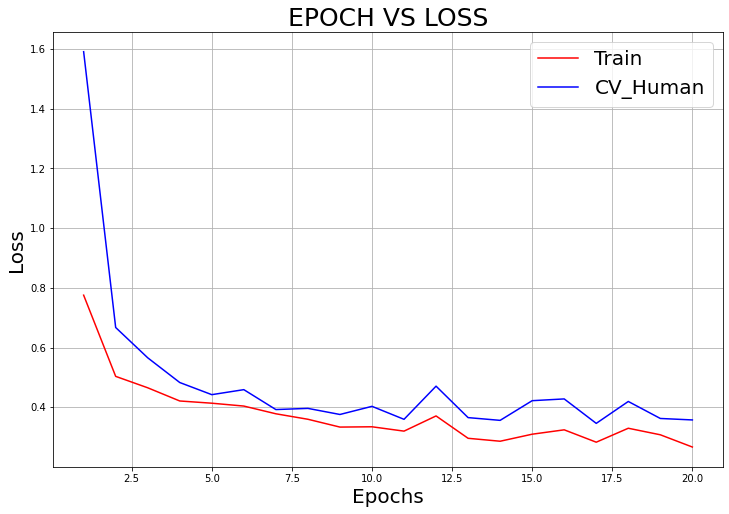

In [66]:
plotting(list(log["Epoch"]), list(log["Comb_Train_Loss"]), list(log["CVHuman_Loss"]), "EPOCH VS LOSS")


In [67]:
def plotting(epoch, train_acc, CVHuman_acc, title):
    fig, axes = plt.subplots(1,1, figsize = (12, 8))
    axes.plot(epoch, train_acc, color = 'red', label = "Train_Accuracy")
    axes.plot(epoch, CVHuman_acc, color = 'blue', label = "CV_Human_Accuracy")
    axes.set_title(title, fontsize = 25)
    axes.set_xlabel("Epochs", fontsize = 20)
    axes.set_ylabel("Accuracy", fontsize = 20)
    axes.grid()

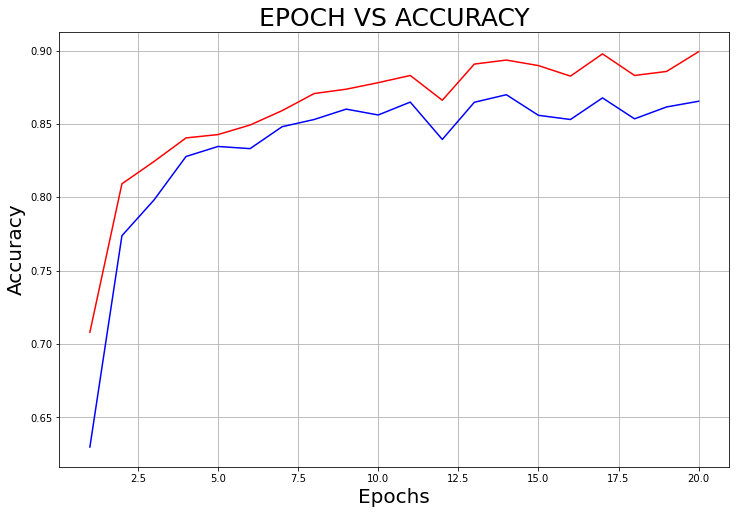

In [68]:
plotting(list(log["Epoch"]), list(log["Comb_Train_Accuracy"]), list(log["CVHuman_Accuracy"]), "EPOCH VS ACCURACY")

In [69]:
def print_confusionMatrix(Y_TestLabels, PredictedLabels):
    confusionMatx = confusion_matrix(Y_TestLabels, PredictedLabels)
    
    precision = confusionMatx/confusionMatx.sum(axis = 0)
    
    recall = (confusionMatx.T/confusionMatx.sum(axis = 1)).T
    
    sns.set(font_scale=1.5)
    
    # confusionMatx = [[1, 2],
    #                  [3, 4]]
    # confusionMatx.T = [[1, 3],
    #                   [2, 4]]
    # confusionMatx.sum(axis = 1)  axis=0 corresponds to columns and axis=1 corresponds to rows in two diamensional array
    # confusionMatx.sum(axix =1) = [[3, 7]]
    # (confusionMatx.T)/(confusionMatx.sum(axis=1)) = [[1/3, 3/7]
    #                                                  [2/3, 4/7]]

    # (confusionMatx.T)/(confusionMatx.sum(axis=1)).T = [[1/3, 2/3]
    #                                                    [3/7, 4/7]]
    # sum of row elements = 1
    
    labels = ["ANGRY", "DISGUST", "FEAR", "HAPPY", "NEUTRAL", "SAD", "SURPRISE"]
    
    plt.figure(figsize=(16,7))
    sns.heatmap(confusionMatx, cmap = "Blues", annot = True, fmt = ".1f", xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix", fontsize = 30)
    plt.xlabel('Predicted Class', fontsize = 20)
    plt.ylabel('Original Class', fontsize = 20)
    plt.tick_params(labelsize = 15)
    plt.xticks(rotation = 90)
    plt.show()
    
    print("-"*125)
    
    plt.figure(figsize=(16,7))
    sns.heatmap(precision, cmap = "Blues", annot = True, fmt = ".2f", xticklabels=labels, yticklabels=labels)
    plt.title("Precision Matrix", fontsize = 30)
    plt.xlabel('Predicted Class', fontsize = 20)
    plt.ylabel('Original Class', fontsize = 20)
    plt.tick_params(labelsize = 15)
    plt.xticks(rotation = 90)
    plt.show()
    
    print("-"*125)
    
    plt.figure(figsize=(16,7))
    sns.heatmap(recall, cmap = "Blues", annot = True, fmt = ".2f", xticklabels=labels, yticklabels=labels)
    plt.title("Recall Matrix", fontsize = 30)
    plt.xlabel('Predicted Class', fontsize = 20)
    plt.ylabel('Original Class', fontsize = 20)
    plt.tick_params(labelsize = 15)
    plt.xticks(rotation = 90)
    plt.show()

In [70]:
model = load_model("C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9DR42)/Desktop/project/Model_Save/model.h5")
predicted_labels = []
true_labels = []
batch_size = 10
total_files = int(len(Test_FER) / batch_size) #here, I have added 2 because there are 30 files in Test_Humans
total_files

148

In [71]:
for i in range(1, total_files, 1):
    img_load = np.load("C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9DR42)/Desktop/project/Bottleneck_Features/Bottleneck_TestHumans/bottleneck_{}.npy".format(i))
    img_label = np.load("C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9DR42)/Desktop/project/Bottleneck_Features/TestHumans_Labels/bottleneck_labels_{}.npy".format(i))
    img_bundle = img_load.reshape(img_load.shape[0], img_load.shape[1]*img_load.shape[2]*img_load.shape[3])
    for j in range(img_bundle.shape[0]):
        img = img_bundle[j]
        img = img.reshape(1, img_bundle.shape[1])
        pred = model.predict(img)
        predicted_labels.append(pred[0].argmax())
        true_labels.append(img_label[j].argmax())
acc = accuracy_score(true_labels, predicted_labels)
print("Accuracy on Human Test Data = {}%".format(np.round(float(acc*100), 2)))

Accuracy on Human Test Data = 87.96%


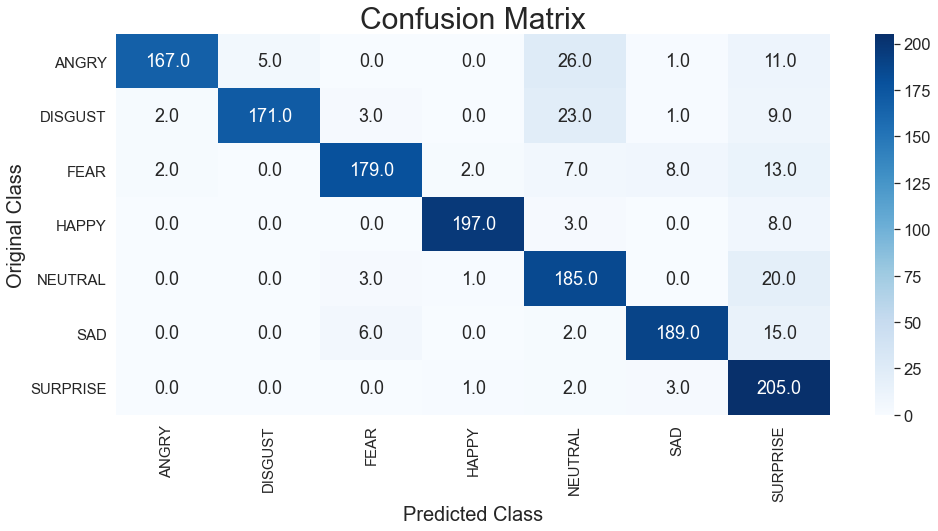

-----------------------------------------------------------------------------------------------------------------------------


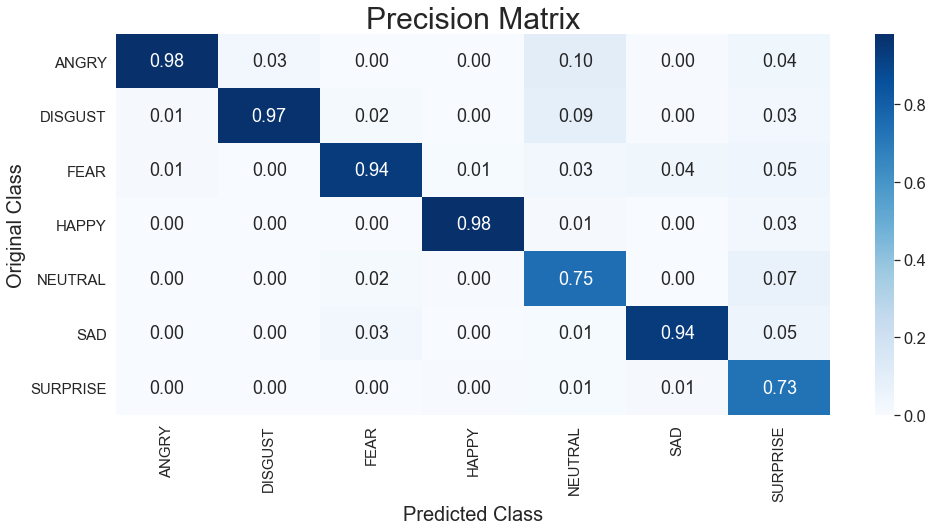

-----------------------------------------------------------------------------------------------------------------------------


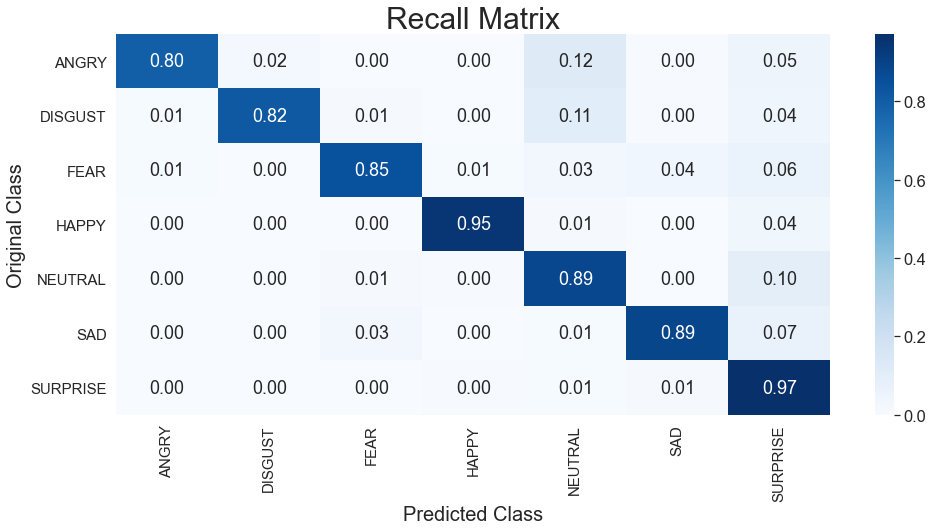

In [72]:
print_confusionMatrix(true_labels, predicted_labels)

# **Testing on Real World with Still Images**

In [73]:
EMOTION_DICT = {1:"ANGRY", 2:"DISGUST", 3:"FEAR", 4:"HAPPY", 5:"NEUTRAL", 6:"SAD", 7:"SURPRISE"}
model_VGG = VGG16(weights='imagenet', include_top=False)
model_top = load_model("C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9DR42)/Desktop/project/Model_Save/model.h5")

In [74]:
def make_prediction(path):
    #converting image to gray scale and save it
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cv2.imwrite(path, gray)
    
    #detect face in image, crop it then resize it then save it
    face_cascade = cv2.CascadeClassifier('C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9DR42)/Desktop/project/haarcascade_frontalface_default.xml') 
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    print(faces)
    for (x,y,w,h) in faces:
        print(x,' ',y,' ',w,' ',h)
        face_clip = img[y:y+h, x:x+w]
        cv2.imwrite(path, cv2.resize(face_clip, (350, 350)))
    
    #read the processed image then make prediction and display the result
        read_image = cv2.imread(path)
        read_image = read_image.reshape(1, read_image.shape[0], read_image.shape[1], read_image.shape[2])
        read_image_final = read_image/255.0  #normalizing the image
        VGG_Pred = model_VGG.predict(read_image_final)  #creating bottleneck features of image using VGG-16.
        VGG_Pred = VGG_Pred.reshape(1, VGG_Pred.shape[1]*VGG_Pred.shape[2]*VGG_Pred.shape[3])
        top_pred = model_top.predict(VGG_Pred)  #making prediction from our own model.
        emotion_label = top_pred[0].argmax() + 1
        print("Predicted Expression Probabilities")
        print("ANGRY: {}\nDISGUST: {}\nFEAR: {}\nHAPPY: {}\nNEUTRAL: {}\nSAD: {}\nSURPRISE: {}\n\n".format(top_pred[0][0], top_pred[0][1], top_pred[0][2], top_pred[0][3], top_pred[0][4], top_pred[0][5], top_pred[0][6]))
        print("Dominant Probability = "+str(EMOTION_DICT[emotion_label])+": "+str(max(top_pred[0])))

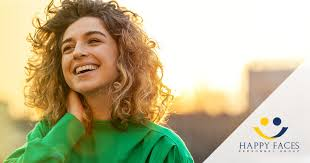

In [88]:
Image.open("C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9DR42)/Desktop/2.JPG")

In [89]:
make_prediction("C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9DR42)/Desktop/2.JPG")

[[52 17 64 64]]
52   17   64   64
Predicted Expression Probabilities
ANGRY: 0.0002826965937856585
DISGUST: 0.007818742655217648
FEAR: 0.022350775077939034
HAPPY: 0.9584124088287354
NEUTRAL: 0.0004471218853723258
SAD: 0.010572106577455997
SURPRISE: 0.00011634342081379145


Dominant Probability = HAPPY: 0.9584124


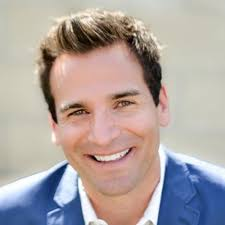

In [79]:
Image.open("C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9DR42)/Desktop/3.jpg")

In [80]:
make_prediction("C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9DR42)/Desktop/3.JPG")

[[ 30  55 136 136]]
30   55   136   136
Predicted Expression Probabilities
ANGRY: 5.0486578402342275e-06
DISGUST: 0.0001856449234765023
FEAR: 0.00974162295460701
HAPPY: 0.9855731129646301
NEUTRAL: 0.00020768812100868672
SAD: 0.00421571172773838
SURPRISE: 7.103597454261035e-05


Dominant Probability = HAPPY: 0.9855731


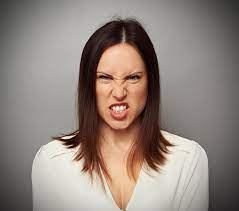

In [81]:
Image.open("C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9DR42)/Desktop/2.jpg")

In [82]:
make_prediction("C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9DR42)/Desktop/2.jpg")

[[85 49 73 73]]
85   49   73   73
Predicted Expression Probabilities
ANGRY: 0.0039199963212013245
DISGUST: 0.9948590993881226
FEAR: 0.0008546003955416381
HAPPY: 3.5759836464421824e-05
NEUTRAL: 0.0003115444560535252
SAD: 1.4992632713983767e-05
SURPRISE: 4.008910764241591e-06


Dominant Probability = DISGUST: 0.9948591


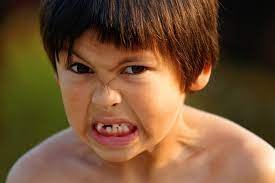

In [87]:
Image.open("C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9DR42)/Desktop/5.jpg")

In [88]:
make_prediction("C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9DR42)/Desktop/5.JPG")

[[ 37  18 144 144]]
37   18   144   144
Predicted Expression Probabilities
ANGRY: 0.8262984156608582
DISGUST: 0.11951331794261932
FEAR: 0.006401405669748783
HAPPY: 0.00014202925376594067
NEUTRAL: 0.046676065772771835
SAD: 0.0005289910477586091
SURPRISE: 0.0004398086166474968


Dominant Probability = ANGRY: 0.8262984


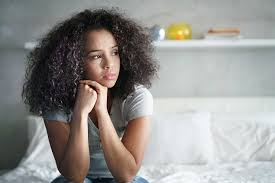

In [103]:
Image.open("C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9DR42)/Desktop/6.jpg")

In [104]:
make_prediction("C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9DR42)/Desktop/6.JPG")

[[71 32 59 59]]
71   32   59   59
Predicted Expression Probabilities
ANGRY: 0.005052352324128151
DISGUST: 0.009662305936217308
FEAR: 0.40856191515922546
HAPPY: 0.032586127519607544
NEUTRAL: 0.5037553310394287
SAD: 0.01772356405854225
SURPRISE: 0.02265850640833378


Dominant Probability = NEUTRAL: 0.50375533


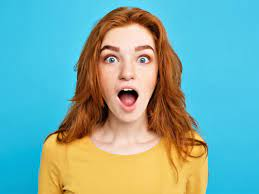

In [134]:
Image.open("C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9DR42)/Desktop/8.jpg")

In [135]:
make_prediction("C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9DR42)/Desktop/8.JPG")

[[78 37 78 78]]
78   37   78   78
Predicted Expression Probabilities
ANGRY: 0.00035619913251139224
DISGUST: 0.00029852683655917645
FEAR: 0.014494354836642742
HAPPY: 0.0004966769483871758
NEUTRAL: 0.021864909678697586
SAD: 0.029277754947543144
SURPRISE: 0.9332115650177002


Dominant Probability = SURPRISE: 0.93321157


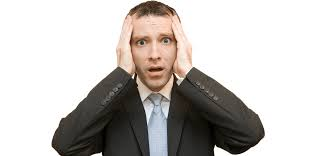

In [136]:
Image.open("C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9DR42)/Desktop/9.jpg")

In [137]:
make_prediction("C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9DR42)/Desktop/9.JPG")

[[120  16  68  68]]
120   16   68   68
Predicted Expression Probabilities
ANGRY: 0.00015864049782976508
DISGUST: 0.0008363239467144012
FEAR: 0.8353232741355896
HAPPY: 0.0025267202872782946
NEUTRAL: 0.14243930578231812
SAD: 0.01379691157490015
SURPRISE: 0.004918847233057022


Dominant Probability = FEAR: 0.8353233


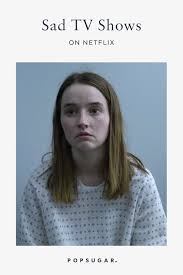

In [140]:
Image.open("C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9DR42)/Desktop/10.jpg")

In [141]:
make_prediction("C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9DR42)/Desktop/10.JPG")

[[51 86 64 64]]
51   86   64   64
Predicted Expression Probabilities
ANGRY: 0.0483933761715889
DISGUST: 0.007803458254784346
FEAR: 0.0898595005273819
HAPPY: 0.005925810430198908
NEUTRAL: 0.6382258534431458
SAD: 0.01344297919422388
SURPRISE: 0.19634902477264404


Dominant Probability = NEUTRAL: 0.63822585


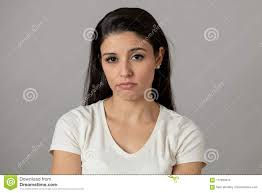

In [150]:
Image.open("C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9DR42)/Desktop/11.jpg")

In [151]:
make_prediction("C:/Users/User/Dropbox (Old)/My PC (DESKTOP-7A9DR42)/Desktop/11.JPG")

[[91 31 68 68]]
91   31   68   68
Predicted Expression Probabilities
ANGRY: 0.0011719673639163375
DISGUST: 0.0004233568033669144
FEAR: 0.14706607162952423
HAPPY: 0.0047114151529967785
NEUTRAL: 0.029483536258339882
SAD: 0.46188852190971375
SURPRISE: 0.355255126953125


Dominant Probability = SAD: 0.46188852


In [152]:
def predict(img):
    
    #read the processed image then make prediction and display the result
        read_image = cv2.imread(img)
        read_image = read_image.reshape(1, read_image.shape[0], read_image.shape[1], read_image.shape[2])
        read_image_final = read_image/255.0  #normalizing the image
        VGG_Pred = model_VGG.predict(read_image_final)  #creating bottleneck features of image using VGG-16.
        VGG_Pred = VGG_Pred.reshape(1, VGG_Pred.shape[1]*VGG_Pred.shape[2]*VGG_Pred.shape[3])
        top_pred = model_top.predict(VGG_Pred)  #making prediction from our own model.
        emotion_label = top_pred[0].argmax() + 1
        print("Predicted Expression Probabilities")
        print("ANGRY: {}\nDISGUST: {}\nFEAR: {}\nHAPPY: {}\nNEUTRAL: {}\nSAD: {}\nSURPRISE: {}\n\n".format(top_pred[0][0], top_pred[0][1], top_pred[0][2], top_pred[0][3], top_pred[0][4], top_pred[0][5], top_pred[0][6]))
        print("Dominant Probability = "+str(EMOTION_DICT[emotion_label])+": "+str(max(top_pred[0])))

In [153]:
# Converting the model into JSON format and storing it in "fer_model.json" file. 
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

NameError: name 'model' is not defined